# IMPORTS

In [ ]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # Linear algebra library
import pandas as pd
import re

# GET THE CSV FILE

In [ ]:
!wget https://github.com/T3CHW1ZRD/ML_PROJECT_PREDICT_FOOD/raw/refs/heads/main/cleaned_data_combined.csv
!wget https://github.com/T3CHW1ZRD/ML_PROJECT_PREDICT_FOOD/raw/refs/heads/main/tmdb_cleaned.csv

--2025-04-04 21:34:33--  https://github.com/T3CHW1ZRD/ML_PROJECT_PREDICT_FOOD/raw/refs/heads/main/cleaned_data_combined.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/T3CHW1ZRD/ML_PROJECT_PREDICT_FOOD/refs/heads/main/cleaned_data_combined.csv [following]
--2025-04-04 21:34:34--  https://raw.githubusercontent.com/T3CHW1ZRD/ML_PROJECT_PREDICT_FOOD/refs/heads/main/cleaned_data_combined.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268911 (263K) [text/plain]
Saving to: ‘cleaned_data_combined.csv’

cleaned_data_combin 100%[===================>] 262.61K  --.-KB/s    in 0.05s   

2025-04-04 

# ANALYZE

In [ ]:
# read csv
data = pd.read_csv("cleaned_data_combined.csv")
movie_data = pd.read_csv("tmdb_cleaned.csv")
# display
data



,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label
0,716549,3,6,"Week day lunch,At a party,Late night snack",5,Cloudy with a Chance of Meatballs,Coke,Friends,A little (mild),Pizza
1,715742,4,"bread, meet","Week day lunch,At a party,Late night snack",5$ for a large piece,All sort of american young boy movies,Coke,"Friends,Teachers,Strangers",NaN,Pizza
2,727333,3,5,"Week day lunch,Week day dinner,Weekend lunch,W...",10dollar,action movie,cola,Friends,A moderate amount (medium),Pizza
3,606874,4,6-7,"Week day lunch,Week day dinner,Weekend lunch,W...",$3,Mamma Mia,Soda,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza
4,505318,2,3 or more,"Week day lunch,Week day dinner,Weekend lunch,W...",$5,Cloudy with a chance of meatballs,Soda,"Siblings,Friends",A little (mild),Pizza
...,...,...,...,...,...,...,...,...,...,...
1639,413395,2,3-5,"Week day dinner,Weekend dinner",5-Mar,Romantic Movies,Soup,"Parents,Siblings,Friends",NaN,Sushi
1640,386750,3,4 to 5,"Week day lunch,Weekend lunch",About 12 to 15 dollars,One Piece Film Gold,Water,Friends,A little (mild),Sushi
1641,617178,2,"It has a minimum of two ingredients, and on av...","Week day lunch,Weekend lunch,At a party",10 dollars,I think of the anime Food Wars,Nothing in particular– probably just water,Parents,NaN,Sushi
1642,630128,1,3 or a finite amount more,"Week day lunch,Weekend lunch,Late night snack",$1 or less (for a single roll),John Wick 3,Any tea,"Siblings,Friends,Strangers",A little (mild),Sushi


Col 1

In [ ]:
i=0
for column in data.columns:
  if i == 1:
    print(f"Value counts for {column}:\n", data[column].value_counts(), "\n")
  i+=1

Value counts for Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex):
 Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)
3    592
4    440
2    375
5    174
1     63
Name: count, dtype: int64 



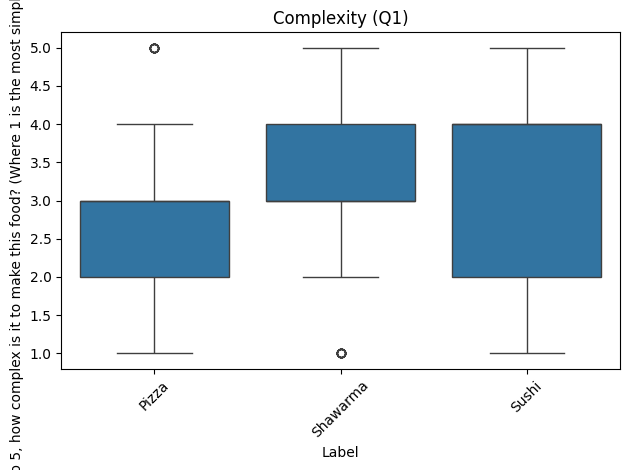

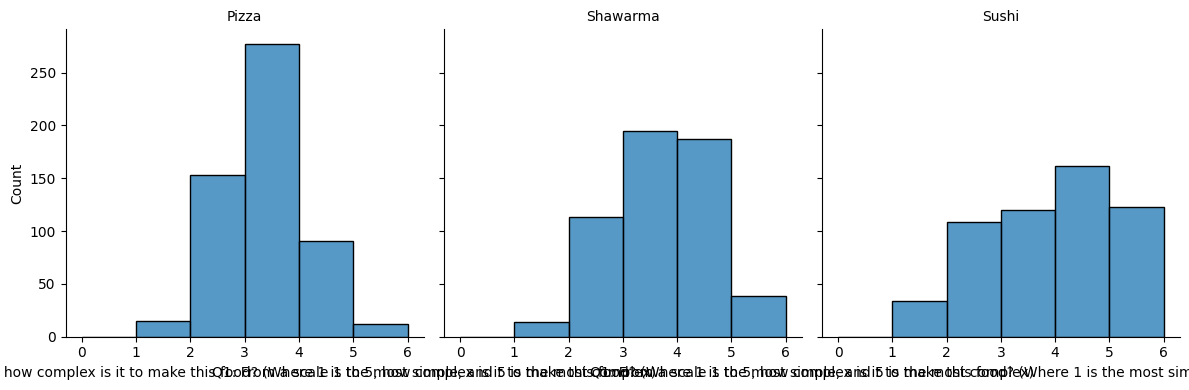

Mean Complexity by Food Label:
Label
Pizza      2.88
Shawarma   3.23
Sushi      3.42


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

q1_col = "Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)"
label_col = "Label"

# boxplot of Q1 values
sns.boxplot(x=data[label_col], y=data[q1_col])
plt.xticks(rotation=45)
plt.title("Complexity (Q1)")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data, col=label_col, col_wrap=3, height=4)
g.map(sns.histplot, q1_col, bins=5, binrange=(0.5, 5.5), discrete=True)
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

mean_complexity = data.groupby(label_col)[q1_col].mean().sort_values()

print("Mean Complexity by Food Label:")
print(mean_complexity.to_string(float_format="%.2f"))

Col 2

In [ ]:
from collections import Counter

column_name = data.columns[2]
text_data = data[column_name].astype(str)  # Ensure it's text

# Tokenize words
all_words = []
for entry in text_data:
    words = re.findall(r'\b\w+\b', entry.lower())  # Extract words using regex
    all_words.extend(words)

# Count word occurrences
word_counts = Counter(all_words)

# Convert to Pandas DataFrame
word_freq_df = pd.DataFrame(word_counts.items(), columns=["Word", "Count"]).sort_values(by="Count", ascending=False)

# Display top 100 words
from IPython.display import display
display(word_freq_df.head(100))  # Change number to see more

# Print result
word_freq_series = pd.Series(word_counts).sort_values(ascending=False)
print(word_freq_series)


,Word,Count
3,5,396
9,4,276
5,3,253
16,ingredients,225
0,6,216
...,...,...
309,one,11
288,vinegar,11
187,with,11
225,pickles,11


5              396
4              276
3              253
ingredients    225
6              216
              ... 
getting          1
again            1
once             1
44               1
california       1
Length: 600, dtype: int64


In [ ]:
from collections import Counter


target_column_index = 2

# Extract the column
target_col = data.iloc[:, target_column_index]

# Extract the food labels
food_labels = data.iloc[:, -1]

# Function to extract words/numbers from a string
import re

def extract_words(value):
    if isinstance(value, (int, float)):
        return [str(value)]
    elif isinstance(value, str):
        # Remove punctuation (like commas, periods, etc)
        cleaned = re.sub(r"[^\w\s]", "", value.lower())
        return cleaned.split()
    return []

# Apply function to extract words/numbers
data_words = target_col.apply(extract_words)

# Flatten list and count occurrences per food label
word_food_counts = {}

for words, label in zip(data_words, food_labels):
    for word in words:
        if word not in word_food_counts:
            word_food_counts[word] = {}
        if label not in word_food_counts[word]:
            word_food_counts[word][label] = 0
        word_food_counts[word][label] += 1

# Convert counts to percentages
word_food_percentages = []

for word, label_counts in word_food_counts.items():
    total_count = sum(label_counts.values())
    for label, count in label_counts.items():
        percentage = (count / total_count) * 100
        word_food_percentages.append({"Word": word, "Food Label": label, "Count": count, "Percentage": percentage})

# Convert to DataFrame
word_food_df = pd.DataFrame(word_food_percentages)

# Apply filters: Keep only rows where count >10 and percentage >70
filtered_word_food_df = word_food_df[(word_food_df["Count"] >= 6) & (word_food_df["Percentage"] >= 70)]

# Display results
print(filtered_word_food_df)


           Word Food Label  Count  Percentage
4         bread   Shawarma     18   78.260870
56        flour      Pizza     36   90.000000
58       tomato      Pizza     45   84.905660
60       cheese      Pizza     82   95.348837
66          oil      Pizza     22   84.615385
74        dough      Pizza     55   98.214286
92     toppings      Pizza     30   75.000000
95        pizza      Pizza     26  100.000000
96        olive      Pizza     13   86.666667
98        sugar      Pizza      8   80.000000
101   pepperoni      Pizza     15  100.000000
110       basil      Pizza      6  100.000000
119       water      Pizza     21   95.454545
121       yeast      Pizza     23  100.000000
122        salt      Pizza     20   83.333333
126     veggies   Shawarma      7   70.000000
150         are      Pizza     11   78.571429
167   pineapple      Pizza      7  100.000000
267      spices   Shawarma     11   78.571429
330           2      Sushi     48   80.000000
385          we      Pizza      7 

<ipython-input-9-b675e42d4aec>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-b675e42d4aec>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-b675e42d4aec>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


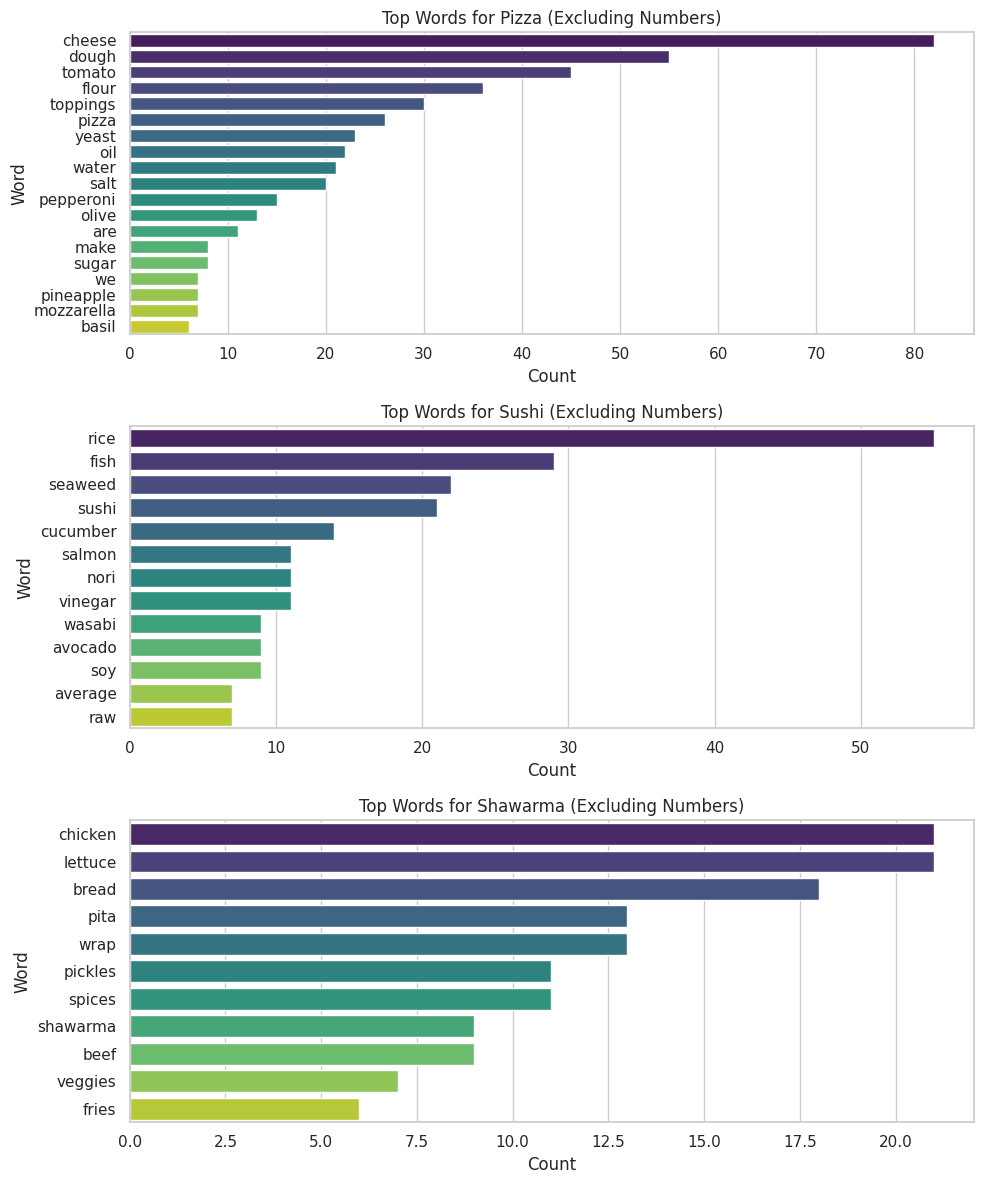

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Define food labels
food_labels = ["Pizza", "Sushi", "Shawarma"]

# Filter out numeric-only words
non_numeric_df = filtered_word_food_df[~filtered_word_food_df["Word"].str.strip().str.isnumeric()]

# Create 3 vertically stacked subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, label in enumerate(food_labels):
    # Filter top 10 non-numeric words for this label
    top_words = (
        non_numeric_df[non_numeric_df["Food Label"] == label]
        .sort_values(by="Count", ascending=False)
        .head(20)
    )

    sns.barplot(
        data=top_words,
        y="Word",
        x="Count",
        ax=axes[i],
        palette="viridis"
    )
    axes[i].set_title(f"Top Words for {label} (Excluding Numbers)")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Word")

plt.tight_layout()
plt.show()


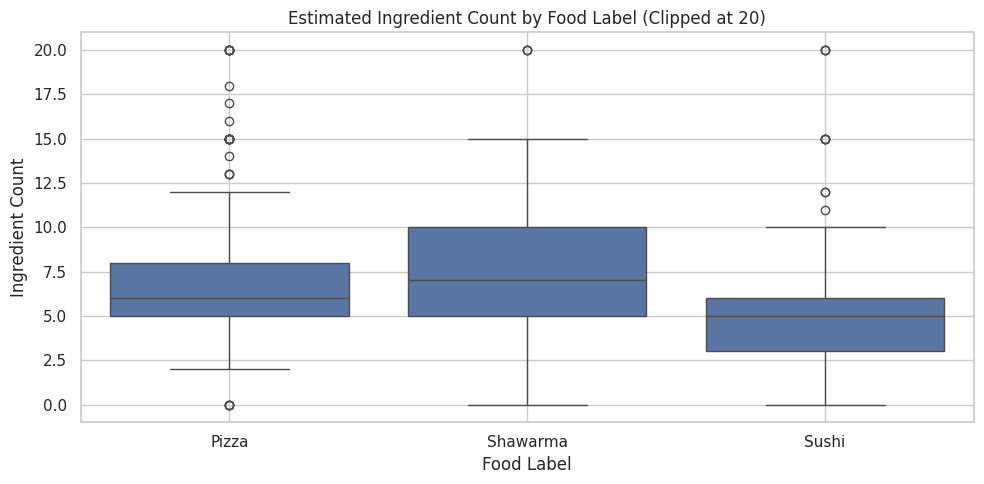

In [ ]:
import re

def count_ingredients(text):
    number_words = {
        'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
        'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10
    }
    if isinstance(text, str):
        numeric_match = re.findall(r'\d+', text)
        number_word_matches = [number_words[word] for word in number_words if word in text.lower()]
        max_value = max([int(n) for n in numeric_match], default=0)
        if number_word_matches:
            max_value = max(max_value, max(number_word_matches))
        if "," in text:  # handle comma-separated list
            max_value = max(max_value, text.count(",") + 1)
        return max_value
    return 0

# Apply it to Q2
df_food = data.copy()
df_food["ingredient_count"] = df_food["Q2: How many ingredients would you expect this food item to contain?"].apply(count_ingredients)


import seaborn as sns
import matplotlib.pyplot as plt

# Only show entries with ingredient count ≤ 20
df_filtered = df_food[df_food["ingredient_count"] <= 20]

# Plot
plt.figure(figsize=(10, 5))
sns.boxplot(x="Label", y="ingredient_count", data=df_filtered)
plt.title("Estimated Ingredient Count by Food Label (Clipped at 20)")
plt.xlabel("Food Label")
plt.ylabel("Ingredient Count")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import mode
import numpy as np

# Safer mode function
def safe_mode(x):
    try:
        m = mode(x, keepdims=False)
        return m.mode if hasattr(m, 'mode') else np.nan
    except:
        return np.nan

# Group and summarize
grouped = df_food.groupby("Label")["ingredient_count"]
summary_df = grouped.agg([
    "count",
    "mean",
    "median",
    safe_mode,
    "std",
    "min",
    "max"
])

# Rename columns for clarity
summary_df.columns = ["Count", "Mean", "Median", "Mode", "Std Dev", "Min", "Max"]

# Show
from IPython.display import display
display(summary_df.round(2))


,Count,Mean,Median,Mode,Std Dev,Min,Max
Label,,,,,,,
Pizza,548,6.56,6.0,5,3.16,0,21
Shawarma,548,7.45,7.0,10,3.18,0,25
Sushi,548,5.01,5.0,5,2.99,0,44


Col 3

In [ ]:
# Select the column (adjust index if needed)
column_name = data.columns[3]  # Adjust index if necessary
text_data = data[column_name].astype(str)  # Ensure it's treated as text

# Split each row by commas, strip spaces, and flatten into one list
all_categories = []
for entry in text_data:
    categories = [cat.strip().lower() for cat in entry.split(",")]  # Split by comma & remove spaces
    all_categories.extend(categories)

# Count occurrences of each category
category_counts = Counter(all_categories)

# Convert to DataFrame for better display
category_freq_df = pd.DataFrame(category_counts.items(), columns=["Category", "Count"]).sort_values(by="Count", ascending=False)

# Display top categories in Colab
from IPython.display import display
display(category_freq_df.head(100))  # Change number to see more

# Print result like `.value_counts()`
category_freq_series = pd.Series(category_counts).sort_values(ascending=False)
print(category_freq_series)

,Category,Count
0,week day lunch,1229
4,weekend lunch,1112
5,weekend dinner,1083
3,week day dinner,1058
1,at a party,832
2,late night snack,647


week day lunch      1229
weekend lunch       1112
weekend dinner      1083
week day dinner     1058
at a party           832
late night snack     647
dtype: int64


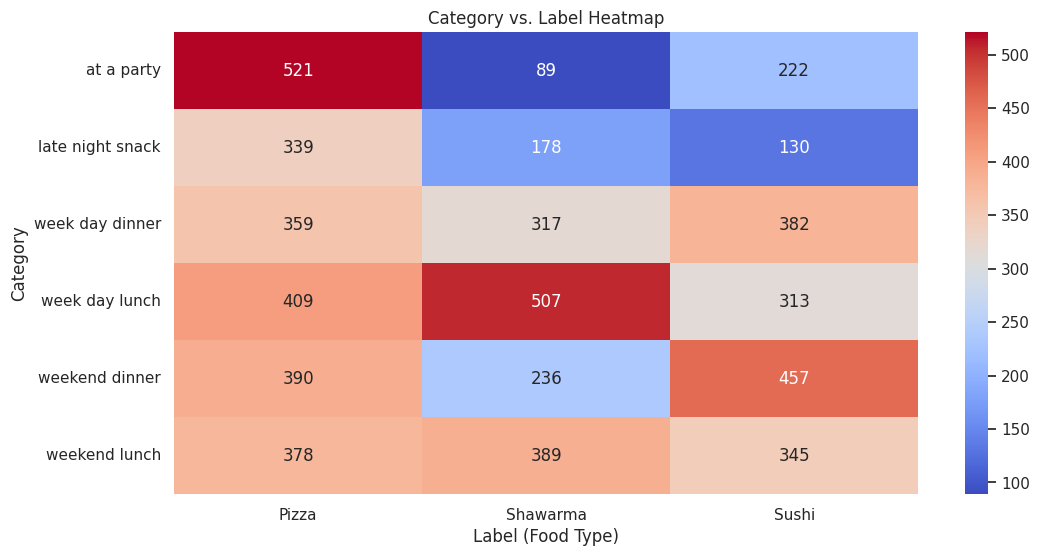

In [ ]:
import seaborn as sns

# Select relevant columns
category_column = data.columns[3]  # Column with categories
label_column = data.columns[-1]  # The label (last column)

# Split categories into individual entries for proper counting
expanded_data = data.assign(Category=data[category_column].str.split(",")).explode("Category")
expanded_data["Category"] = expanded_data["Category"].str.strip().str.lower()  # Clean categories

# Create crosstab (frequency table)
category_label_crosstab = pd.crosstab(expanded_data["Category"], expanded_data[label_column])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(category_label_crosstab, cmap="coolwarm", annot=True, fmt="d")
plt.title("Category vs. Label Heatmap")
plt.xlabel("Label (Food Type)")
plt.ylabel("Category")
plt.show()


Label,Pizza,Shawarma,Sushi
Category,,,
at a party,0.217,0.052,0.120
late night snack,0.141,0.104,0.070
week day dinner,0.150,0.185,0.207
week day lunch,0.171,0.295,0.169
weekend dinner,0.163,0.138,0.247
weekend lunch,0.158,0.227,0.187


<Figure size 1200x600 with 0 Axes>

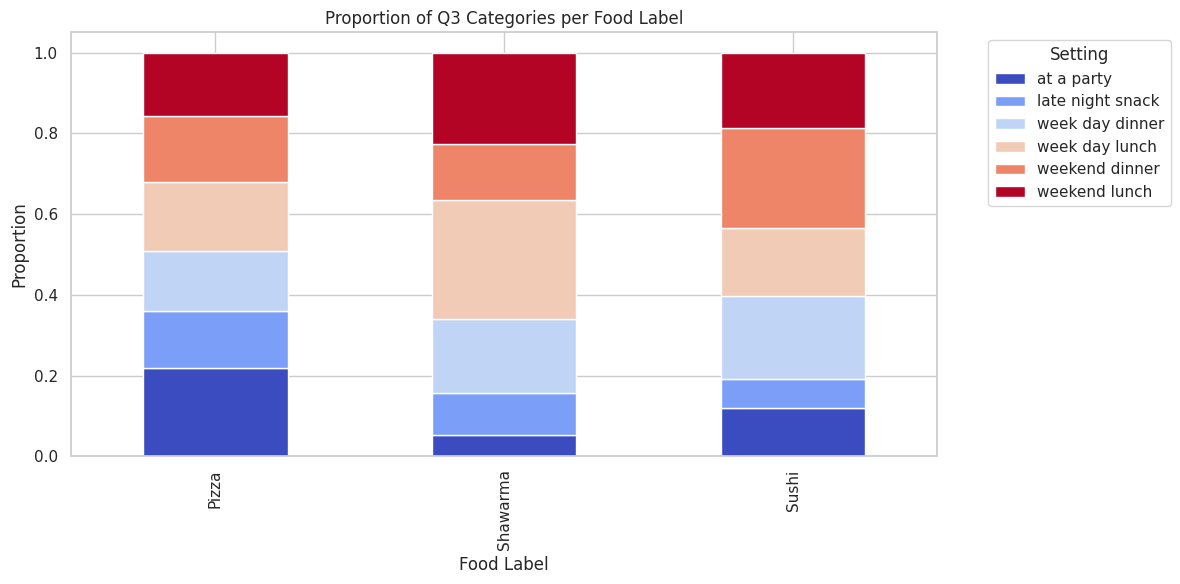

In [ ]:
# Step 1: Explode Q3 entries into individual categories
q3_col = data.columns[3]
label_col = data.columns[-1]
expanded_q3 = data[[q3_col, label_col]].copy()
expanded_q3["Category"] = expanded_q3[q3_col].str.split(",")
expanded_q3 = expanded_q3.explode("Category")
expanded_q3["Category"] = expanded_q3["Category"].str.strip().str.lower()

# Step 2: Crosstab of raw counts
q3_crosstab = pd.crosstab(expanded_q3["Category"], expanded_q3[label_col])

# Step 3: Normalize per column (label)
label_totals = expanded_q3[label_col].value_counts()
q3_normalized = q3_crosstab.div(label_totals, axis=1).round(3)

# Step 4: View table
display(q3_normalized)




category_column = data.columns[3]
label_column = data.columns[-1]

# If labels are numeric, convert them back to categories
if not isinstance(data[label_column].iloc[0], str):
    data[label_column] = data[label_column].astype("category")
    data[label_column] = data[label_column].cat.rename_categories(lambda x: str(x))

# Expand multi-label entries
expanded_data = data.assign(Category=data[category_column].str.split(",")).explode("Category")
expanded_data["Category"] = expanded_data["Category"].str.strip().str.lower()

# Crosstab and heatmap
category_label_crosstab = pd.crosstab(expanded_data["Category"], expanded_data[label_column])

norm_crosstab = category_label_crosstab.div(category_label_crosstab.sum(axis=0), axis=1)

# Plot it
plt.figure(figsize=(12, 6))
norm_crosstab.T.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))
plt.title("Proportion of Q3 Categories per Food Label")
plt.xlabel("Food Label")
plt.ylabel("Proportion")
plt.legend(title="Setting", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Col 4

In [ ]:
from collections import Counter

# Select column (adjust index if needed)
column_name = data.columns[4]
text_data = data[column_name].astype(str)  # Ensure it's text

# Tokenize words (split on spaces, commas, etc.), convert to lowercase
all_words = []
for entry in text_data:
    words = re.findall(r'\b\w+\b', entry.lower())  # Extract words using regex
    all_words.extend(words)

# Count word occurrences
word_counts = Counter(all_words)

# Convert to Pandas DataFrame
word_freq_df = pd.DataFrame(word_counts.items(), columns=["Word", "Count"]).sort_values(by="Count", ascending=False)

# Display top 100 words in Colab
from IPython.display import display
display(word_freq_df.head(100))  # Change number to see more

# Print result in `.value_counts()` style
word_freq_series = pd.Series(word_counts).sort_values(ascending=False)
print(word_freq_series)


,Word,Count
20,10,321
7,15,224
0,5,182
11,dollars,175
9,20,169
...,...,...
257,than,6
117,probably,6
133,small,6
138,you,6


10         321
15         224
5          182
dollars    175
20         169
          ... 
meat         1
tofu         1
02           1
let          1
salmon       1
Length: 384, dtype: int64


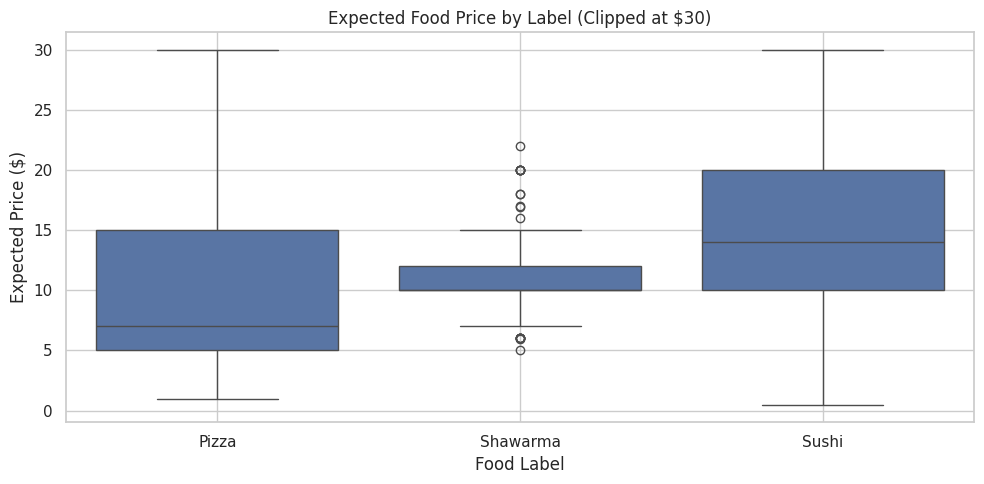

In [ ]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def extract_price(text): # Defining the function before it's used
    text = str(text)  # Convert to string if not already
    match = re.findall(r'[-+]?\d*\.?\d+', text)
    float_match = [float(x) for x in match]
    if float_match:
        return min(float_match)
    return 3.0 # Using the user's default value


# Assume 'data' is your original DataFrame
# Create df_price_filtered here with filtering if needed
# Example: Keeping prices below $30
df_price_filtered = data[data['Q4: How much would you expect to pay for one serving of this food item?'].apply(lambda x: extract_price(str(x))) <= 30].copy()


# Make sure food_price is numeric
df_price_filtered["food_price"] = pd.to_numeric(df_price_filtered["Q4: How much would you expect to pay for one serving of this food item?"], errors="coerce")

# Now group and plot
medians = df_price_filtered.groupby("Label")["food_price"].median().sort_values()

plt.figure(figsize=(10, 5))
sns.boxplot(
    x="Label",
    y="food_price",
    data=df_price_filtered,
    order=medians.index
)
plt.title("Expected Food Price by Label (Clipped at $30)")
plt.xlabel("Food Label")
plt.ylabel("Expected Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import mode
import pandas as pd
import numpy as np

# Ensure food_price is numeric
df_price_filtered["food_price"] = pd.to_numeric(df_price_filtered["food_price"], errors="coerce")

# Safer mode function that handles all edge cases
def safe_mode(series):
    try:
        result = mode(series, keepdims=False)
        return result.mode if np.ndim(result.mode) == 0 else result.mode[0]
    except:
        return None

# Compute stats per label
summary_stats = df_price_filtered.groupby("Label")["food_price"].agg(
    Count="count",
    Mean="mean",
    Median="median",
    Mode=safe_mode
).round(2)

# Show table
print(summary_stats)


          Count   Mean  Median  Mode
Label                               
Pizza       149   9.58     7.0   NaN
Shawarma    172  11.02    10.0   NaN
Sushi       176  14.67    14.0   NaN


In [ ]:
from collections import Counter
import re
import pandas as pd

# Column index for Q4 (price expectations)
target_column_index = 4
target_col = data.iloc[:, target_column_index]
food_labels = data.iloc[:, -1]  # Assumed to be the food label

def extract_words(value):
    if isinstance(value, (int, float)):
        return [str(value)]
    elif isinstance(value, str):
        cleaned = re.sub(r"[^\w\s]", "", value.lower())  # Remove punctuation
        return cleaned.split()
    return []

# Tokenize column entries
data_words = target_col.apply(extract_words)

# Count tokens by food label
word_food_counts = {}

for words, label in zip(data_words, food_labels):
    for word in words:
        if word not in word_food_counts:
            word_food_counts[word] = {}
        if label not in word_food_counts[word]:
            word_food_counts[word][label] = 0
        word_food_counts[word][label] += 1

# Convert to percentages
word_food_percentages = []

for word, label_counts in word_food_counts.items():
    total_count = sum(label_counts.values())
    for label, count in label_counts.items():
        percentage = (count / total_count) * 100
        word_food_percentages.append({
            "Word": word,
            "Food Label": label,
            "Count": count,
            "Percentage": percentage
        })

# Final filtered DataFrame
word_food_df_price = pd.DataFrame(word_food_percentages)
filtered_word_food_df_price = word_food_df_price[
    (word_food_df_price["Count"] >= 6) & (word_food_df_price["Percentage"] >= 50)
]

print(filtered_word_food_df_price)


          Word Food Label  Count  Percentage
0            5      Pizza    116   82.269504
3          for      Pizza     75   52.083333
6            a      Pizza     57   58.762887
9        large      Pizza      6   75.000000
14           3      Pizza     43   84.313725
22           1      Sushi     12   60.000000
25          20      Sushi     83   59.285714
32           4      Pizza     51   87.931034
41           6      Pizza     36   52.173913
47        most      Pizza      6   54.545455
51          30      Sushi     14   70.000000
56          10   Shawarma    146   54.275093
58         one      Pizza     33   50.000000
86           7   Shawarma     32   50.793651
88           2      Pizza     19   70.370370
92           8   Shawarma     53   56.989247
95          if      Pizza      8   61.538462
100         in      Pizza      7   58.333333
107      pizza      Pizza     45  100.000000
109     single      Pizza      6   54.545455
112      slice      Pizza     40  100.000000
115       

<ipython-input-19-d48a498f64b1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-19-d48a498f64b1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-19-d48a498f64b1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


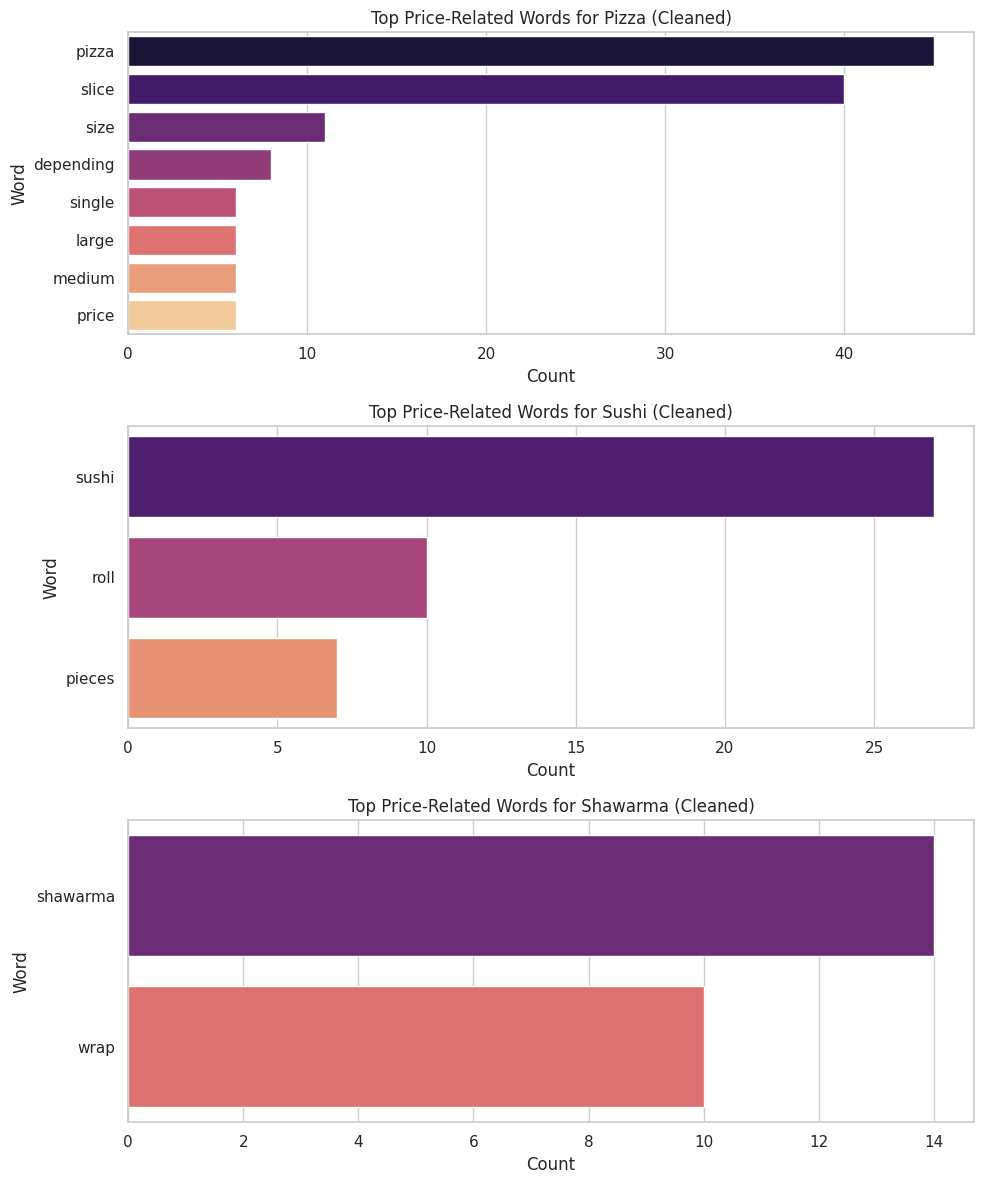

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Filter out numeric-only and stop words
filtered_no_stopwords = filtered_word_food_df_price[
    ~filtered_word_food_df_price["Word"].str.strip().str.isnumeric() &  # not numeric
    ~filtered_word_food_df_price["Word"].str.lower().isin(ENGLISH_STOP_WORDS)  # not a stop word
]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
food_labels = ["Pizza", "Sushi", "Shawarma"]

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, label in enumerate(food_labels):
    top_words = (
        filtered_no_stopwords[filtered_no_stopwords["Food Label"] == label]
        .sort_values(by="Count", ascending=False)
        .head(10)
    )

    sns.barplot(
        data=top_words,
        y="Word",
        x="Count",
        ax=axes[i],
        palette="magma"
    )
    axes[i].set_title(f"Top Price-Related Words for {label} (Cleaned)")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Word")

plt.tight_layout()
plt.show()


Col 5

In [ ]:
movie_column = data.columns[5]  # Adjust index if necessary

movie_column_text  = data[movie_column].astype(str)  # Ensure it's treated as text

# Tokenize movie names (split by commas and strip spaces)
all_movies = []
for entry in movie_column_text:
    movies = [movie.strip().lower() for movie in entry.split(",")]  # Split by commas, clean spaces, lowercase
    all_movies.extend(movies)

# Count occurrences of each movie
movie_counts = Counter(all_movies)

# Convert to Pandas DataFrame for better viewing
movie_freq_df = pd.DataFrame(movie_counts.items(), columns=["Movie", "Count"]).sort_values(by="Count", ascending=False)

# Show top movies
from IPython.display import display
display(movie_freq_df.head(100))  # Change 100 to see more

# Print result like `.value_counts()`
movie_freq_series = pd.Series(movie_counts).sort_values(ascending=False)
print(movie_freq_series)


,Movie,Count
149,the avengers,121
42,avengers,81
4,nan,66
7,home alone,55
20,teenage mutant ninja turtles,49
...,...,...
603,rush hour 2,3
496,oppenheimer,3
481,"i think of the movie ""shrek 2"".",3
37,godfather,3


the avengers                    121
avengers                         81
nan                              66
home alone                       55
teenage mutant ninja turtles     49
                               ... 
almost all asian movies           1
alita:the warrior                 1
pizza                             1
kiki’s delivery service           1
no movie came up to my mind       1
Length: 714, dtype: int64


Col 6


In [ ]:
from collections import Counter
import re

# Column index for Q6
drink_column_index = 6
drink_col = data.iloc[:, drink_column_index].astype(str)
drink_labels = data.iloc[:, -1]  # Last column assumed to be label

# Tokenize drink text
def extract_words(value):
    cleaned = re.sub(r"[^\w\s]", "", value.lower())
    return cleaned.split()

drink_words = drink_col.apply(extract_words)

# Count word-food label occurrences
drink_word_counts = {}
for words, label in zip(drink_words, drink_labels):
    for word in words:
        if word not in drink_word_counts:
            drink_word_counts[word] = {}
        if label not in drink_word_counts[word]:
            drink_word_counts[word][label] = 0
        drink_word_counts[word][label] += 1

# Convert to DataFrame with % per label
drink_word_percentages = []
for word, label_counts in drink_word_counts.items():
    total = sum(label_counts.values())
    for label, count in label_counts.items():
        percent = (count / total) * 100
        drink_word_percentages.append({
            "Word": word,
            "Food Label": label,
            "Count": count,
            "Percentage": percent
        })

drink_word_df = pd.DataFrame(drink_word_percentages)

# Filter: only show useful ones (tweak threshold if needed)
filtered_drink_word_df = drink_word_df[(drink_word_df["Count"] >= 6) & (drink_word_df["Percentage"] >= 70)]

# Display
from IPython.display import display
display(filtered_drink_word_df.sort_values(by="Count", ascending=False))


,Word,Food Label,Count,Percentage
18,tea,Sushi,179,78.508772
304,green,Sushi,50,98.039216
334,sake,Sushi,48,100.000000
62,cocacola,Pizza,29,74.358974
38,soup,Sushi,24,96.000000
331,miso,Sushi,16,100.000000
247,ayran,Shawarma,11,100.000000
216,mango,Shawarma,11,73.333333
20,lemonade,Shawarma,10,71.428571
109,hot,Sushi,9,81.818182


In [ ]:
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

# Choose the drink column (Q6)
drink_col_index = 6
drink_col = data.iloc[:, drink_col_index].astype(str)
food_labels = data.iloc[:, -1].astype(str)

# Helper function to clean and extract drink words
def clean_and_tokenize(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return [w for w in words if w not in stop_words and len(w) > 1]

# Apply and collect word counts by food label
drink_word_counts = {}
for entry, label in zip(drink_col, food_labels):
    words = clean_and_tokenize(entry)
    for word in words:
        if word not in drink_word_counts:
            drink_word_counts[word] = {}
        if label not in drink_word_counts[word]:
            drink_word_counts[word][label] = 0
        drink_word_counts[word][label] += 1

# Convert to DataFrame
drink_word_data = []
for word, counts in drink_word_counts.items():
    total = sum(counts.values())
    for label, count in counts.items():
        percentage = (count / total) * 100
        drink_word_data.append({
            "Word": word,
            "Food Label": label,
            "Count": count,
            "Percentage": percentage
        })

drink_word_df = pd.DataFrame(drink_word_data)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-23-9ce0647c8072>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-23-9ce0647c8072>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-23-9ce0647c8072>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


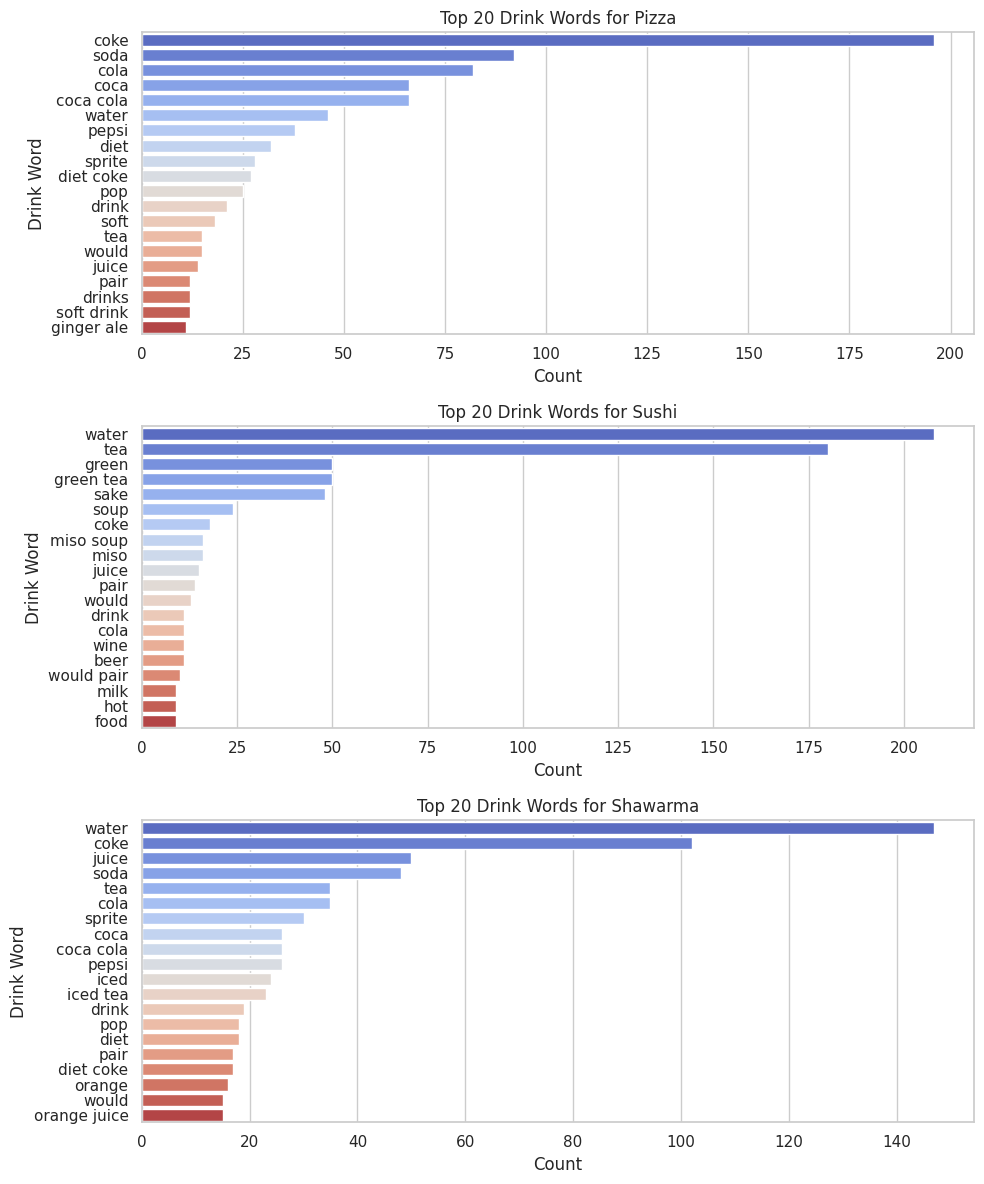

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')
stop_words = list(stopwords.words("english"))

# --- Step 1: Clean and extract drink responses ---
drink_col_index = 6
drink_col = data.iloc[:, drink_col_index].fillna("").astype(str).str.lower()
food_labels = data.iloc[:, -1].astype(str)

# --- Step 2: Vectorize with unigrams + bigrams ---
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words=stop_words)
X_drink = vectorizer.fit_transform(drink_col)
drink_vocab = vectorizer.get_feature_names_out()

# --- Step 3: Convert to DataFrame ---
drink_df = pd.DataFrame(X_drink.toarray(), columns=drink_vocab)
drink_df["Label"] = food_labels

# --- Step 4: Melt and group counts ---
drink_word_df = (
    drink_df.drop(columns="Label")
    .assign(Label=drink_df["Label"])
    .melt(id_vars="Label", var_name="Word", value_name="Count")
    .groupby(["Word", "Label"], as_index=False)["Count"]
    .sum()
)

# Remove any zero counts and digits
drink_word_df = drink_word_df[
    (drink_word_df["Count"] > 0) &
    (~drink_word_df["Word"].str.fullmatch(r"\d+"))
]

# --- Step 5: Plot top 20 per food label ---
sns.set(style="whitegrid")
food_labels = ["Pizza", "Sushi", "Shawarma"]

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, label in enumerate(food_labels):
    top_words = (
        drink_word_df[drink_word_df["Label"] == label]
        .sort_values(by="Count", ascending=False)
        .head(20)
    )

    sns.barplot(
        data=top_words,
        y="Word",
        x="Count",
        ax=axes[i],
        palette="coolwarm"
    )
    axes[i].set_title(f"Top 20 Drink Words for {label}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Drink Word")

plt.tight_layout()
plt.show()


Col 7

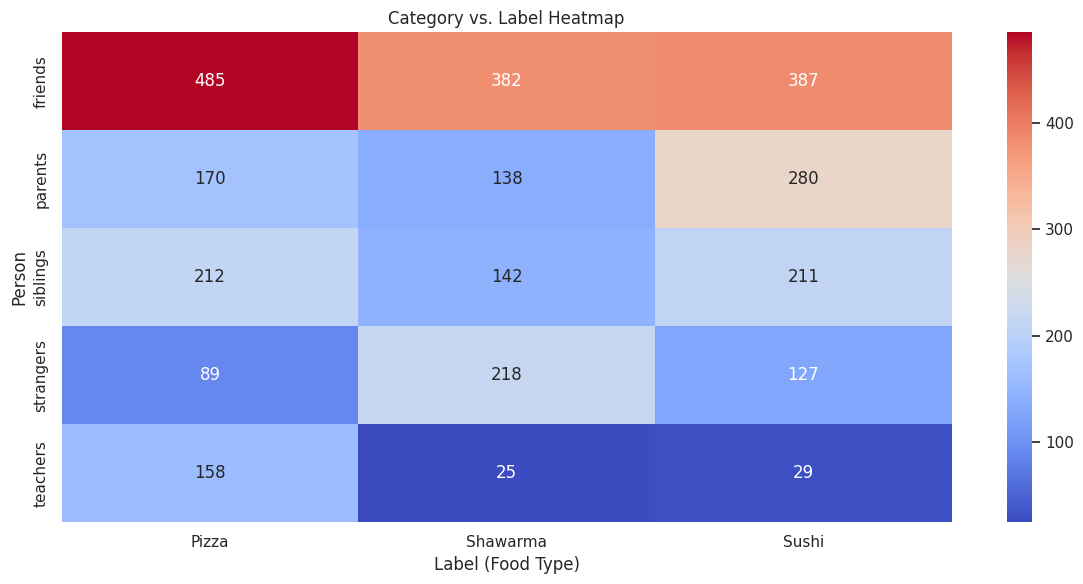

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select Q7 column
category_column = data.columns[7]  # "Who does it remind you of?"
label_column = data.columns[-1]   # Label (food name or encoded)

# If labels are numeric, convert them back to categories
if not isinstance(data[label_column].iloc[0], str):
    data[label_column] = data[label_column].astype("category")
    data[label_column] = data[label_column].cat.rename_categories(lambda x: str(x))

# Expand multi-label entries
expanded_data = data.assign(Category=data[category_column].str.split(",")).explode("Category")
expanded_data["Category"] = expanded_data["Category"].str.strip().str.lower()

# Crosstab and heatmap
category_label_crosstab = pd.crosstab(expanded_data["Category"], expanded_data[label_column])

plt.figure(figsize=(12, 6))
sns.heatmap(category_label_crosstab, cmap="coolwarm", annot=True, fmt="d")
plt.title("Category vs. Label Heatmap")
plt.xlabel("Label (Food Type)")
plt.ylabel("Person")
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

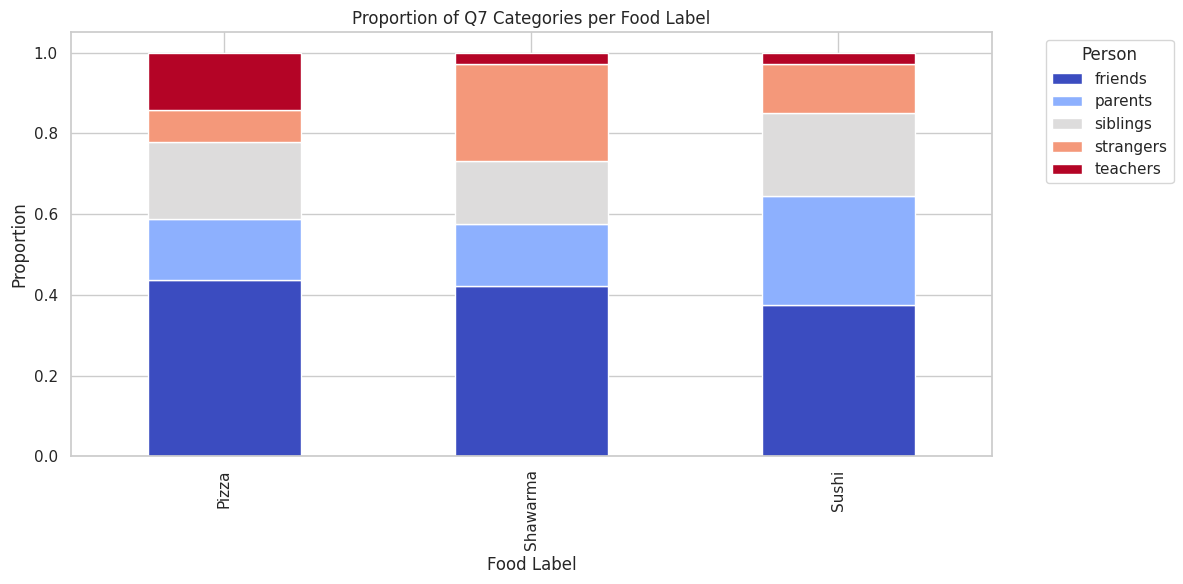

In [ ]:
# Get normalized frequency: percent of each label that selected each Q7 category
norm_crosstab = category_label_crosstab.div(category_label_crosstab.sum(axis=0), axis=1)

# Plot it
plt.figure(figsize=(12, 6))
norm_crosstab.T.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 6))
plt.title("Proportion of Q7 Categories per Food Label")
plt.xlabel("Food Label")
plt.ylabel("Proportion")
plt.legend(title="Person", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Step 1: Explode Q7
q7_col = data.columns[7]
label_col = data.columns[-1]

# Explode and clean
expanded = data[[q7_col, label_col]].copy()
expanded["Category"] = expanded[q7_col].str.split(",")
expanded = expanded.explode("Category")
expanded["Category"] = expanded["Category"].str.strip().str.lower()

# Step 2: Build crosstab from exploded version
crosstab = pd.crosstab(expanded["Category"], expanded[label_col])

# Step 3: Normalize by total label counts
label_totals = expanded[label_col].value_counts()
normalized = crosstab.div(label_totals, axis=1).round(3)

# Step 4: View it
display(normalized)


Label,Pizza,Shawarma,Sushi
Category,,,
friends,0.435,0.422,0.374
parents,0.152,0.152,0.271
siblings,0.190,0.157,0.204
strangers,0.080,0.241,0.123
teachers,0.142,0.028,0.028


Col 8


In [ ]:
print(data.columns[8].count("None"))

0


In [ ]:
# Step 1: Extract just Q8 and Label columns
q8_col = data.columns[8]
label_col = data.columns[-1]

q8_map = {
    "None": 0,
    "A little (mild)": 1,
    "A moderate amount (medium)": 2,
    "A lot (hot)": 3,
    "I will have some of this food item with my hot sauce": 4
}

# Step 2: Create a clean temp DataFrame
q8_df = data[[q8_col, label_col]].copy()
q8_df.columns = ["Q8_text", "Label"]  # rename for sanity

# Step 3: Map hot sauce levels to numbers
q8_df["Q8_numeric"] = q8_df["Q8_text"].map(q8_map)

# Step 4: Make sure labels are strings (e.g., "Pizza", not 0)
q8_df["Label"] = q8_df["Label"].astype(str)

# Step 5: Group by food label and calculate mean spice level
result = q8_df.groupby("Label")["Q8_numeric"].mean()
print(result.sort_values(ascending=False))


Label
Shawarma    1.972222
Sushi       1.650000
Pizza       1.603704
Name: Q8_numeric, dtype: float64


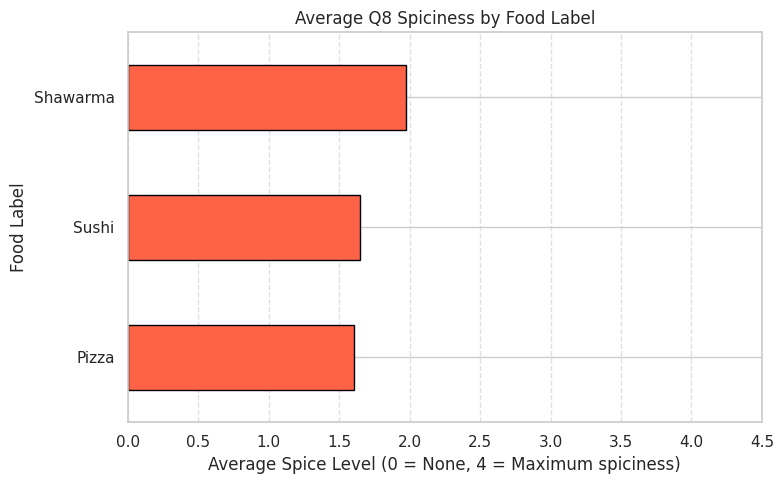

In [ ]:
import matplotlib.pyplot as plt

# Plot the average spice level by food label
plt.figure(figsize=(8, 5))
result.sort_values(ascending=True).plot(kind='barh', color='tomato', edgecolor='black')

plt.title("Average Q8 Spiciness by Food Label")
plt.xlabel("Average Spice Level (0 = None, 4 = Maximum spiciness)")
plt.ylabel("Food Label")
plt.xlim(0, 4.5)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


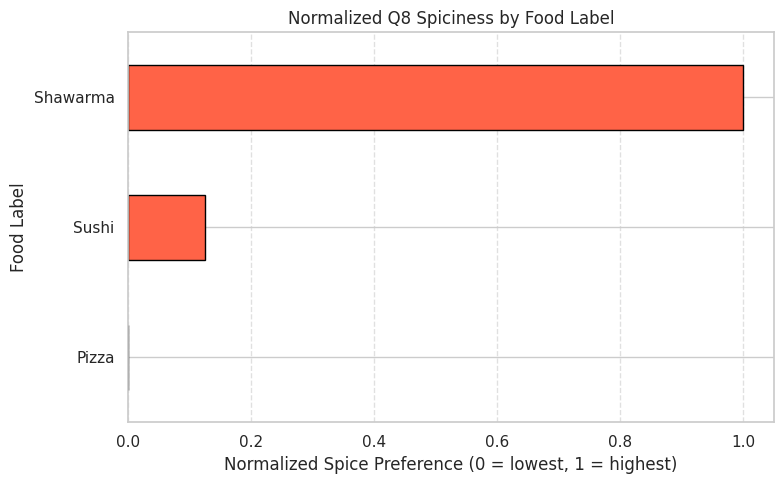

In [ ]:
# Normalize spice levels to range 0–1
normalized = (result - result.min()) / (result.max() - result.min())

# Plot normalized spice levels
plt.figure(figsize=(8, 5))
normalized.sort_values().plot(kind='barh', color='tomato', edgecolor='black')

plt.title("Normalized Q8 Spiciness by Food Label")
plt.xlabel("Normalized Spice Preference (0 = lowest, 1 = highest)")
plt.ylabel("Food Label")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


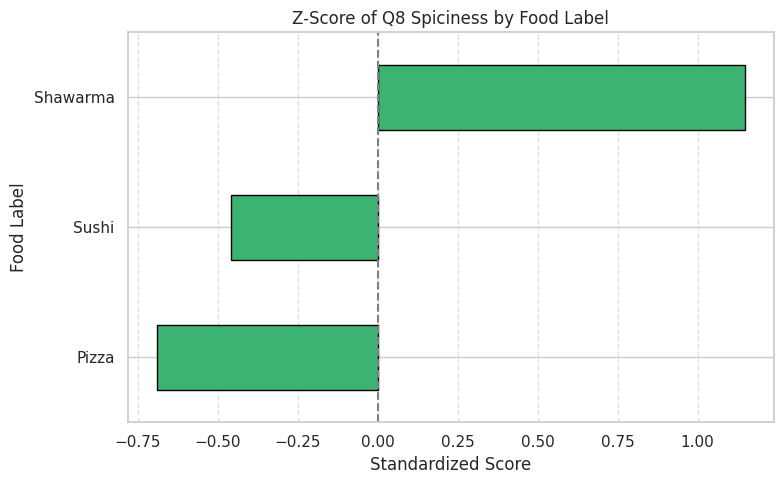

In [ ]:
standardized = (result - result.mean()) / result.std()

# Plot
plt.figure(figsize=(8, 5))
standardized.sort_values().plot(kind='barh', color='mediumseagreen', edgecolor='black')

plt.title("Z-Score of Q8 Spiciness by Food Label")
plt.xlabel("Standardized Score")
plt.ylabel("Food Label")
plt.axvline(0, color='gray', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd

# Target
y = data[data.columns[-1]].astype(str)

# Q8 ordinal
q8_map = {
    "A little (mild)": 1,
    "A moderate amount (medium)": 2,
    "A lot (hot)": 3,
    "I will have some of this food item with my hot sauce": 4
}
X_ord = data[data.columns[8]].map(q8_map).fillna(0).to_frame()

# Q8 one-hot
X_cat = pd.get_dummies(data[data.columns[8]].fillna("missing"))

# Compare
model = LogisticRegression(max_iter=1000)
acc_ord = cross_val_score(model, X_ord, y, cv=5).mean()
acc_cat = cross_val_score(model, X_cat, y, cv=5).mean()

print(f"Ordinal Q8 accuracy: {acc_ord:.4f}")
print(f"One-hot Q8 accuracy: {acc_cat:.4f}")

# Finding: Ordinal model performs slightly better, so feature is ordinal


Ordinal Q8 accuracy: 0.5304
One-hot Q8 accuracy: 0.5286


# Cleaning Data

## cleaning Q2

In [ ]:
def count_ingredients(text):
    # Convert number words to numeric values
    number_words = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10}

    # Check for numeric values and number words
    numeric_match = re.findall(r'\d+', text)
    number_word_matches = [number_words[word] for word in number_words if word in text.lower()]

    # Get maximum from numeric values and number words
    max_value = 0
    if numeric_match:
        max_value = max(int(val) for val in numeric_match)

    if number_word_matches:
        max_value = max(max_value, max(number_word_matches))

    # Count comma-separated values
    comma_separated_count = text.count(',') + 1
    max_value = max(max_value, comma_separated_count)

    return max_value


# Apply the function to the column
data['ingredient_count'] = data['Q2: How many ingredients would you expect this food item to contain?'].apply(count_ingredients)


##cleaning Q3

In [ ]:
# Create binary columns for each setting
settings = ['Week day lunch', 'Week day dinner', 'Weekend lunch', 'Weekend dinner', 'At a party', 'Late night snack']
for setting in settings:
    # Check for the presence of the setting in the 'Q3' column.
    data[setting] = data['Q3: In what setting would you expect this food to be served? Please check all that apply'].str.contains(setting, na=False).astype(int)


##cleaning Q4

In [ ]:
DEFAULT_VALUE = 3.0

def extract_price(text):
    text = str(text)  # Convert to string if not already
    match = re.findall(r'[-+]?\d*\.?\d+', text)
    float_match = [float(x) for x in match]
    if float_match:
        return min(float_match)
    return DEFAULT_VALUE


data['food_price'] = data['Q4: How much would you expect to pay for one serving of this food item?'].apply(extract_price)


##cleaning Q7

In [ ]:
# Create binary columns for each category
categories = ["Parents", "Siblings", "Friends", "Teachers", "Strangers"]
for category in categories:
    # Check for the presence of the category in the 'Q7' column.
    data[category] = data["Q7: When you think about this food item, who does it remind you of?"].str.contains(category, na=False).astype(int)

##cleaning Q8

In [ ]:
spiciness_mapping = {
    'NaN': 0,
    'None': 0,
    'A little (mild)': 1,
    'A moderate amount (medium)': 2,
    'A lot (hot)': 3,
    'I will have some of this food item with my hot sauce': 4
}


# Apply the mapping to create the "spiciness" column
data['spiciness'] = data['Q8: How much hot sauce would you add to this food item?'].map(spiciness_mapping).fillna(0).astype(int)


In [ ]:
data

,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label,...,Weekend dinner,At a party,Late night snack,food_price,Parents,Siblings,Friends,Teachers,Strangers,spiciness
0,716549,3,6,"Week day lunch,At a party,Late night snack",5,Cloudy with a Chance of Meatballs,Coke,Friends,A little (mild),Pizza,...,0,1,1,5.0,0,0,1,0,0,1
1,715742,4,"bread, meet","Week day lunch,At a party,Late night snack",5$ for a large piece,All sort of american young boy movies,Coke,"Friends,Teachers,Strangers",NaN,Pizza,...,0,1,1,5.0,0,0,1,1,1,0
2,727333,3,5,"Week day lunch,Week day dinner,Weekend lunch,W...",10dollar,action movie,cola,Friends,A moderate amount (medium),Pizza,...,1,0,0,10.0,0,0,1,0,0,2
3,606874,4,6-7,"Week day lunch,Week day dinner,Weekend lunch,W...",$3,Mamma Mia,Soda,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza,...,1,1,1,3.0,0,1,1,1,0,4
4,505318,2,3 or more,"Week day lunch,Week day dinner,Weekend lunch,W...",$5,Cloudy with a chance of meatballs,Soda,"Siblings,Friends",A little (mild),Pizza,...,1,1,0,5.0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,413395,2,3-5,"Week day dinner,Weekend dinner",5-Mar,Romantic Movies,Soup,"Parents,Siblings,Friends",NaN,Sushi,...,1,0,0,5.0,1,1,1,0,0,0
1640,386750,3,4 to 5,"Week day lunch,Weekend lunch",About 12 to 15 dollars,One Piece Film Gold,Water,Friends,A little (mild),Sushi,...,0,0,0,12.0,0,0,1,0,0,1
1641,617178,2,"It has a minimum of two ingredients, and on av...","Week day lunch,Weekend lunch,At a party",10 dollars,I think of the anime Food Wars,Nothing in particular– probably just water,Parents,NaN,Sushi,...,0,1,0,10.0,1,0,0,0,0,0
1642,630128,1,3 or a finite amount more,"Week day lunch,Weekend lunch,Late night snack",$1 or less (for a single roll),John Wick 3,Any tea,"Siblings,Friends,Strangers",A little (mild),Sushi,...,0,0,1,1.0,0,1,1,0,1,1


# Decision Tree

In [ ]:
print(data.shape)
print(data["Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)"].shape)
print(data["ingredient_count"].shape)
print((data["Week day lunch"] == 1).shape)
print((data["Week day dinner"] == 1).shape)
print((data["Weekend lunch"] == 1).shape)
print((data["Weekend dinner"] == 1).shape)
print((data["At a party"] == 1).shape)
print((data["Late night snack"] == 1).shape)
print(data["food_price"].shape)

(1644, 24)
(1644,)
(1644,)
(1644,)
(1644,)
(1644,)
(1644,)
(1644,)
(1644,)
(1644,)


In [ ]:
data_fets = np.stack([
    data["Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)"],  # how complex it is to make food
    data["ingredient_count"],  # how many ingredients are needed
    data["Week day lunch"] == 1,  # what setting
    data["Week day dinner"] == 1,
    data["Weekend lunch"] == 1,
    data["Weekend dinner"] == 1,
    data["At a party"] == 1,
    data["Late night snack"] == 1,
    data["food_price"],  # how much willing to pay
    data["Parents"] == 1,  # what does it remind you of
    data["Siblings"] == 1,
    data["Friends"] == 1,
    data["Teachers"] == 1,
    data["Strangers"] == 1,
    data["spiciness"]  # how spicy you want it
], axis=1)

print(data_fets.shape)

feature_names = [
    "complexity",
    "ingredient_count",
    "weekday_lunch",
    "weekday_dinner",
    "weekend_lunch",
    "weekend_dinner",
    "at_party",
    "late_night_snack",
    "food_price",
    "w_parent",
    "w_siblings",
    "w_friends",
    "w_teachers",
    "w_strangers",
    "spiciness"]

(1644, 15)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into X (dependent variables) and t (response variable)
X = data_fets
t = np.array(data["Label"])

# First, we will use `train_test_split` to split the data set into
# 80% train+validation, 20% test
X_tv, X_test, t_tv, t_test = train_test_split(X, t, test_size=0.2, random_state=1)

# Then, use `train_test_split` to split the training+validation data
# 80% train, 20% valid
X_train, X_valid, t_train, t_valid = train_test_split(X_tv, t_tv, test_size=0.2, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# imports to visualize tree
from sklearn import tree as treeViz
import graphviz
import pydotplus
from IPython.display import display

Training Accuracy: 0.7775665399239544
Validation Accuracy: 0.7186311787072244


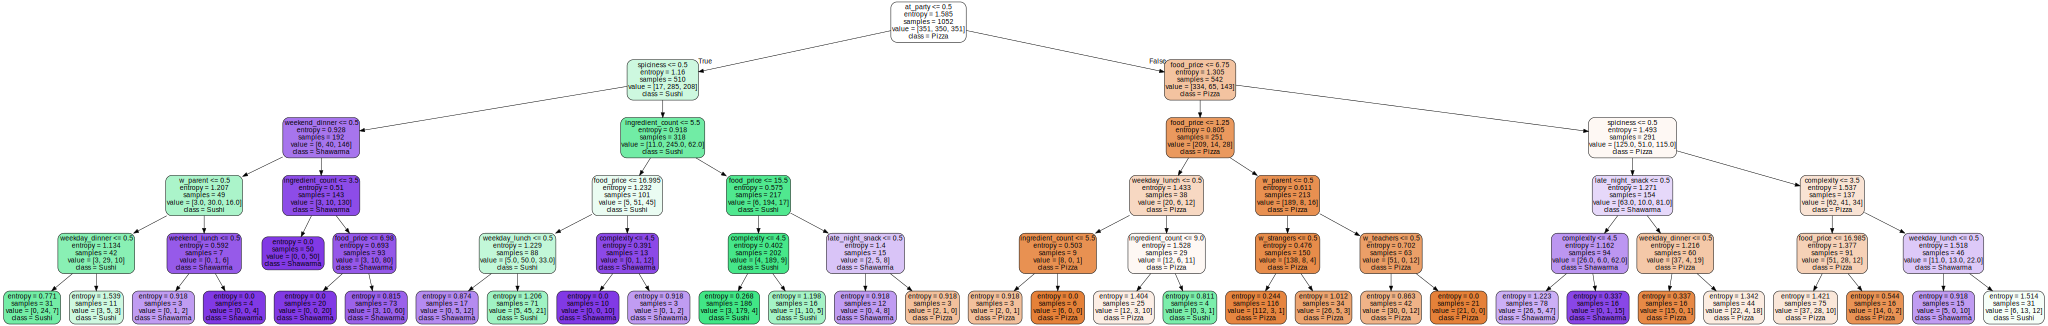

In [ ]:
def visualize_tree(model, max_depth=5):
    dot_data = treeViz.export_graphviz(model,
                                       feature_names=feature_names,
                                       max_depth=max_depth,
                                       class_names=["Pizza", "Sushi", "Shawarma"],
                                       filled=True,
                                       rounded=True)
    return display(graphviz.Source(dot_data))

# Creating a DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)

tree.fit(X_train, t_train)

# Print the training and validation scores (accuracy)
print("Training Accuracy:", tree.score(X_train, t_train))
print("Validation Accuracy:", tree.score(X_valid, t_valid))

visualize_tree(tree)


Using criterion entropy
Best Accuracy: 0.7490, Best Hyperparameters: (3, 2)

Using criterion gini
Best Accuracy: 0.7452, Best Hyperparameters: (3, 2)


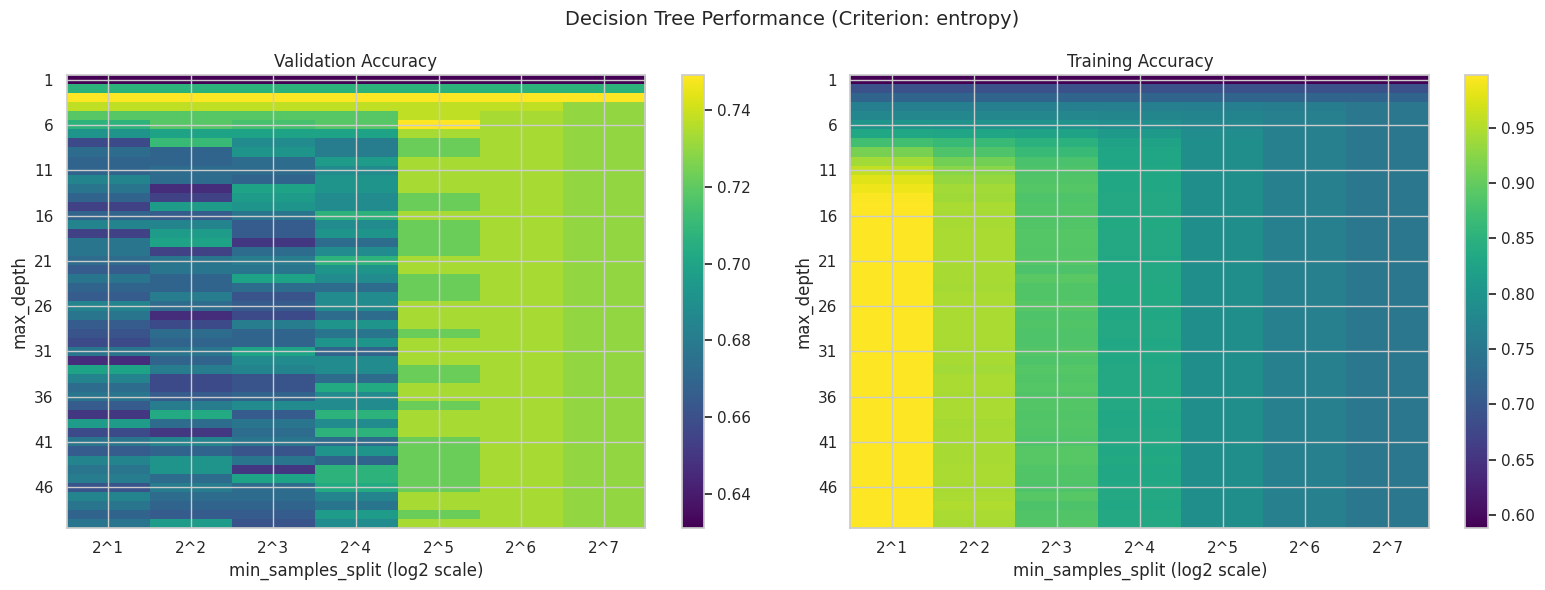

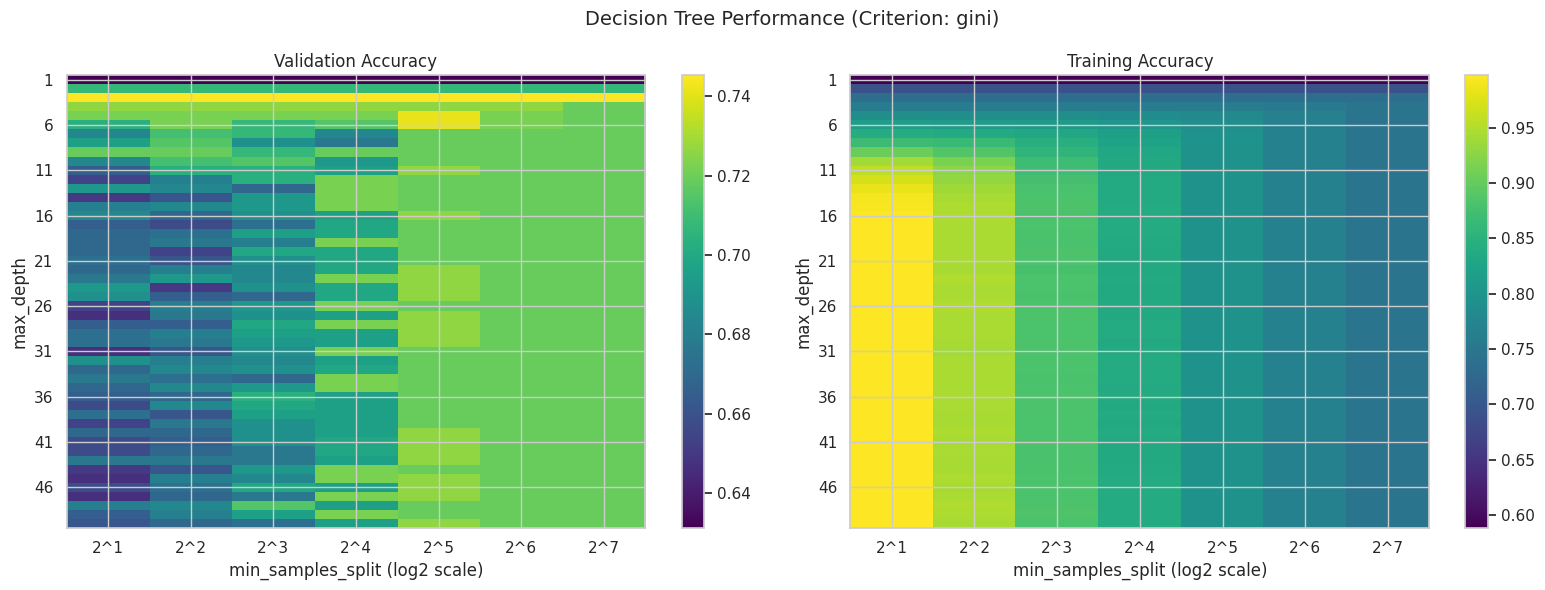


Best model test accuracy: 0.7052


In [ ]:
def build_all_models(max_depths,
                     min_samples_split,
                     criterion,
                     X_train=X_train,
                     t_train=t_train,
                     X_valid=X_valid,
                     t_valid=t_valid):
    out = {}

    for d in max_depths:
        for s in min_samples_split:
            out[(d, s)] = {}
            # Create and fit the decision tree
            tree = DecisionTreeClassifier(criterion=criterion, max_depth=d, min_samples_split=s)
            tree.fit(X_train, t_train)

            # Store validation and training scores
            out[(d, s)]['val'] = tree.score(X_valid, t_valid)
            out[(d, s)]['train'] = tree.score(X_train, t_train)
    return out

# Generate hyperparameter values to test
criterions = ["entropy", "gini"]
max_depths = list(range(1, 51))  # All integers from 1 to 50
min_samples_split = [2**i for i in range(1, 8)]  # Powers of 2: 2,4,8,...,128

# Dictionary to store all results
all_results = {}

for criterion in criterions:
    print(f"\nUsing criterion {criterion}")
    res = build_all_models(max_depths, min_samples_split, criterion)
    all_results[criterion] = res

    # Find best hyperparameters for this criterion
    best_acc = 0
    best_hp = None
    for d, s in res:
        score = res[(d,s)]['val']
        if score > best_acc:
            best_acc = score
            best_hp = (d, s)

    print(f"Best Accuracy: {best_acc:.4f}, Best Hyperparameters: {best_hp}")

# Visualization
def plot_results(criterion, results):
    # Prepare data for heatmap
    depths = sorted(list(set([d for d, s in results.keys()])))
    splits = sorted(list(set([s for d, s in results.keys()])))

    val_acc = np.zeros((len(depths), len(splits)))
    train_acc = np.zeros((len(depths), len(splits)))

    for i, d in enumerate(depths):
        for j, s in enumerate(splits):
            val_acc[i,j] = results[(d,s)]['val']
            train_acc[i,j] = results[(d,s)]['train']

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Decision Tree Performance (Criterion: {criterion})', fontsize=14)

    # Validation accuracy heatmap
    im1 = ax1.imshow(val_acc, cmap='viridis', aspect='auto')
    ax1.set_title('Validation Accuracy')
    ax1.set_xlabel('min_samples_split (log2 scale)')
    ax1.set_ylabel('max_depth')
    ax1.set_xticks(range(len(splits)))
    ax1.set_xticklabels([f'2^{int(np.log2(s))}' for s in splits])
    ax1.set_yticks(range(0, len(depths), 5))
    ax1.set_yticklabels(depths[::5])
    fig.colorbar(im1, ax=ax1)

    # Training accuracy heatmap
    im2 = ax2.imshow(train_acc, cmap='viridis', aspect='auto')
    ax2.set_title('Training Accuracy')
    ax2.set_xlabel('min_samples_split (log2 scale)')
    ax2.set_ylabel('max_depth')
    ax2.set_xticks(range(len(splits)))
    ax2.set_xticklabels([f'2^{int(np.log2(s))}' for s in splits])
    ax2.set_yticks(range(0, len(depths), 5))
    ax2.set_yticklabels(depths[::5])
    fig.colorbar(im2, ax=ax2)

    plt.tight_layout()
    plt.show()

# Plot results for each criterion
for criterion in criterions:
    plot_results(criterion, all_results[criterion])

# Train and evaluate the best model (using the best found hyperparameters)
best_tree = DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_split=4)
best_tree.fit(X_train, t_train)
test_accuracy = best_tree.score(X_test, t_test)
print(f"\nBest model test accuracy: {test_accuracy:.4f}")

# logistic regression

In [ ]:
data_fets2 = np.stack([
    np.ones(data.shape[0]),
    data["Week day lunch"] == 1,
    data["Week day dinner"] == 1,
    data["Weekend lunch"] == 1,
    data["Weekend dinner"] == 1,
    data["At a party"] == 1,
    data["Late night snack"] == 1,
    data["Parents"] == 1,
    data["Siblings"] == 1,
    data["Friends"] == 1,
    data["Teachers"] == 1,
    data["Strangers"] == 1,
    data["food_price"],
    data["Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)"],  # how complex it is to make food
    data["ingredient_count"],  # how many ingredients are needed
    data["spiciness"]  # how spicy you want it
], axis=1)

print(data_fets2.shape)

feature_names2 = [
    "intercept",
    "weekday_lunch",
    "weekday_dinner",
    "weekend_lunch",
    "weekend_dinner",
    "at_party",
    "late_night_snack",
    "w_parent",
    "w_siblings",
    "w_friends",
    "w_teachers",
    "w_strangers",
    "food_price",
    "complexity",
    "ingredient_count",
    "spiciness"
    ]



(1644, 16)


In [ ]:
# Split the data into X (dependent variables) and t (response variable)
X2 = data_fets2
t2 = np.array(data["Label"])

X_tv2, X_test2, t_tv2, t_test2 = train_test_split(X2, t2, test_size=0.2, random_state=1)
X_train2, X_valid2, t_train2, t_valid2 = train_test_split(X_tv2, t_tv2, test_size=0.2, random_state=1)



# The numerical features should start at index 12; others are categorical
numerical_value_start = 12

# The mean/std of the numerical features over X_train
mean = X_train2[:, numerical_value_start:].mean(axis=0)
std = X_train2[:, numerical_value_start:].std(axis=0)

X_train_norm = X_train2.copy()
X_valid_norm = X_valid2.copy()
X_test_norm = X_test2.copy()
X_train_norm[:, numerical_value_start:] = (X_train2[:, numerical_value_start:] - mean) / std

X_valid_norm[:, numerical_value_start:] = (X_valid2[:, numerical_value_start:] - mean) / std
X_test_norm[:, numerical_value_start:] = (X_test2[:, numerical_value_start:] - mean) / std

print(X_train_norm[:, numerical_value_start:].mean(axis=0)) # Should be all very close to 0
print(X_train_norm[:, numerical_value_start:].std(axis=0))  # Should be all very close to 1
print(X_valid_norm[:, numerical_value_start:].mean(axis=0)) # Should be close to 0
print(X_valid_norm[:, numerical_value_start:].std(axis=0))  # Should be close to 1
print(X_test_norm[:, numerical_value_start:].mean(axis=0)) # Should be close to 0
print(X_test_norm[:, numerical_value_start:].std(axis=0))  # Should be close to 1

[ 5.48251769e-17 -5.42447371e-17  8.08394332e-17  4.89680117e-17]
[1. 1. 1. 1.]
[-0.11742414 -0.07230219  0.03099308 -0.05010041]
[1.46746737 0.99451355 1.22437604 0.95151727]
[ 0.04639971 -0.00483194 -0.00326787 -0.05213782]
[1.0717086  1.04338772 0.94952373 0.97161714]


In [ ]:
def softmax(z):
    """Compute softmax values for each row of z"""
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Numerical stability
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def loss_softmax(W, X, t_onehot):
    """Compute cross-entropy loss"""
    m = X.shape[0]
    scores = X @ W
    probs = softmax(scores)
    return -np.sum(t_onehot * np.log(probs + 1e-15)) / m  # Added small epsilon to avoid log(0)

def grad_softmax(W, X, t_onehot):
    """Compute gradient of the loss function"""
    m = X.shape[0]
    scores = X @ W
    probs = softmax(scores)
    return X.T @ (probs - t_onehot) / m


Training model with alpha = 0.0001
Iteration 0: Train Loss = 1.0997, Valid Loss = 1.1024, Valid Acc = 0.3004
Iteration 100: Train Loss = 1.0976, Valid Loss = 1.1003, Valid Acc = 0.3308
Iteration 200: Train Loss = 1.0955, Valid Loss = 1.0982, Valid Acc = 0.3460
Iteration 300: Train Loss = 1.0935, Valid Loss = 1.0961, Valid Acc = 0.3878
Iteration 400: Train Loss = 1.0915, Valid Loss = 1.0940, Valid Acc = 0.4183
Iteration 500: Train Loss = 1.0895, Valid Loss = 1.0919, Valid Acc = 0.4373
Iteration 600: Train Loss = 1.0875, Valid Loss = 1.0899, Valid Acc = 0.4639
Iteration 700: Train Loss = 1.0855, Valid Loss = 1.0878, Valid Acc = 0.5019
Iteration 800: Train Loss = 1.0835, Valid Loss = 1.0858, Valid Acc = 0.5361
Iteration 900: Train Loss = 1.0816, Valid Loss = 1.0839, Valid Acc = 0.5323

Training model with alpha = 0.001
Iteration 0: Train Loss = 1.0979, Valid Loss = 1.0969, Valid Acc = 0.4106
Iteration 100: Train Loss = 1.0780, Valid Loss = 1.0768, Valid Acc = 0.6806
Iteration 200: Train 

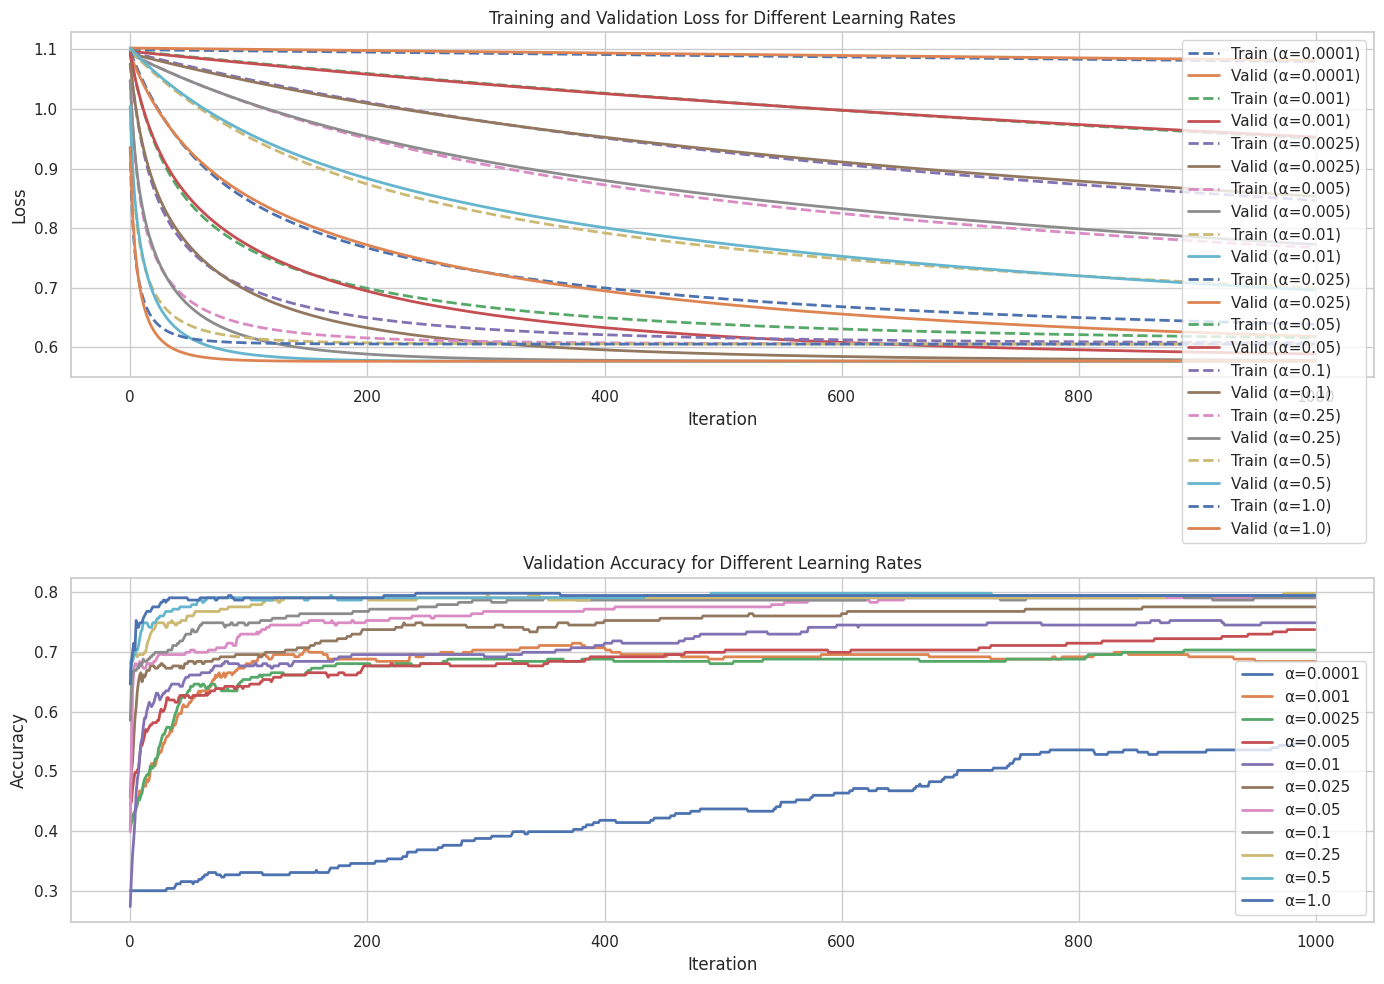


Alpha Evaluation Summary:
Alpha      Final Val Accuracy
0.0001     0.5551         
0.0010     0.6844         
0.0025     0.7034         
0.0050     0.7376         
0.0100     0.7490         
0.0250     0.7757         
0.0500     0.7909         
0.1000     0.7909         
0.2500     0.7985         
0.5000     0.7947         
1.0000     0.7947         

Best alpha: 0.25 with validation accuracy: 0.7985

Classification Report (Best Model):
              precision    recall  f1-score   support

       Pizza       0.78      0.83      0.81       103
    Shawarma       0.84      0.82      0.83        80
       Sushi       0.78      0.72      0.75        80

    accuracy                           0.80       263
   macro avg       0.80      0.79      0.80       263
weighted avg       0.80      0.80      0.80       263


Overall Accuracy: 0.7985 (79.85%)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

def train_softmax(X_train, t_train_str, X_valid, t_valid_str, alpha=0.1, niter=2000):
    """Train softmax regression model with string labels"""

    # 1. Convert string labels to numerical indices
    unique_labels = np.unique(t_train_str)
    label_to_idx = {label: i for i, label in enumerate(unique_labels)}
    idx_to_label = {i: label for i, label in enumerate(unique_labels)}

    t_train = np.array([label_to_idx[label] for label in t_train_str])
    t_valid = np.array([label_to_idx[label] for label in t_valid_str])

    # 2. Convert to one-hot encoding
    n_classes = len(unique_labels)
    t_train_onehot = np.eye(n_classes)[t_train]
    t_valid_onehot = np.eye(n_classes)[t_valid]

    # 3. Add bias term to feature matrix
    X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
    X_valid_bias = np.hstack([np.ones((X_valid.shape[0], 1)), X_valid])

    # 4. Initialize weights
    W = np.random.randn(X_train_bias.shape[1], n_classes) * 0.01

    # 5. Training loop
    train_loss_history = []
    valid_loss_history = []
    valid_accuracy_history = []

    for it in range(niter):
        # Compute gradient and update weights
        dW = grad_softmax(W, X_train_bias, t_train_onehot)
        W = W - alpha * dW

        # Track progress
        train_loss = loss_softmax(W, X_train_bias, t_train_onehot)
        valid_loss = loss_softmax(W, X_valid_bias, t_valid_onehot)
        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

        # Calculate validation accuracy
        y_pred = predict_softmax(X_valid, W, idx_to_label)
        valid_accuracy = accuracy_score(t_valid_str, y_pred)
        valid_accuracy_history.append(valid_accuracy)

        if it % 100 == 0:
            print(f"Iteration {it}: Train Loss = {train_loss:.4f}, Valid Loss = {valid_loss:.4f}, Valid Acc = {valid_accuracy:.4f}")

    return W, label_to_idx, idx_to_label, train_loss_history, valid_loss_history, valid_accuracy_history

def predict_softmax(X, W, idx_to_label):
    """Make predictions using trained softmax model"""
    # Add bias term
    if X.ndim == 1:
        X = X.reshape(1, -1)
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

    # Compute scores and probabilities
    scores = X_bias @ W
    probs = softmax(scores)

    # Convert to string labels
    pred_indices = np.argmax(probs, axis=1)
    return [idx_to_label[idx] for idx in pred_indices]

def evaluate_alpha_values(X_train, t_train_str, X_valid, t_valid_str, alphas=[0.0001, 0.001, 0.01, 0.1, 0.5, 1.0], niter=1000):
    """Evaluate different learning rates and select the best one"""

    results = {}
    best_accuracy = 0
    best_alpha = None
    best_model = None

    plt.figure(figsize=(14, 10))

    # Plot training curves
    plt.subplot(2, 1, 1)
    for alpha in alphas:
        print(f"\nTraining model with alpha = {alpha}")
        W, label_to_idx, idx_to_label, train_loss, valid_loss, valid_acc = train_softmax(
            X_train=X_train,
            t_train_str=t_train_str,
            X_valid=X_valid,
            t_valid_str=t_valid_str,
            alpha=alpha,
            niter=niter
        )

        # Store results
        final_valid_accuracy = valid_acc[-1]
        results[alpha] = {
            'model': W,
            'label_mappings': (label_to_idx, idx_to_label),
            'train_loss': train_loss,
            'valid_loss': valid_loss,
            'valid_accuracy': valid_acc,
            'final_accuracy': final_valid_accuracy
        }

        # Update best model
        if final_valid_accuracy > best_accuracy:
            best_accuracy = final_valid_accuracy
            best_alpha = alpha
            best_model = (W, label_to_idx, idx_to_label)

        # Plot training loss
        plt.plot(train_loss, '--', label=f'Train (α={alpha})', linewidth=2)
        # Plot validation loss
        plt.plot(valid_loss, '-', label=f'Valid (α={alpha})', linewidth=2)

    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss for Different Learning Rates')
    plt.legend()
    plt.grid(True)

    # Plot validation accuracies
    plt.subplot(2, 1, 2)
    for alpha in alphas:
        plt.plot(results[alpha]['valid_accuracy'], label=f'α={alpha}', linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy for Different Learning Rates')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Print summary of results
    print("\nAlpha Evaluation Summary:")
    print("{:<10} {:<15}".format('Alpha', 'Final Val Accuracy'))
    for alpha in sorted(results.keys()):
        print("{:<10.4f} {:<15.4f}".format(alpha, results[alpha]['final_accuracy']))

    print(f"\nBest alpha: {best_alpha} with validation accuracy: {best_accuracy:.4f}")

    return best_alpha, best_model, results

# Evaluate multiple alpha values
best_alpha, (W, label_to_idx, idx_to_label), all_results = evaluate_alpha_values(
    X_train=X_train_norm,
    t_train_str=t_train2,
    X_valid=X_valid_norm,
    t_valid_str=t_valid2,
    alphas=[0.0001, 0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1.0],  # Test a range of learning rates
    niter=1000
)

# Make predictions with the best model
y_pred = predict_softmax(X_valid_norm, W, idx_to_label)

# 1. Classification Report (detailed metrics)
print("\nClassification Report (Best Model):")
print(classification_report(t_valid2, y_pred))

# 2. Accuracy Score
accuracy = accuracy_score(t_valid2, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f} ({(accuracy*100):.2f}%)")


Test Set Classification Report:
              precision    recall  f1-score   support

       Pizza       0.76      0.84      0.80        94
    Shawarma       0.88      0.83      0.86       118
       Sushi       0.80      0.78      0.79       117

    accuracy                           0.81       329
   macro avg       0.81      0.82      0.81       329
weighted avg       0.82      0.81      0.82       329


Test Set Overall Accuracy: 0.8146 (81.46%)


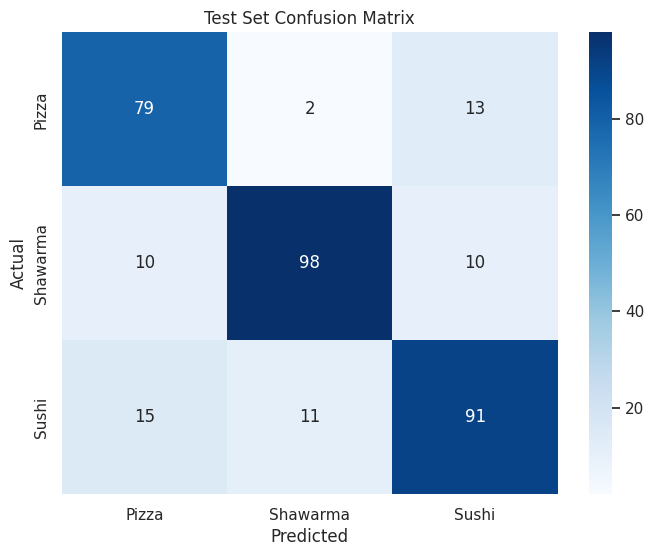

In [ ]:
def evaluate_on_test(X_test, t_test_str, W, label_to_idx, idx_to_label):
    """Evaluate the trained model on test set"""
    # Convert test labels to numerical indices for accuracy calculation
    t_test = np.array([label_to_idx[label] for label in t_test_str])

    # Make predictions
    y_pred = predict_softmax(X_test, W, idx_to_label)

    # Convert predictions to numerical indices for metrics calculation
    y_pred_idx = np.array([label_to_idx[label] for label in y_pred])

    # 1. Classification Report (detailed metrics)
    print("\nTest Set Classification Report:")
    print(classification_report(t_test_str, y_pred))

    # 2. Accuracy Score
    accuracy = accuracy_score(t_test_str, y_pred)
    print(f"\nTest Set Overall Accuracy: {accuracy:.4f} ({(accuracy*100):.2f}%)")

    # 3. Confusion Matrix (for class-wise performance)
    cm = confusion_matrix(t_test_str, y_pred, labels=list(label_to_idx.keys()))
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_to_idx.keys(),
                yticklabels=label_to_idx.keys())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Test Set Confusion Matrix')
    plt.show()

    return y_pred

# Evaluate on test set
y_test_pred = evaluate_on_test(
    X_test=X_test_norm,
    t_test_str=t_test2,
    W=W,
    label_to_idx=label_to_idx,
    idx_to_label=idx_to_label
)

# kNN

Metric: euclidean, k=1 → Accuracy: 0.665
Metric: euclidean, k=2 → Accuracy: 0.665
Metric: euclidean, k=3 → Accuracy: 0.715
Metric: euclidean, k=4 → Accuracy: 0.722
Metric: euclidean, k=5 → Accuracy: 0.707
Metric: euclidean, k=6 → Accuracy: 0.703
Metric: euclidean, k=7 → Accuracy: 0.700
Metric: euclidean, k=8 → Accuracy: 0.715
Metric: euclidean, k=9 → Accuracy: 0.681
Metric: euclidean, k=10 → Accuracy: 0.696
Metric: euclidean, k=11 → Accuracy: 0.669
Metric: euclidean, k=12 → Accuracy: 0.684
Metric: euclidean, k=13 → Accuracy: 0.688
Metric: euclidean, k=14 → Accuracy: 0.692
Metric: euclidean, k=15 → Accuracy: 0.700
Metric: euclidean, k=16 → Accuracy: 0.692
Metric: euclidean, k=17 → Accuracy: 0.688
Metric: euclidean, k=18 → Accuracy: 0.696
Metric: euclidean, k=19 → Accuracy: 0.681
Metric: euclidean, k=20 → Accuracy: 0.688
Metric: euclidean, k=21 → Accuracy: 0.696
Metric: euclidean, k=22 → Accuracy: 0.696
Metric: euclidean, k=23 → Accuracy: 0.696
Metric: euclidean, k=24 → Accuracy: 0.696
M

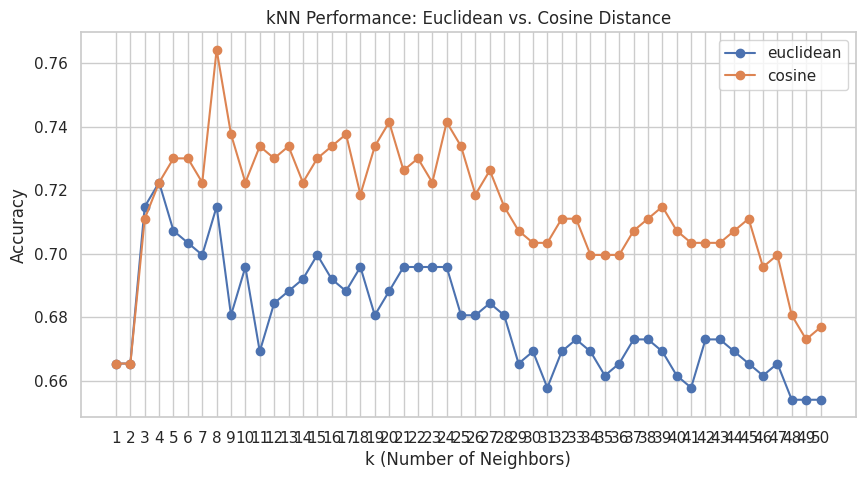


Best Config: k=8, Metric='cosine' (Accuracy: 0.764)

Final Test Accuracy (k=8, cosine): 0.748


In [ ]:
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity


# 1. Split data
X3 = data_fets
t3 = np.array(data["Label"])
X_tv3, X_test3, t_tv3, t_test3 = train_test_split(X3, t3, test_size=0.2, random_state=1)
X_train3, X_valid3, t_train3, t_valid3 = train_test_split(X_tv3, t_tv3, test_size=0.2, random_state=1)


# 2. Preprocessing (Standard Scaling)
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_valid3 = scaler.transform(X_valid3)
X_test3 = scaler.transform(X_test3)


# 3. Distance Metrics
def euclidean_distance(v, X):
    """Euclidean distance (L2 norm)"""
    diff = X - v
    sqdiff = diff ** 2
    sumval = np.sum(sqdiff, axis=1)
    return sumval

def cosine_distance(v, X):
    """Cosine distance (1 - cosine similarity)"""
    v_reshaped = v.reshape(1, -1)
    return 1 - cosine_similarity(v_reshaped, X).flatten()


# 4. kNN Predictor
def predict_knn(v, X_train, t_train, k=1, distance_metric='euclidean'):
    """Predict using kNN with specified distance metric"""
    if distance_metric == 'euclidean':
        dists = euclidean_distance(v, X_train)
    elif distance_metric == 'cosine':
        dists = cosine_distance(v, X_train)

    indices = np.argsort(dists)[:k]  # Get k-nearest neighbors
    neighbor_labels = t_train[indices]  # Get labels of nearest neighbors
    prediction = Counter(neighbor_labels).most_common(1)[0][0]  # Find most common label

    return prediction


def compute_accuracy(X_new, t_new, X_train=X_train, t_train=t_train, k=1):
    num_correct = 0
    for i in range(X_new.shape[0]):
        v = X_new[i]
        t = t_new[i]
        y = predict_knn(v, X_train, t_train, k)
        if y == t:
            num_correct += 1
    return num_correct / len(t_new)


# 5. Hyperparameter Testing (k + distance metric)
def test_hyperparameters(X, y, k_values=range(1, 51), metrics=['euclidean', 'cosine']):
    results = {metric: [] for metric in metrics}

    for metric in metrics:
        for k in k_values:
            correct = 0
            for i in range(len(X)):
                pred = predict_knn(X[i], X_train, t_train, k, metric)
                if pred == y[i]:
                    correct += 1
            accuracy = correct / len(y)
            results[metric].append(accuracy)
            print(f"Metric: {metric}, k={k} → Accuracy: {accuracy:.3f}")

    # Plot results
    plt.figure(figsize=(10, 5))
    for metric, accuracies in results.items():
        plt.plot(k_values, accuracies, marker='o', label=metric)

    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy')
    plt.title('kNN Performance: Euclidean vs. Cosine Distance')
    plt.legend()
    plt.grid(True)
    plt.xticks(k_values)
    plt.show()

    # Find best config
    best_accuracy = max([max(acc) for acc in results.values()])
    best_metric = [m for m, acc in results.items() if max(acc) == best_accuracy][0]
    best_k = k_values[np.argmax(results[best_metric])]

    print(f"\nBest Config: k={best_k}, Metric='{best_metric}' (Accuracy: {best_accuracy:.3f})")
    return {'k': best_k, 'metric': best_metric}


# 6. Run hyperparameter tuning on validation set
best_config = test_hyperparameters(X_valid, t_valid)


# 7. Evaluate best model on test set
correct = 0
for i in range(len(X_test)):
    pred = predict_knn(X_test[i], X_train, t_train, best_config['k'], best_config['metric'])
    if pred == t_test[i]:
        correct += 1
test_accuracy = correct / len(t_test)

print(f"\nFinal Test Accuracy (k={best_config['k']}, {best_config['metric']}): {test_accuracy:.3f}")


# BoW logistic regression


Feature Importance Ranking:
at_party: 0.2411
food_price: 0.1672
spiciness: 0.1355
ingredient_count: 0.1181
complexity: 0.0711
weekend_dinner: 0.0476
w_parent: 0.0386
late_night_snack: 0.0313
w_strangers: 0.0300
weekday_lunch: 0.0270
weekday_dinner: 0.0268
w_siblings: 0.0218
w_teachers: 0.0151
weekend_lunch: 0.0150
w_friends: 0.0138


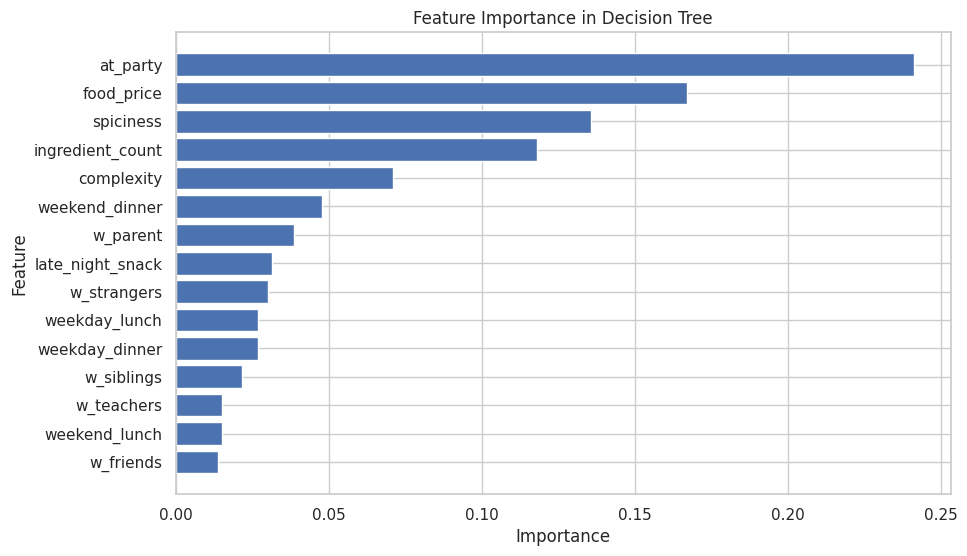

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the trained decision tree
importances = best_tree.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Print feature importance in order
print("\nFeature Importance Ranking:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_indices], importances[sorted_indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()  # Flip to show most important at the top
plt.show()



=== Min + Range Approach ===
Test Accuracy: 0.8359
Feature Importances:
  food_price           0.1915
  at_party             0.1666
  ingredient_count     0.1263
  spiciness            0.1126
  complexity           0.0811
  weekend_dinner       0.0444
  late_night_snack     0.0385
  weekday_lunch        0.0370
  range                0.0294
  w_parent             0.0275
  w_teachers           0.0259
  w_siblings           0.0253
  w_friends            0.0244
  w_strangers          0.0243
  weekday_dinner       0.0233
  weekend_lunch        0.0218


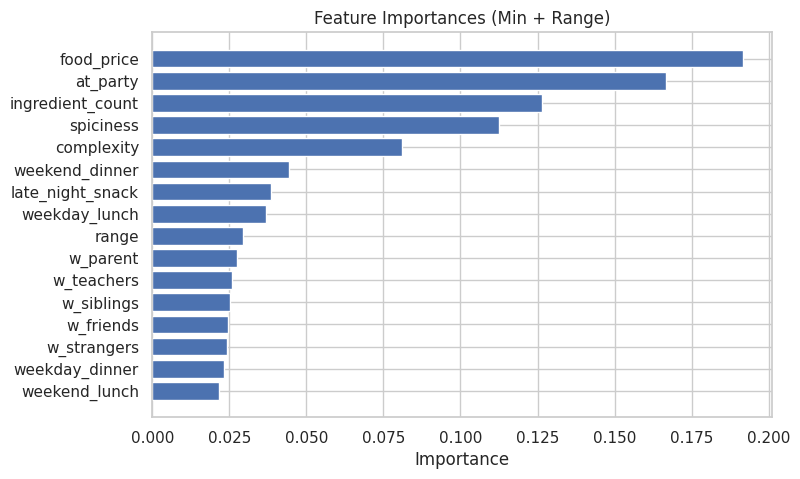


=== Median + Range Approach ===
Test Accuracy: 0.8511
Feature Importances:
  food_price           0.1920
  at_party             0.1641
  ingredient_count     0.1220
  spiciness            0.1155
  complexity           0.0788
  weekend_dinner       0.0444
  weekday_lunch        0.0394
  late_night_snack     0.0385
  w_teachers           0.0286
  range                0.0278
  w_parent             0.0275
  w_strangers          0.0256
  w_siblings           0.0249
  weekday_dinner       0.0247
  w_friends            0.0243
  weekend_lunch        0.0217


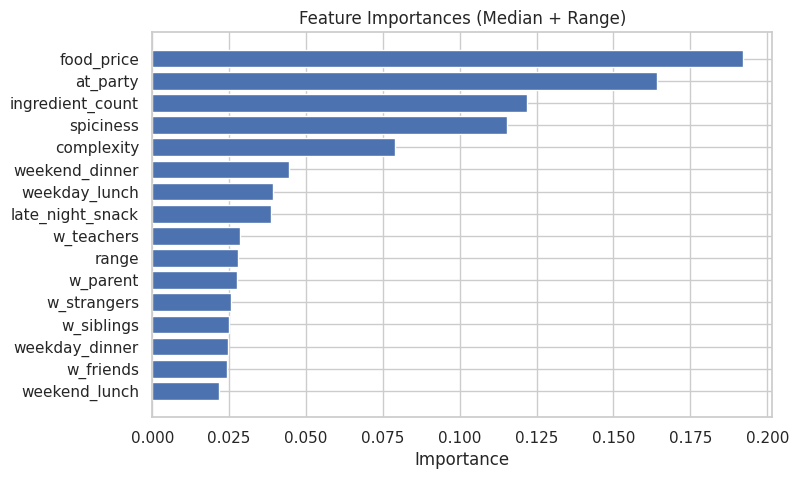


=== Max + Range Approach ===
Test Accuracy: 0.8207
Feature Importances:
  food_price           0.1961
  at_party             0.1720
  ingredient_count     0.1204
  spiciness            0.1107
  complexity           0.0765
  weekend_dinner       0.0437
  weekday_lunch        0.0384
  late_night_snack     0.0374
  range                0.0282
  w_parent             0.0279
  w_teachers           0.0264
  w_friends            0.0261
  weekday_dinner       0.0249
  w_strangers          0.0248
  w_siblings           0.0242
  weekend_lunch        0.0222


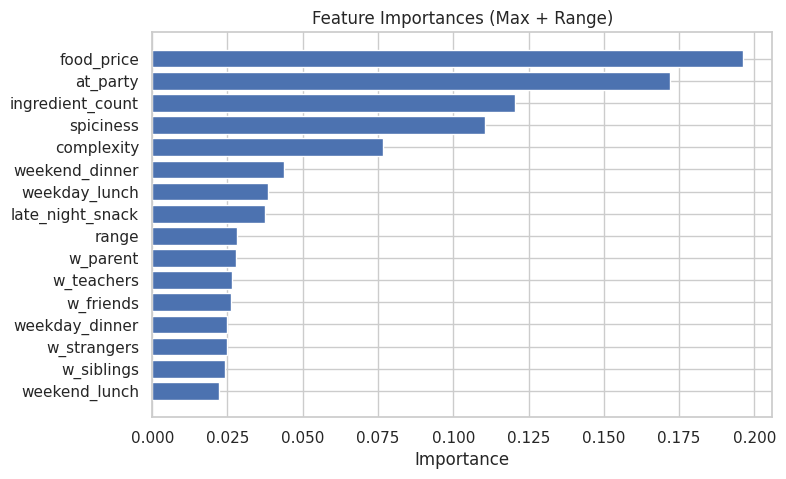

In [ ]:
import re
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# FUNCTION TO EXTRACT RANGE
def extract_range(text):
    """
    Returns the range (max - min) if multiple numbers exist.
    Returns 0 if only one number is found.
    """
    text = str(text)
    matches = re.findall(r'[-+]?\d*\.?\d+', text)  # Extract all numbers
    if matches:
        floats = [float(x) for x in matches]
        if len(floats) > 1:
            return max(floats) - min(floats)  # Compute range
        else:
            return 0  # Single number means no range
    return 0  # No numbers found

# FUNCTION TO TEST DIFFERENT APPROACHES

def test_approach(
    data,
    ingredient_func,
    price_func,
    approach_name,
    feature_names
):
    """
    1. Copy 'data'
    2. Overwrite 'ingredient_count' and 'food_price' with new approach
    3. Compute 'range'
    4. Train a RandomForest
    5. Print feature importances
    """
    # Copy data
    df_copy = data.copy()


    df_copy['ingredient_count'] = df_copy['Q2: How many ingredients would you expect this food item to contain?'].apply(ingredient_func)
    df_copy['food_price'] = df_copy['Q4: How much would you expect to pay for one serving of this food item?'].apply(price_func)
    df_copy['range'] = df_copy['Q4: How much would you expect to pay for one serving of this food item?'].apply(extract_range)  # NEW RANGE COLUMN


    X = np.stack([
        df_copy["Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)"],
        df_copy["ingredient_count"],
        df_copy["Week day lunch"] == 1,
        df_copy["Week day dinner"] == 1,
        df_copy["Weekend lunch"] == 1,
        df_copy["Weekend dinner"] == 1,
        df_copy["At a party"] == 1,
        df_copy["Late night snack"] == 1,
        df_copy["food_price"],
        df_copy["Parents"] == 1,
        df_copy["Siblings"] == 1,
        df_copy["Friends"] == 1,
        df_copy["Teachers"] == 1,
        df_copy["Strangers"] == 1,
        df_copy["spiciness"],
        df_copy["range"]
    ], axis=1)
    t = np.array(df_copy["Label"])


    X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=1)

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=1)
    rf.fit(X_train, t_train)
    acc = rf.score(X_test, t_test)

    # Print
    print(f"\n=== {approach_name} Approach ===")
    print(f"Test Accuracy: {acc:.4f}")


    importances = rf.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]

    print("Feature Importances:")
    for idx in sorted_idx:
        print(f"  {feature_names[idx]:<20} {importances[idx]:.4f}")

    #  plot
    plt.figure(figsize=(8, 5))
    plt.barh([feature_names[i] for i in sorted_idx], importances[sorted_idx])
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importances ({approach_name})")
    plt.xlabel("Importance")
    plt.show()

# UPDATE FEATURE LIST TO INCLUDE RANGE

feature_names = [
    "complexity",
    "ingredient_count",
    "weekday_lunch",
    "weekday_dinner",
    "weekend_lunch",
    "weekend_dinner",
    "at_party",
    "late_night_snack",
    "food_price",
    "w_parent",
    "w_siblings",
    "w_friends",
    "w_teachers",
    "w_strangers",
    "spiciness",
    "range"
]

# INGREDIENT FUNCTIONS
def count_ingredients_min(text):
    matches = re.findall(r'\d+', str(text))
    return int(min(matches)) if matches else 0

def count_ingredients_median(text):
    matches = re.findall(r'\d+', str(text))
    if matches:
        numbers = sorted([int(n) for n in matches])
        return numbers[len(numbers)//2]
    return 0

def count_ingredients_max(text):
    matches = re.findall(r'\d+', str(text))
    return int(max(matches)) if matches else 0

# PRICE FUNCTIONS
def extract_price_min(text):
    matches = re.findall(r'\d*\.?\d+', str(text))
    return float(min(matches)) if matches else 0.0

def extract_price_median(text):
    matches = re.findall(r'\d*\.?\d+', str(text))
    if matches:
        numbers = sorted([float(n) for n in matches])
        return numbers[len(numbers)//2]
    return 0.0

def extract_price_max(text):
    matches = re.findall(r'\d*\.?\d+', str(text))
    return float(max(matches)) if matches else 0.0


# RUN ALL APPROACHES & COMPARE
approaches = {
    "Min + Range":    (count_ingredients_min, extract_price_min),
    "Median + Range": (count_ingredients_median, extract_price_median),
    "Max + Range":    (count_ingredients_max, extract_price_max)
}

# Run each approach and compare results
for approach_name, (ingr_func, price_func) in approaches.items():
    test_approach(
        data,
        ingr_func,
        price_func,
        approach_name,
        feature_names
    )


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer



data_copy = data.copy()
movie_data_copy = movie_data.copy()


data_copy["movie_lower"] = data_copy["Q5: What movie do you think of when thinking of this food item?"].fillna("").str.lower()
movie_data_copy["title_lower"] = movie_data_copy["title"].fillna("").str.lower()


merged_df = data_copy.merge(movie_data_copy, left_on="movie_lower", right_on="title_lower", how="left")


print("First 10 rows of merged dataframe to check for NaNs:")
columns_to_check = ["Q5: What movie do you think of when thinking of this food item?",
                    "Q6: What drink would you pair with this food item?",
                    "genres", "spoken_languages", "production_countries"]
print(merged_df[columns_to_check].head(10).isna().sum())


possible_features = [
    "Q6: What drink would you pair with this food item?",
    "ingredient_count",
    "Q5: What movie do you think of when thinking of this food item?",
    "genres",
    "spoken_languages",
    "production_countries"
]


results = []
from itertools import combinations

for r in range(1, len(possible_features) + 1):
    for feature_combo in combinations(possible_features, r):
        feature_df = merged_df.copy()

        # Convert each column to string and fill NaNs with empty string
        for col in feature_combo:
            if col in feature_df.columns:
                feature_df[col] = feature_df[col].astype(str).fillna("")
            else:
                print(f"Warning: Column '{col}' not found")
                feature_df[col] = ""  # Create empty column if missing

        # Combine the selected features into one text column
        feature_df["combined_text"] = ""
        for col in feature_combo:
            feature_df["combined_text"] += feature_df[col] + " "


        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(feature_df["combined_text"])
        y = feature_df["Label"]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


        nb = MultinomialNB()
        nb.fit(X_train, y_train)
        accuracy = nb.score(X_test, y_test)


        results.append((feature_combo, accuracy))


results.sort(key=lambda x: x[1], reverse=True)
print("\nTop 5 Feature Combinations for Naive Bayes:")
for combo, acc in results[:5]:
    print(f"Features: {combo}, Accuracy: {acc:.4f}")

First 10 rows of merged dataframe to check for NaNs:
Q5: What movie do you think of when thinking of this food item?    1
Q6: What drink would you pair with this food item?                 0
genres                                                             6
spoken_languages                                                   6
production_countries                                               6
dtype: int64

Top 5 Feature Combinations for Naive Bayes:
Features: ('Q6: What drink would you pair with this food item?', 'ingredient_count', 'Q5: What movie do you think of when thinking of this food item?', 'spoken_languages'), Accuracy: 0.8328
Features: ('Q6: What drink would you pair with this food item?', 'ingredient_count', 'Q5: What movie do you think of when thinking of this food item?', 'production_countries'), Accuracy: 0.8207
Features: ('Q6: What drink would you pair with this food item?', 'ingredient_count', 'Q5: What movie do you think of when thinking of this food item?'), Accurac

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


data["Q5: What movie do you think of when thinking of this food item?"] = data["Q5: What movie do you think of when thinking of this food item?"].fillna("")
data["Q6: What drink would you pair with this food item?"] = data["Q6: What drink would you pair with this food item?"].fillna("")


combined_text = data["Q5: What movie do you think of when thinking of this food item?"] + " " + data["Q6: What drink would you pair with this food item?"]


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(combined_text)

y = data["Label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


nb = MultinomialNB()
nb.fit(X_train, y_train)


accuracy = nb.score(X_test, y_test)


accuracy

0.8024316109422492

In [ ]:
print()

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Make copy of original data
df_nb = data.copy()

# Standardize
df_nb.columns = df_nb.columns.str.strip().str.lower()
movie_data.columns = movie_data.columns.str.strip().str.lower()


if "ingredient_count" not in df_nb.columns:
    print("'ingredient_count' not found in df_nb. Using a placeholder = 0.")
    df_nb["ingredient_count"] = 0  # Placeholder if missing
else:
    print("'ingredient_count' column found.")

# 4) Create columns for merging
df_nb["movie_lower"] = df_nb["q5: what movie do you think of when thinking of this food item?"].fillna("").str.lower()
movie_data["title_lower"] = movie_data["title"].fillna("").str.lower()

# Merge movie info
df_nb = df_nb.merge(movie_data, left_on="movie_lower", right_on="title_lower", how="left")

# Construct the new text feature by concatenating:
#    - Drink
#    - Ingredient count
#    - Movie
#    - movie info: genres, spoken_languages, production_countries
df_nb["naive_bayes_text"] = (
    df_nb["q6: what drink would you pair with this food item?"].fillna("") + " " +
    df_nb["ingredient_count"].astype(str) + " " +
    df_nb["q5: what movie do you think of when thinking of this food item?"].fillna("") + " " +
    df_nb["genres"].fillna("") + " " +
    df_nb["spoken_languages"].fillna("") + " " +
    df_nb["production_countries"].fillna("")
)

# Prepare features (X) and labels (y)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_nb["naive_bayes_text"])

# Ensure "label" exists. rename if it's something else
if "label" not in df_nb.columns:
    print("⚠️ 'label' not found in df_nb. Using a placeholder label = 'Unknown'.")
    df_nb["label"] = "Unknown"

y = df_nb["label"]  # e.g., Pizza, Sushi, Shawarma

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

#  accuracy
accuracy = nb.score(X_test, y_test)
print(f"Naive Bayes Accuracy with Drink, Ingredients, Movie + Extra TMDB Info: {accuracy:.4f}")


✅ 'ingredient_count' column found.
Naive Bayes Accuracy with Drink, Ingredients, Movie + Extra TMDB Info: 0.8055


In [ ]:
from itertools import combinations
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Possible feature columns to combine
possible_features = [
    "q6: what drink would you pair with this food item?",  # Drink
    "ingredient_count",
    "q5: what movie do you think of when thinking of this food item?",  # Movie
    "genres",
    "spoken_languages",
    "production_countries"
]

results = []

# Try all combinations of feature columns
for r in range(1, len(possible_features) + 1):
    for feature_combo in combinations(possible_features, r):
        # Build the text feature
        # Convert non-string columns (like ingredient_count) to str
        # and fill NaNs with "" to avoid errors
        feature_text = df_nb[list(feature_combo)].astype(str).apply(lambda row: " ".join(row.fillna("")), axis=1)

        # Vectorize
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(feature_text)

        y = df_nb["label"]  # Our food category (Pizza / Sushi / Shawarma)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

        # Train Naive Bayes
        nb = MultinomialNB()
        nb.fit(X_train, y_train)

        # Evaluate
        accuracy = nb.score(X_test, y_test)

        # Store results
        results.append((feature_combo, accuracy))

# Sort by accuracy, take top 5
results.sort(key=lambda x: x[1], reverse=True)
top_5 = results[:5]

# Print
print("Top 5 Feature Combinations (Naive Bayes):")
for combo, acc in top_5:
    print(f"Features: {combo}, Accuracy: {acc:.4f}")




Top 5 Feature Combinations (Naive Bayes):
Features: ('q6: what drink would you pair with this food item?', 'ingredient_count', 'q5: what movie do you think of when thinking of this food item?', 'spoken_languages'), Accuracy: 0.8237
Features: ('q6: what drink would you pair with this food item?', 'ingredient_count', 'q5: what movie do you think of when thinking of this food item?', 'spoken_languages', 'production_countries'), Accuracy: 0.8176
Features: ('q6: what drink would you pair with this food item?', 'ingredient_count', 'q5: what movie do you think of when thinking of this food item?'), Accuracy: 0.8146
Features: ('q6: what drink would you pair with this food item?', 'q5: what movie do you think of when thinking of this food item?', 'spoken_languages'), Accuracy: 0.8146
Features: ('q6: what drink would you pair with this food item?', 'q5: what movie do you think of when thinking of this food item?', 'production_countries'), Accuracy: 0.8146


In [ ]:
# Convert non-string columns to string and fill NaNs
feature_text_df = df_nb[list(possible_features)].astype(str).replace("nan", "").fillna("")

# Join the selected feature columns into one combined text feature
feature_text_df["combined_features"] = feature_text_df.apply(lambda row: " ".join(row).strip().replace("  ", " "), axis=1)


# Print the first 10 rows
feature_text_df.head(10)



,q6: what drink would you pair with this food item?,ingredient_count,q5: what movie do you think of when thinking of this food item?,genres,spoken_languages,production_countries,combined_features
0,Coke,6,Cloudy with a Chance of Meatballs,"Animation, Comedy, Family",English,United States of America,Coke 6 Cloudy with a Chance of Meatballs Anim...
1,Coke,2,All sort of american young boy movies,,,,Coke 2 All sort of american young boy movies
2,cola,5,action movie,,,,cola 5 action movie
3,Soda,7,Mamma Mia,,,,Soda 7 Mamma Mia
4,Soda,3,Cloudy with a chance of meatballs,"Animation, Comedy, Family",English,United States of America,Soda 3 Cloudy with a chance of meatballs Anima...
5,Soda,6,,,,,Soda 6
6,coke,4,dragon,,,,coke 4 dragon
7,coke,5,Rick and Morty,,,,coke 5 Rick and Morty
8,Coca Cola,5,Home Alone,"Comedy, Family",English,United States of America,"Coca Cola 5 Home Alone Comedy, Family English ..."
9,Coke,9,Cloudy with a chance of meatballs,"Animation, Comedy, Family",English,United States of America,Coke 9 Cloudy with a chance of meatballs Anima...


In [ ]:

#print(df_nb.columns)
print(data.columns)
print(movie_data.columns)

Index(['id',
       'Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)',
       'Q2: How many ingredients would you expect this food item to contain?',
       'Q3: In what setting would you expect this food to be served? Please check all that apply',
       'Q4: How much would you expect to pay for one serving of this food item?',
       'Q5: What movie do you think of when thinking of this food item?',
       'Q6: What drink would you pair with this food item?',
       'Q7: When you think about this food item, who does it remind you of?',
       'Q8: How much hot sauce would you add to this food item?', 'Label',
       'ingredient_count', 'Week day lunch', 'Week day dinner',
       'Weekend lunch', 'Weekend dinner', 'At a party', 'Late night snack',
       'food_price', 'Parents', 'Siblings', 'Friends', 'Teachers', 'Strangers',
       'spiciness'],
      dtype='object')
Index(['title', 'genres', 'keywords', 'original_

In [ ]:
import difflib

# Load data
df_food = data.copy()
movie_data = pd.read_csv("tmdb_cleaned.csv")

# Preprocess movie titles
df_food["movie_lower"] = df_food["Q5: What movie do you think of when thinking of this food item?"].fillna("").str.lower().str.strip()
movie_data["title_lower"] = movie_data["title"].fillna("").str.lower().str.strip()

# Fuzzy matching function
def find_best_match(movie, movies):
    matches = difflib.get_close_matches(movie, movies, n=1, cutoff=0.7)
    return matches[0] if matches else None

# Match movies
movies_list = movie_data["title_lower"].tolist()
df_food["matched_movie"] = df_food["movie_lower"].apply(lambda x: find_best_match(x, movies_list))

# Merge matched movie data
df_food = df_food.merge(movie_data, left_on="matched_movie", right_on="title_lower", how="left")

# Create feature text
df_food["naive_bayes_text"] = (
    df_food["Q6: What drink would you pair with this food item?"].fillna("") + " " +
    df_food["ingredient_count"].astype(str) + " " +
    df_food["matched_movie"].fillna("") + " " +
    df_food["genres"].fillna("") + " "  +
    df_food["spoken_languages"].fillna("")
)

# Vectorize text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_food["naive_bayes_text"])

# Train Naive Bayes
y = df_food["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

nb = MultinomialNB()
nb.fit(X_train, y_train)
accuracy = nb.score(X_test, y_test)

print(f"Naive Bayes Accuracy: {accuracy:.4f}")


Naive Bayes Accuracy: 0.7568


In [ ]:
import itertools

# List of features to combine
possible_features = [
    "Q6: What drink would you pair with this food item?",
    "ingredient_count",
    "matched_movie",
    "genres",  # Movie genres
    "spoken_languages",  # Languages of the movie
    "production_countries"  # Where the movie was made
]

results = []

# Try all combinations of feature columns (1 to all)
for r in range(1, len(possible_features) + 1):
    for feature_combo in itertools.combinations(possible_features, r):
        # Create feature text (convert all selected columns to string and join)
        feature_text = df_food[list(feature_combo)].astype(str).fillna("").apply(lambda row: " ".join(row), axis=1)

        # Vectorize text
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(feature_text)

        y = df_food["Label"]  # Food category

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

        # Train Naive Bayes
        nb = MultinomialNB()
        nb.fit(X_train, y_train)

        # Evaluate
        accuracy = nb.score(X_test, y_test)

        # Store results
        results.append((feature_combo, accuracy))

# Sort by accuracy then take top 5
results.sort(key=lambda x: x[1], reverse=True)
top_5 = results[:5]

# Print
print("\nTop 5 Feature Combinations for Naive Bayes\n")
for combo, acc in top_5:
    print(f"Features: {combo}, Accuracy: {acc:.4f}")


🔥 Top 5 Feature Combinations for Naive Bayes 🔥

Features: ('Q6: What drink would you pair with this food item?', 'ingredient_count', 'matched_movie'), Accuracy: 0.7660
Features: ('Q6: What drink would you pair with this food item?', 'ingredient_count', 'matched_movie', 'genres'), Accuracy: 0.7599
Features: ('Q6: What drink would you pair with this food item?', 'matched_movie'), Accuracy: 0.7568
Features: ('Q6: What drink would you pair with this food item?', 'matched_movie', 'genres'), Accuracy: 0.7538
Features: ('Q6: What drink would you pair with this food item?', 'ingredient_count', 'matched_movie', 'spoken_languages'), Accuracy: 0.7538


In [ ]:
# Display the first 20 rows of the copied food database after fuzzy matching and merging

# Load data
df_food = data.copy()
movie_data = pd.read_csv("tmdb_cleaned.csv")

# Preprocess movie titles
df_food["movie_lower"] = df_food["Q5: What movie do you think of when thinking of this food item?"].fillna("").str.lower().str.strip()
movie_data["title_lower"] = movie_data["title"].fillna("").str.lower().str.strip()

# Fuzzy matching function (fast)
def find_best_match(movie, movies):
    matches = difflib.get_close_matches(movie, movies, n=1, cutoff=0.7)
    return matches[0] if matches else None

# Match movies
movies_list = movie_data["title_lower"].tolist()
df_food["matched_movie"] = df_food["movie_lower"].apply(lambda x: find_best_match(x, movies_list))

# Merge matched movie data
df_food = df_food.merge(movie_data, left_on="matched_movie", right_on="title_lower", how="left")

# Display the first 20 rows
df_food.head(20)


,id,"Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",Q2: How many ingredients would you expect this food item to contain?,Q3: In what setting would you expect this food to be served? Please check all that apply,Q4: How much would you expect to pay for one serving of this food item?,Q5: What movie do you think of when thinking of this food item?,Q6: What drink would you pair with this food item?,"Q7: When you think about this food item, who does it remind you of?",Q8: How much hot sauce would you add to this food item?,Label,...,spiciness,movie_lower,matched_movie,title,genres,keywords,original_language,production_countries,spoken_languages,title_lower
0,716549,3,6,"Week day lunch,At a party,Late night snack",5,Cloudy with a Chance of Meatballs,Coke,Friends,A little (mild),Pizza,...,1,cloudy with a chance of meatballs,cloudy with a chance of meatballs,Cloudy with a Chance of Meatballs,"Animation, Comedy, Family","weather, food, science",en,United States of America,English,cloudy with a chance of meatballs
1,715742,4,"bread, meet","Week day lunch,At a party,Late night snack",5$ for a large piece,All sort of american young boy movies,Coke,"Friends,Teachers,Strangers",NaN,Pizza,...,0,all sort of american young boy movies,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,727333,3,5,"Week day lunch,Week day dinner,Weekend lunch,W...",10dollar,action movie,cola,Friends,A moderate amount (medium),Pizza,...,2,action movie,date movie,Date Movie,Comedy,"date, diary, parents-in-law, bridegroom, wedding",en,"Switzerland, United States of America",English,date movie
3,606874,4,6-7,"Week day lunch,Week day dinner,Weekend lunch,W...",$3,Mamma Mia,Soda,"Siblings,Friends,Teachers",I will have some of this food item with my hot...,Pizza,...,4,mamma mia,mamma mia!,Mamma Mia!,"Comedy, Romance","single parent, greece, musical, daughter, sing...",en,"Germany, United Kingdom, United States of America",English,mamma mia!
4,505318,2,3 or more,"Week day lunch,Week day dinner,Weekend lunch,W...",$5,Cloudy with a chance of meatballs,Soda,"Siblings,Friends",A little (mild),Pizza,...,1,cloudy with a chance of meatballs,cloudy with a chance of meatballs,Cloudy with a Chance of Meatballs,"Animation, Comedy, Family","weather, food, science",en,United States of America,English,cloudy with a chance of meatballs
5,605771,4,6,"Week day lunch,Week day dinner,Weekend lunch,W...",$15,,Soda,"Siblings,Friends",NaN,Pizza,...,0,,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,606929,3,about 3 or 4,Week day lunch,1,dragon,coke,Friends,NaN,Pizza,...,0,dragon,eragon,Eragon,"Fantasy, Action, Adventure, Family","based on novel, mythical creature, dragon, fan...",en,"United Kingdom, United States of America, Hungary",English,eragon
7,609789,4,4-5,"Week day lunch,Week day dinner,Weekend lunch,W...",20 dollar,Rick and Morty,coke,Friends,A moderate amount (medium),Pizza,...,2,rick and morty,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,644623,3,5,"Week day dinner,Weekend lunch,Weekend dinner,A...",3 dollars,Home Alone,Coca Cola,NaN,NaN,Pizza,...,0,home alone,home alone,Home Alone,"Comedy, Family","holiday, burglar, home invasion, mischief, boo...",en,United States of America,English,home alone
9,626792,3,9,"Week day lunch,Week day dinner,Weekend lunch,W...",4,Cloudy with a chance of meatballs,Coke,"Parents,Siblings,Friends",A lot (hot),Pizza,...,3,cloudy with a chance of meatballs,cloudy with a chance of meatballs,Cloudy with a Chance of Meatballs,"Animation, Comedy, Family","weather, food, science",en,United States of America,English,cloudy with a chance of meatballs


<ipython-input-75-a10aa5e10651>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-75-a10aa5e10651>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-75-a10aa5e10651>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


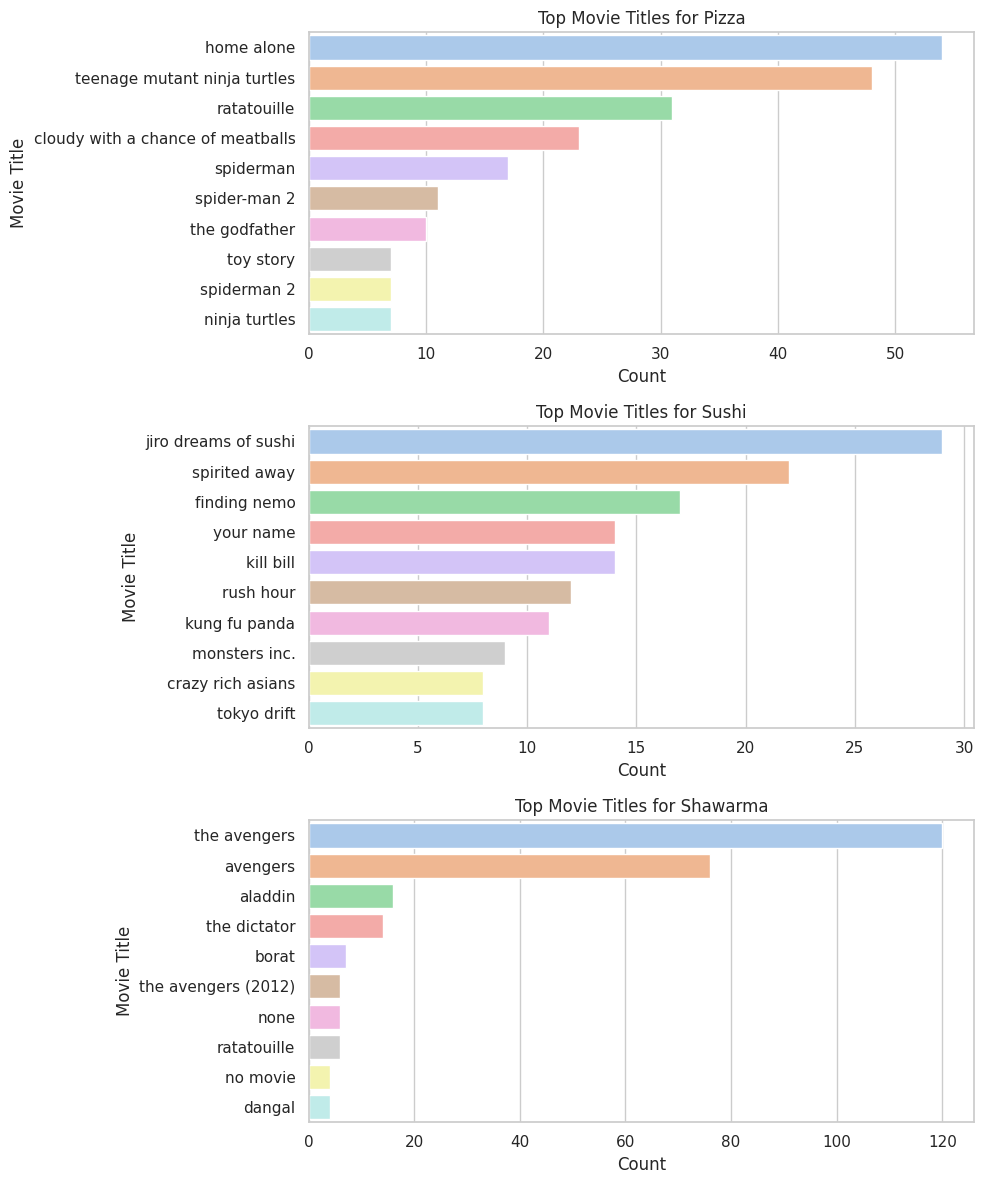

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prep: lowercase, strip, and drop blank entries
df_titles = df_food[["Label", "Q5: What movie do you think of when thinking of this food item?"]].copy()
df_titles["movie_title"] = (
    df_titles["Q5: What movie do you think of when thinking of this food item?"]
    .astype(str)
    .str.strip()
    .str.lower()
)

# Filter out empty titles
df_titles = df_titles[df_titles["movie_title"] != ""]

# Set food labels of interest
food_labels = ["Pizza", "Sushi", "Shawarma"]

# Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, label in enumerate(food_labels):
    top_titles = (
        df_titles[df_titles["Label"] == label]["movie_title"]
        .value_counts()
        .head(10)
    )

    sns.barplot(
        x=top_titles.values,
        y=top_titles.index,
        ax=axes[i],
        palette="pastel"
    )
    axes[i].set_title(f"Top Movie Titles for {label}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Movie Title")

plt.tight_layout()
plt.show()


<ipython-input-76-c1ffe689e8c5>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-76-c1ffe689e8c5>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-76-c1ffe689e8c5>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


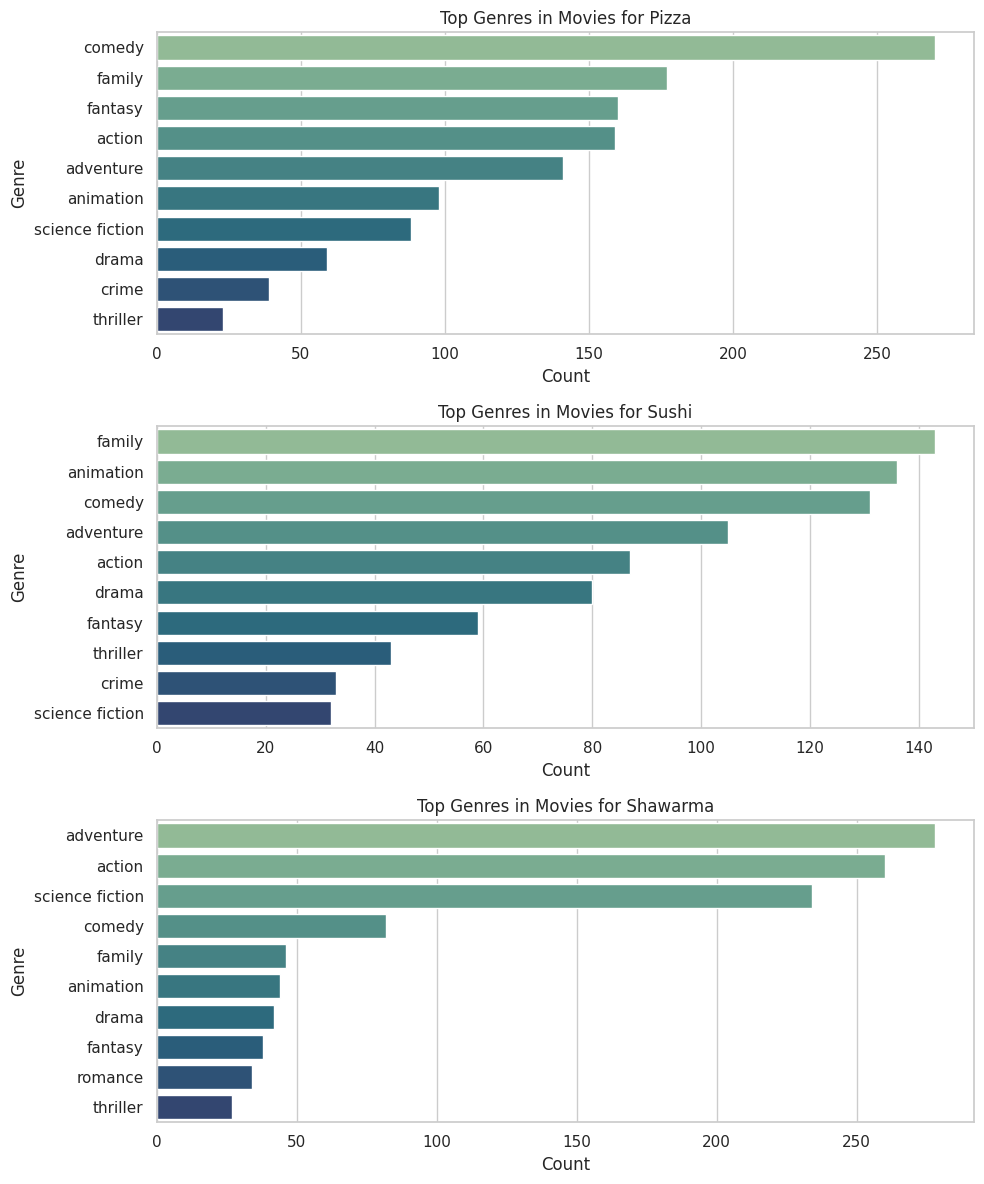

In [ ]:
# Step 1: Clean and explode the 'genres' column
df_genres = df_food[["Label", "genres"]].dropna().copy()
df_genres["genres"] = df_genres["genres"].str.lower().str.split(",")

# Remove leading/trailing whitespace
df_genres = df_genres.explode("genres")
df_genres["genres"] = df_genres["genres"].str.strip()

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
food_labels = ["Pizza", "Sushi", "Shawarma"]

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, label in enumerate(food_labels):
    genre_counts = (
        df_genres[df_genres["Label"] == label]["genres"]
        .value_counts()
        .head(10)
    )

    sns.barplot(
        x=genre_counts.values,
        y=genre_counts.index,
        ax=axes[i],
        palette="crest"
    )
    axes[i].set_title(f"Top Genres in Movies for {label}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Genre")

plt.tight_layout()
plt.show()


<ipython-input-77-5230d852f024>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-77-5230d852f024>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-77-5230d852f024>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


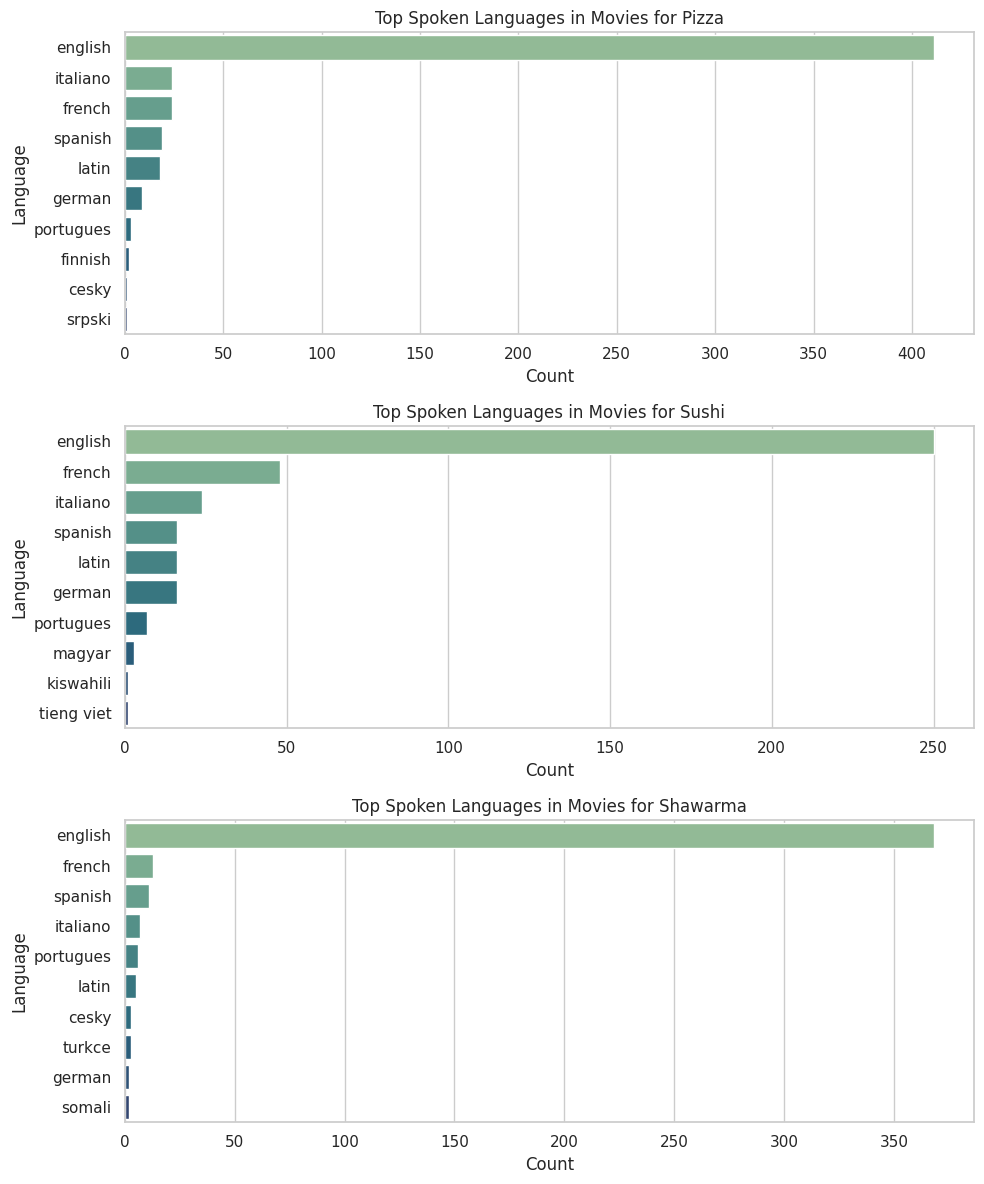

In [ ]:
# Step 1: Clean and explode the 'spoken_languages' column
df_langs = df_food[["Label", "spoken_languages"]].dropna().copy()
df_langs["spoken_languages"] = df_langs["spoken_languages"].str.lower().str.split(",")

# Explode and clean entries
df_langs = df_langs.explode("spoken_languages")
df_langs["spoken_languages"] = df_langs["spoken_languages"].str.strip()

# Remove blank language entries
df_langs = df_langs[df_langs["spoken_languages"] != ""]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
food_labels = ["Pizza", "Sushi", "Shawarma"]

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, label in enumerate(food_labels):
    lang_counts = (
        df_langs[df_langs["Label"] == label]["spoken_languages"]
        .value_counts()
        .head(10)
    )

    sns.barplot(
        x=lang_counts.values,
        y=lang_counts.index,
        ax=axes[i],
        palette="crest"
    )
    axes[i].set_title(f"Top Spoken Languages in Movies for {label}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Language")

plt.tight_layout()
plt.show()


<ipython-input-78-772aa5f5be6f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-78-772aa5f5be6f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-78-772aa5f5be6f>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


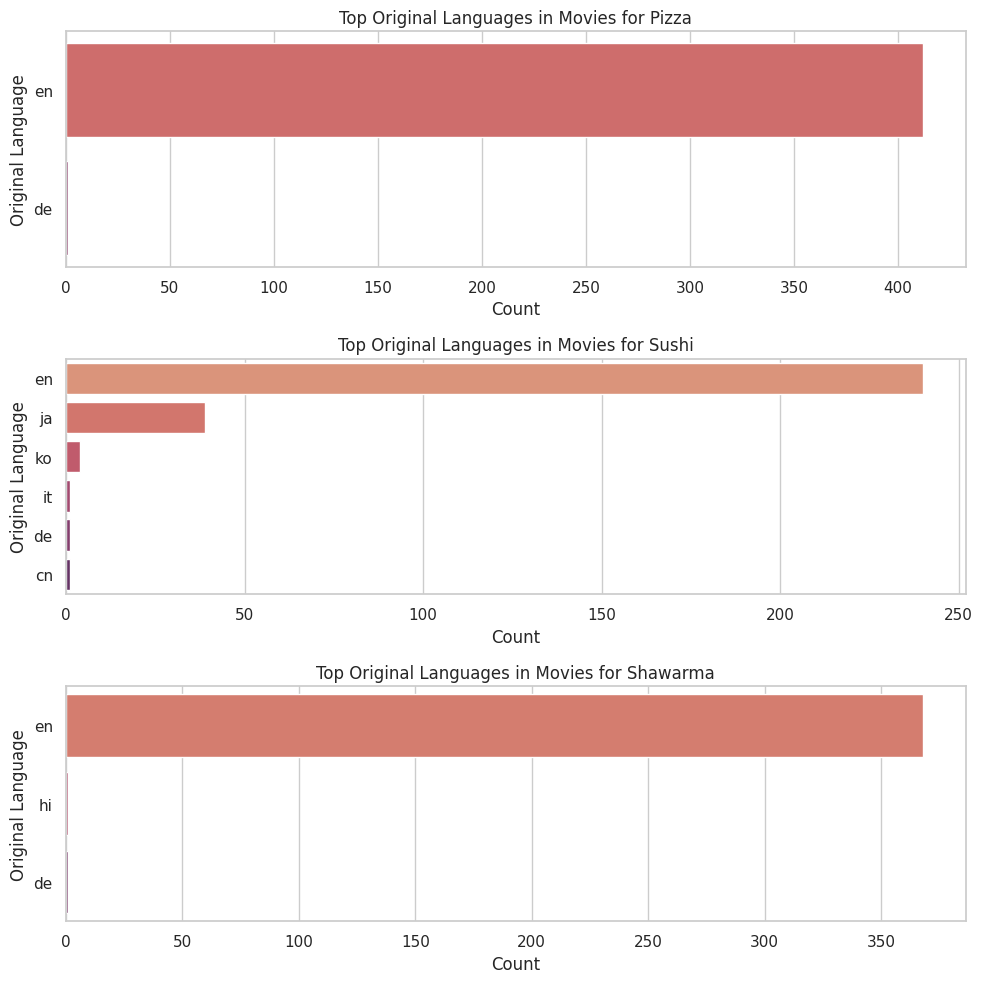

In [ ]:
#Clean and prepare the 'original_language' column
df_orig_lang = df_food[["Label", "original_language"]].dropna().copy()
df_orig_lang["original_language"] = df_orig_lang["original_language"].str.lower().str.strip()

# Remove blank
df_orig_lang = df_orig_lang[df_orig_lang["original_language"] != ""]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
food_labels = ["Pizza", "Sushi", "Shawarma"]

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

for i, label in enumerate(food_labels):
    lang_counts = (
        df_orig_lang[df_orig_lang["Label"] == label]["original_language"]
        .value_counts()
        .head(10)
    )

    sns.barplot(
        x=lang_counts.values,
        y=lang_counts.index,
        ax=axes[i],
        palette="flare"
    )
    axes[i].set_title(f"Top Original Languages in Movies for {label}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Original Language")

plt.tight_layout()
plt.show()


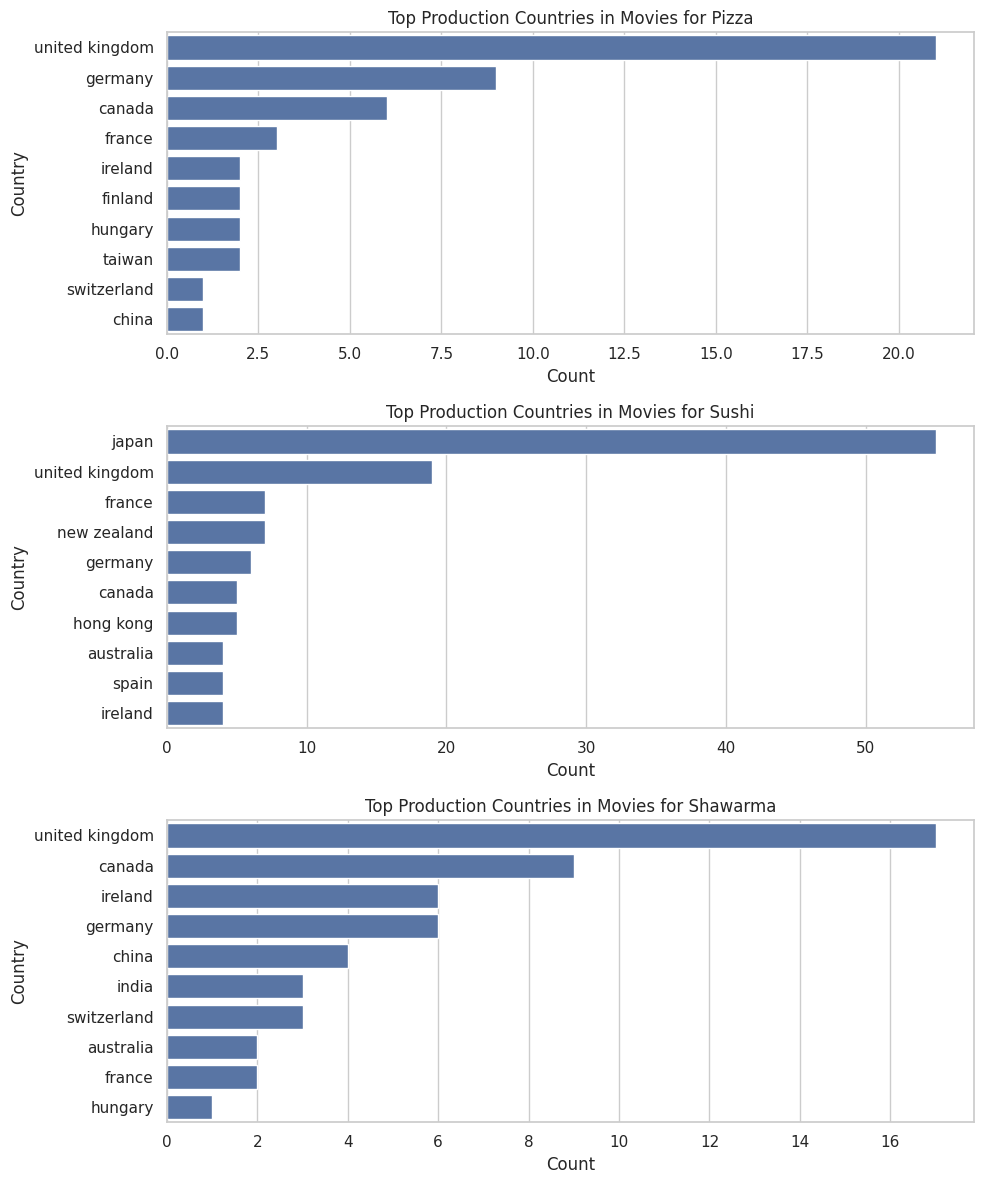

In [ ]:
# Step 1: Clean and explode the 'production_countries' column
df_countries = df_food[["Label", "production_countries"]].dropna().copy()
df_countries["production_countries"] = df_countries["production_countries"].str.lower().str.split(",")

# Explode and strip whitespace
df_countries = df_countries.explode("production_countries")
df_countries["production_countries"] = df_countries["production_countries"].str.strip()

#  Remove empty entries
df_countries = df_countries[df_countries["production_countries"] != ""]
df_countries = df_countries[df_countries["production_countries"] != "united states of america"]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
food_labels = ["Pizza", "Sushi", "Shawarma"]

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, label in enumerate(food_labels):
    country_counts = (
        df_countries[df_countries["Label"] == label]["production_countries"]
        .value_counts()
        .head(10)
    )

    sns.barplot(
        x=country_counts.values,
        y=country_counts.index,
        ax=axes[i]
    )
    axes[i].set_title(f"Top Production Countries in Movies for {label}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Country")

plt.tight_layout()
plt.show()


<ipython-input-80-2bd2dc29c172>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-80-2bd2dc29c172>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-80-2bd2dc29c172>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


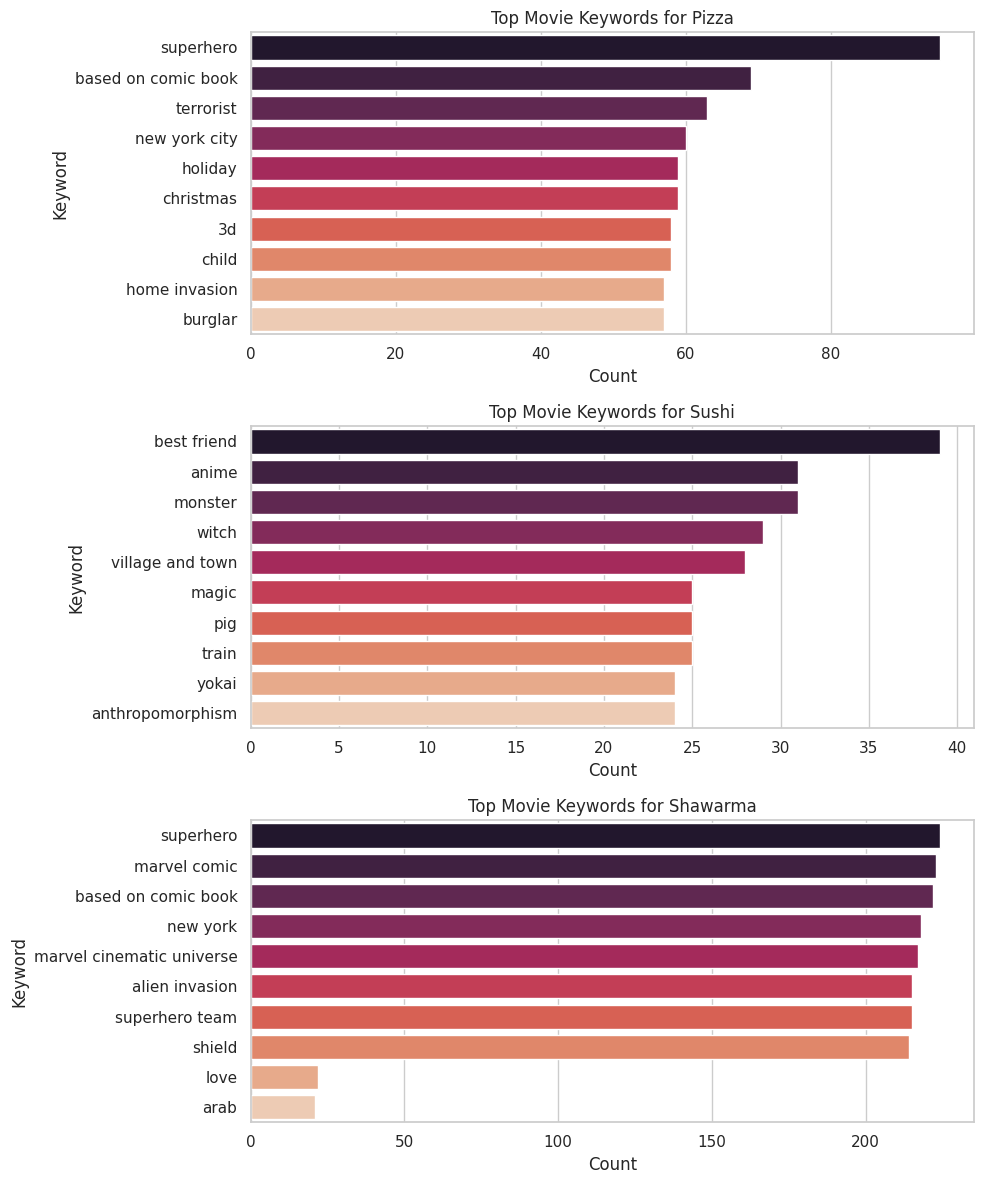

In [ ]:
# Step 1: Clean and explode the 'keywords' column
df_keywords = df_food[["Label", "keywords"]].dropna().copy()
df_keywords["keywords"] = df_keywords["keywords"].str.lower().str.split(",")

# Explode and strip whitespace
df_keywords = df_keywords.explode("keywords")
df_keywords["keywords"] = df_keywords["keywords"].str.strip()

# Remove empty entries
df_keywords = df_keywords[df_keywords["keywords"] != ""]
df_keywords = df_keywords[df_keywords["keywords"] != "aftercreditsstinger"]
df_keywords = df_keywords[df_keywords["keywords"] != "duringcreditsstinger"]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
food_labels = ["Pizza", "Sushi", "Shawarma"]

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

for i, label in enumerate(food_labels):
    keyword_counts = (
        df_keywords[df_keywords["Label"] == label]["keywords"]
        .value_counts()
        .head(10)
    )

    sns.barplot(
        x=keyword_counts.values,
        y=keyword_counts.index,
        ax=axes[i],
        palette="rocket"
    )
    axes[i].set_title(f"Top Movie Keywords for {label}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Keyword")

plt.tight_layout()
plt.show()


In [ ]:
# Ensure all necessary text columns exist in df_food
text_columns = [
    "Q6: What drink would you pair with this food item?",
    "ingredient_count",
    "Q5: What movie do you think of when thinking of this food item?",
    "genres",
    "spoken_languages",
    "production_countries"
]

# Check if any of these columns are missing
missing_cols = [col for col in text_columns if col not in df_food.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}. Check your dataset!")

# Create "naive_bayes_text" by joining all selected text fields
df_food["naive_bayes_text"] = df_food[text_columns].astype(str).fillna("").apply(lambda row: " ".join(row), axis=1)

# Verify the first few rows
print(df_food[["naive_bayes_text"]].head(10).to_string(index=False))



                                                                                           naive_bayes_text
       Coke  6 Cloudy with a Chance of Meatballs Animation, Comedy, Family English United States of America
                                                   Coke 2 All sort of american young boy movies nan nan nan
                                   cola 5 action movie Comedy English Switzerland, United States of America
                 Soda 7 Mamma Mia Comedy, Romance English Germany, United Kingdom, United States of America
        Soda 3 Cloudy with a chance of meatballs Animation, Comedy, Family English United States of America
                                                                                        Soda 6  nan nan nan
coke  4 dragon Fantasy, Action, Adventure, Family English United Kingdom, United States of America, Hungary
                                                                          coke 5 Rick and Morty nan nan nan
                            

In [ ]:
from scipy.sparse import hstack, csr_matrix
from sklearn.linear_model import LogisticRegression

# --- Step 1: Numeric Engineered Features ---
engineered_cols = [
    "Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",
    "Week day lunch",
    "Week day dinner",
    "Weekend lunch",
    "Weekend dinner",
    "At a party",
    "Late night snack",
    "food_price",  # Still used as numeric
    "spiciness"
]

X_engineered = df_food[engineered_cols].copy()

# Convert booleans to int
bool_cols = ["Week day lunch", "Week day dinner", "Weekend lunch", "Weekend dinner", "At a party", "Late night snack"]
for col in bool_cols:
    X_engineered[col] = X_engineered[col].astype(int)

# Convert to numeric array
X_engineered_array = X_engineered.to_numpy()
X_engineered_sparse = csr_matrix(X_engineered_array)

# --- Step 2: Textify `ingredient_count` ---
df_food["ingredient_count"] = df_food["ingredient_count"].astype(str)
vectorizer_ingredient = CountVectorizer()
X_ingredient = vectorizer_ingredient.fit_transform(df_food["ingredient_count"])

# --- Step 3: Textify `food_price` as well ---
df_food["food_price_str"] = df_food["food_price"].astype(str)
vectorizer_price = CountVectorizer()
X_price = vectorizer_price.fit_transform(df_food["food_price_str"])

# --- Step 4: Main Bag-of-Words (BOW) ---
vectorizer_text = CountVectorizer()
X_bow = vectorizer_text.fit_transform(df_food["naive_bayes_text"])

# --- Step 5: Combine All ---
X_combined = hstack([X_engineered_sparse, X_ingredient, X_price, X_bow])

# Labels
y = df_food["Label"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=1)

# Model
clf = LogisticRegression(max_iter=1000, random_state=42, C=0.05)
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.8837
Test Accuracy: 0.8875


In [ ]:
# --- Step 1: Numeric Engineered Features ---
engineered_cols = [
    "Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",
    "Week day lunch",
    "Week day dinner",
    "Weekend lunch",
    "Weekend dinner",
    "At a party",
    "Late night snack",
    "food_price",  # Still used as numeric
    "spiciness"
]

X_engineered = df_food[engineered_cols].copy()

# Convert booleans to int
bool_cols = ["Week day lunch", "Week day dinner", "Weekend lunch", "Weekend dinner", "At a party", "Late night snack"]
for col in bool_cols:
    X_engineered[col] = X_engineered[col].astype(int)

# Convert to numeric array
X_engineered_array = X_engineered.to_numpy()
X_engineered_sparse = csr_matrix(X_engineered_array)

# --- Step 2: Textify `ingredient_count` ---
df_food["ingredient_count"] = df_food["ingredient_count"].astype(str)
vectorizer_ingredient = CountVectorizer()
X_ingredient = vectorizer_ingredient.fit_transform(df_food["ingredient_count"])

# --- Step 3: Textify `food_price` as well ---
df_food["food_price_str"] = df_food["food_price"].astype(str)
vectorizer_price = CountVectorizer()
X_price = vectorizer_price.fit_transform(df_food["food_price_str"])

# --- Step 4: Main Bag-of-Words (BOW) ---
vectorizer_text = CountVectorizer()
X_bow = vectorizer_text.fit_transform(df_food["naive_bayes_text"])

# --- Step 5: Combine All ---
X_combined = hstack([X_engineered_sparse, X_ingredient, X_price, X_bow])

# Labels
y = df_food["Label"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=1)

# Model
clf = LogisticRegression(max_iter=1000, random_state=1, C=0.05)
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.8837
Test Accuracy: 0.8875


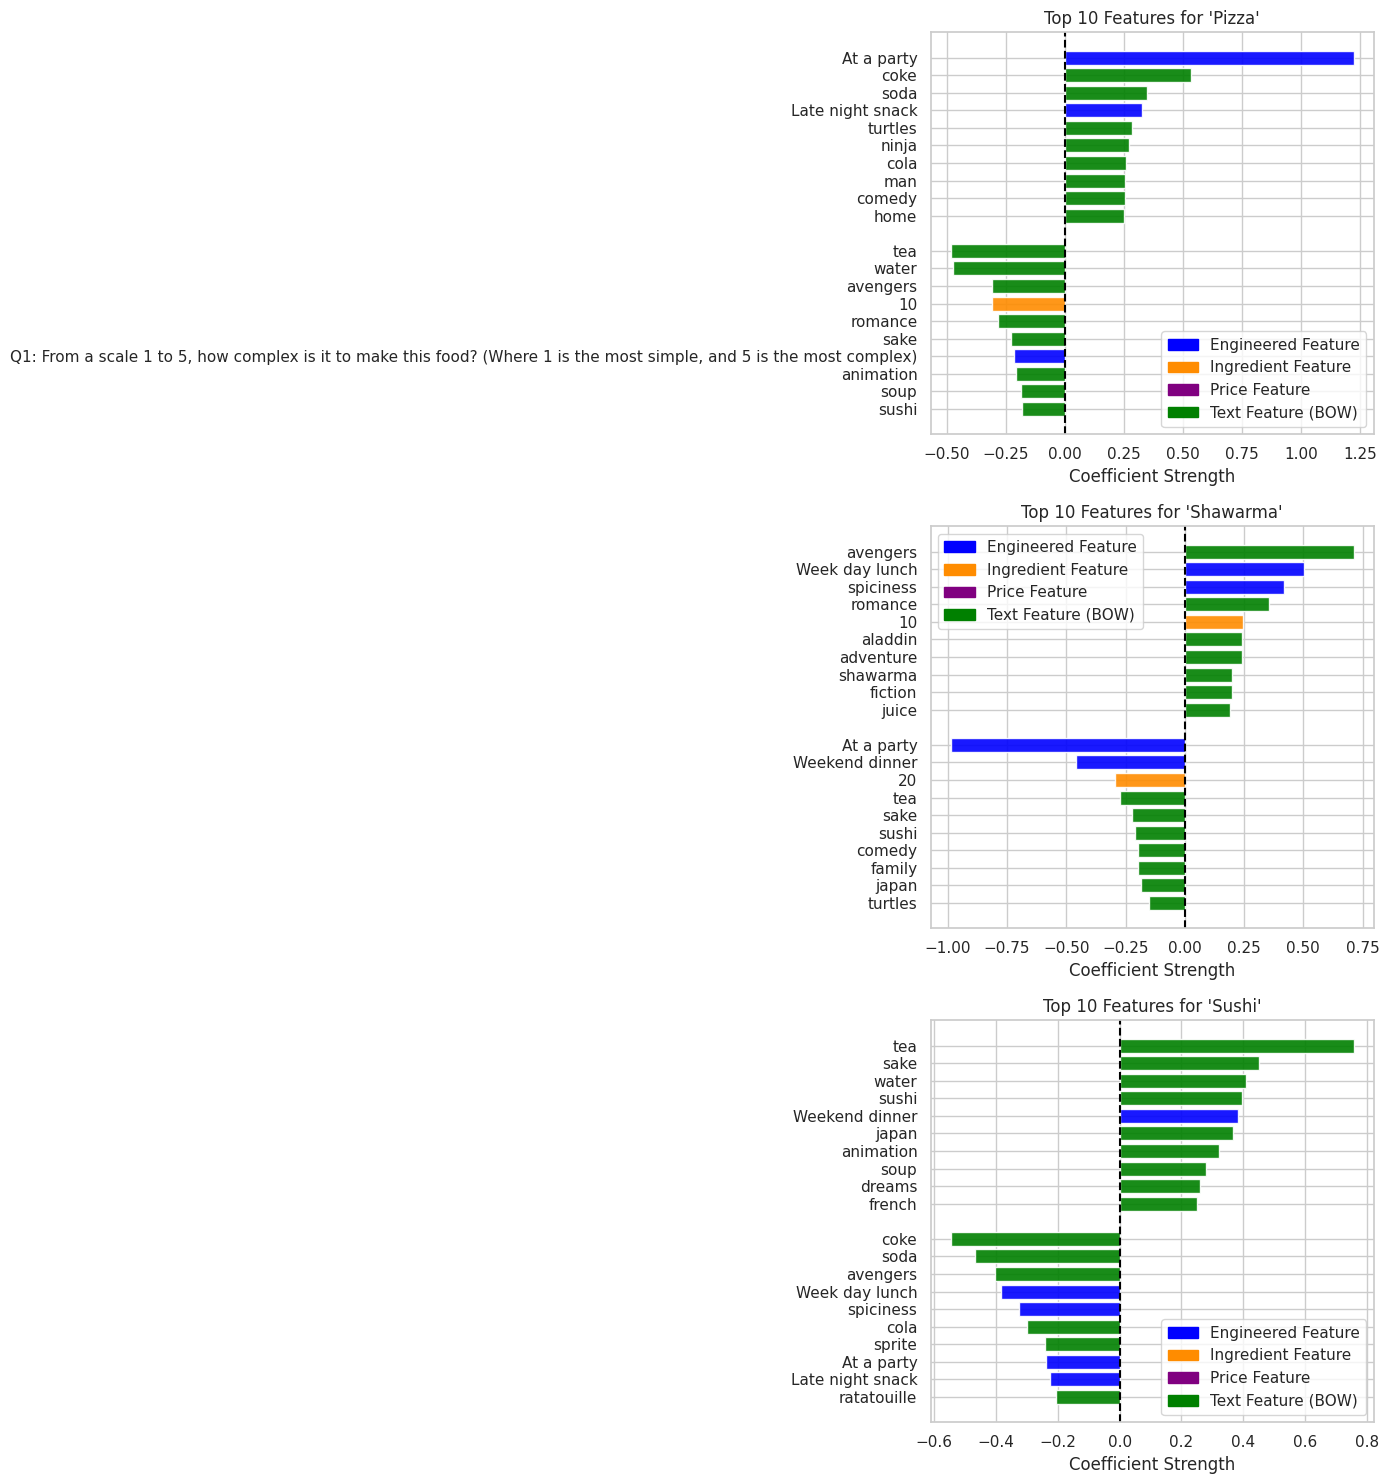

In [ ]:
import matplotlib.patches as mpatches

# Define sets for each category
engineered_set = set(engineered_cols)
ingredient_set = set(vectorizer_ingredient.get_feature_names_out())
price_set = set(vectorizer_price.get_feature_names_out())  # <--- NEW
text_set = set(vectorizer_text.get_feature_names_out())

# Define 4 colors (engineered, ingredient, price, text)
COLOR_MAP = {
    "engineered": "blue",
    "ingredient": "darkorange",
    "price": "purple",
    "text": "green"
}

def get_feature_category(feat_name):
    """Return the feature category (engineered, ingredient, price, text)."""
    if feat_name in engineered_set:
        return "engineered"
    elif feat_name in ingredient_set:
        return "ingredient"
    elif feat_name in price_set:
        return "price"
    elif feat_name in text_set:
        return "text"
    return "unknown"

def pick_color(feature_name):
    """Return a color based on feature category."""
    category = get_feature_category(feature_name)
    return COLOR_MAP.get(category, "gray")

# Rebuild all feature names to match X_combined
feature_names_all = np.concatenate([
    engineered_cols,
    vectorizer_ingredient.get_feature_names_out(),
    vectorizer_price.get_feature_names_out(),
    vectorizer_text.get_feature_names_out()
])

class_labels = clf.classes_
top_n = 10

fig, axes = plt.subplots(nrows=len(class_labels), figsize=(14, 5 * len(class_labels)))

for idx, class_label in enumerate(class_labels):
    coef_for_class = clf.coef_[idx]
    sorted_indices = np.argsort(coef_for_class)

    # Top positive
    top_positive_indices = sorted_indices[-top_n:][::-1]
    top_features_pos = feature_names_all[top_positive_indices]
    top_coef_pos = coef_for_class[top_positive_indices]

    # Top negative
    top_negative_indices = sorted_indices[:top_n]
    top_features_neg = feature_names_all[top_negative_indices]
    top_coef_neg = coef_for_class[top_negative_indices]

    y_pos = np.arange(top_n)

    # Colors
    colors_pos = [pick_color(f) for f in top_features_pos]
    colors_neg = [pick_color(f) for f in top_features_neg]

    axes[idx].barh(y_pos, top_coef_pos, color=colors_pos, alpha=0.9)
    axes[idx].barh(y_pos + top_n + 1, top_coef_neg, color=colors_neg, alpha=0.9)

    axes[idx].set_yticks(np.concatenate([y_pos, y_pos + top_n + 1]))
    axes[idx].set_yticklabels(np.concatenate([top_features_pos, top_features_neg]))

    axes[idx].invert_yaxis()
    axes[idx].set_xlabel("Coefficient Strength")
    axes[idx].set_title(f"Top {top_n} Features for '{class_label}'")
    axes[idx].axvline(x=0, color='black', linestyle='--')

    # Legend for 4 categories
    engineered_patch = mpatches.Patch(color="blue", label="Engineered Feature")
    ingredient_patch = mpatches.Patch(color="darkorange", label="Ingredient Feature")
    price_patch = mpatches.Patch(color="purple", label="Price Feature")
    text_patch = mpatches.Patch(color="green", label="Text Feature (BOW)")

    axes[idx].legend(handles=[engineered_patch, ingredient_patch, price_patch, text_patch], loc="best")

fig.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Store results in a list of dicts
rows = []

for idx, class_label in enumerate(class_labels):
    coef_for_class = clf.coef_[idx]
    sorted_indices = np.argsort(coef_for_class)

    top_positive_indices = sorted_indices[-top_n:][::-1]
    top_negative_indices = sorted_indices[:top_n]

    for i in range(top_n):
        pos_feat = feature_names_all[top_positive_indices[i]]
        neg_feat = feature_names_all[top_negative_indices[i]]
        pos_coef = coef_for_class[top_positive_indices[i]]
        neg_coef = coef_for_class[top_negative_indices[i]]

        rows.append({
            "Class": class_label,
            "Rank": i + 1,
            "Positive Feature": pos_feat,
            "Positive Coef": round(pos_coef, 4),
            "Positive Type": get_feature_category(pos_feat),
            "Negative Feature": neg_feat,
            "Negative Coef": round(neg_coef, 4),
            "Negative Type": get_feature_category(neg_feat)
        })

# Convert to DataFrame
coef_df = pd.DataFrame(rows)

# Display nicely
from IPython.display import display
display(coef_df)


,Class,Rank,Positive Feature,Positive Coef,Positive Type,Negative Feature,Negative Coef,Negative Type
0,Pizza,1,At a party,1.2241,engineered,tea,-0.4841,text
1,Pizza,2,coke,0.5336,text,water,-0.4755,text
2,Pizza,3,soda,0.3479,text,avengers,-0.3107,text
3,Pizza,4,Late night snack,0.3246,engineered,10,-0.3091,ingredient
4,Pizza,5,turtles,0.2820,text,romance,-0.2820,text
5,Pizza,6,ninja,0.2734,text,sake,-0.2306,text
6,Pizza,7,cola,0.2568,text,"Q1: From a scale 1 to 5, how complex is it to ...",-0.2176,engineered
7,Pizza,8,man,0.2562,text,animation,-0.2062,text
8,Pizza,9,comedy,0.2553,text,soup,-0.1851,text
9,Pizza,10,home,0.2492,text,sushi,-0.1838,text


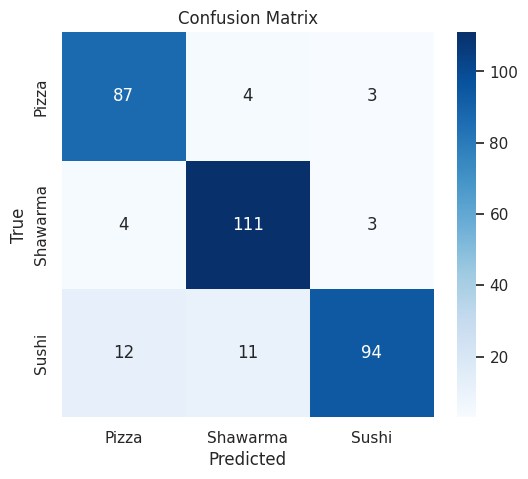

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=clf.classes_, yticklabels=clf.classes_,
            cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

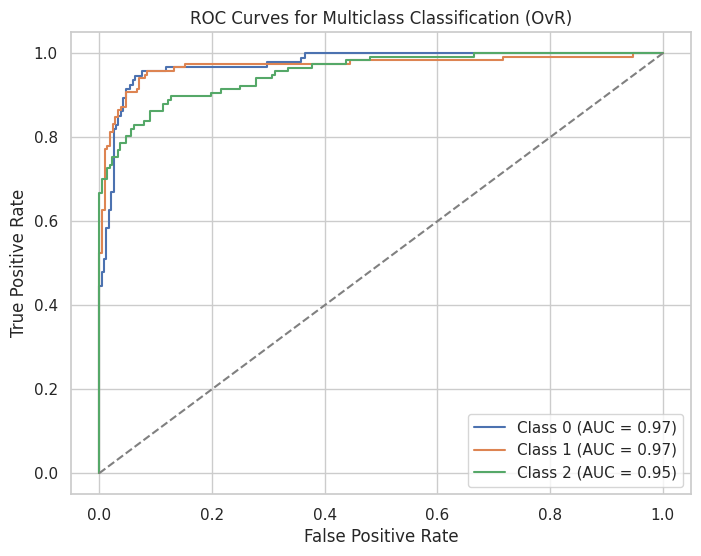

In [ ]:
from sklearn.metrics import roc_curve, auc

# Convert labels to one-hot encoding if not already
from sklearn.preprocessing import label_binarize

n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # One-hot encoding
y_scores = clf.decision_function(X_test)  # Use decision function instead of predict_proba

# Plot ROC for each class
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multiclass Classification (OvR)")
plt.legend()
plt.show()


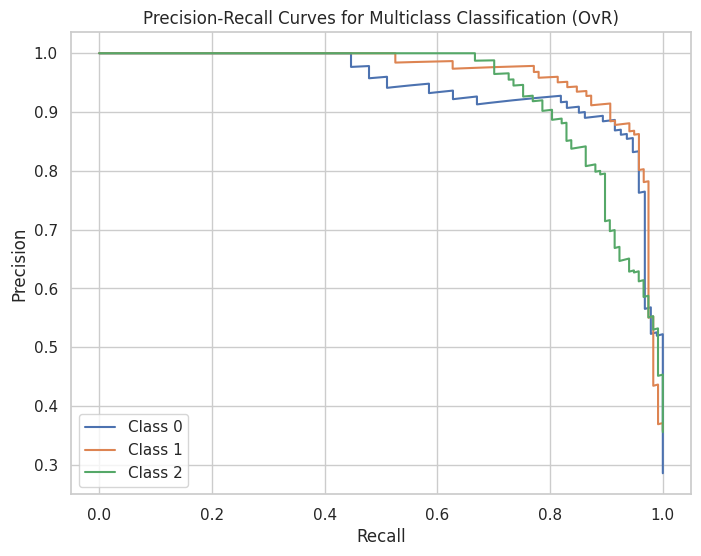

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8,6))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(recall, precision, label=f"Class {i}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for Multiclass Classification (OvR)")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20241 (\N{CJK UNIFIED IDEOGRAPH-4F11}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


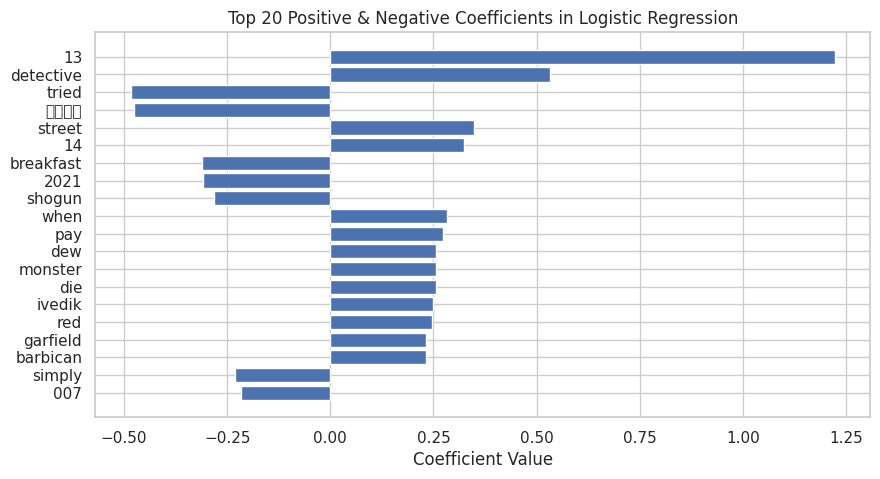

In [ ]:
# Get feature names
feature_names = vectorizer_text.get_feature_names_out()

# Get coefficients and sort by magnitude
coefs = clf.coef_[0]  # First class coefficients
sorted_indices = np.argsort(np.abs(coefs))[-20:]  # Top 20 absolute values

# Plot only the top 20 influential features
plt.figure(figsize=(10,5))
plt.barh(np.array(feature_names)[sorted_indices], coefs[sorted_indices])
plt.xlabel("Coefficient Value")
plt.title("Top 20 Positive & Negative Coefficients in Logistic Regression")
plt.show()


#ANALYSIS CONTINUED


##Q

Dimension of our feature space (D): 1303
Dimension of our feature space (D): 1303

Training model with learning rate (alpha) = 0.0001
Iteration 0: Train Loss = 1.1204, Valid Loss = 1.1214, Valid Acc = 0.1597
Iteration 100: Train Loss = 1.1094, Valid Loss = 1.1136, Valid Acc = 0.2814
Iteration 200: Train Loss = 1.1031, Valid Loss = 1.1100, Valid Acc = 0.3004
Iteration 300: Train Loss = 1.0984, Valid Loss = 1.1071, Valid Acc = 0.3118
Iteration 400: Train Loss = 1.0941, Valid Loss = 1.1040, Valid Acc = 0.3156
Iteration 500: Train Loss = 1.0901, Valid Loss = 1.1008, Valid Acc = 0.3156
Iteration 600: Train Loss = 1.0862, Valid Loss = 1.0975, Valid Acc = 0.3194
Iteration 700: Train Loss = 1.0824, Valid Loss = 1.0941, Valid Acc = 0.3194
Iteration 800: Train Loss = 1.0787, Valid Loss = 1.0908, Valid Acc = 0.3194
Iteration 900: Train Loss = 1.0750, Valid Loss = 1.0875, Valid Acc = 0.3118

Training model with learning rate (alpha) = 0.001
Iteration 0: Train Loss = 1.1069, Valid Loss = 1.0998, Va

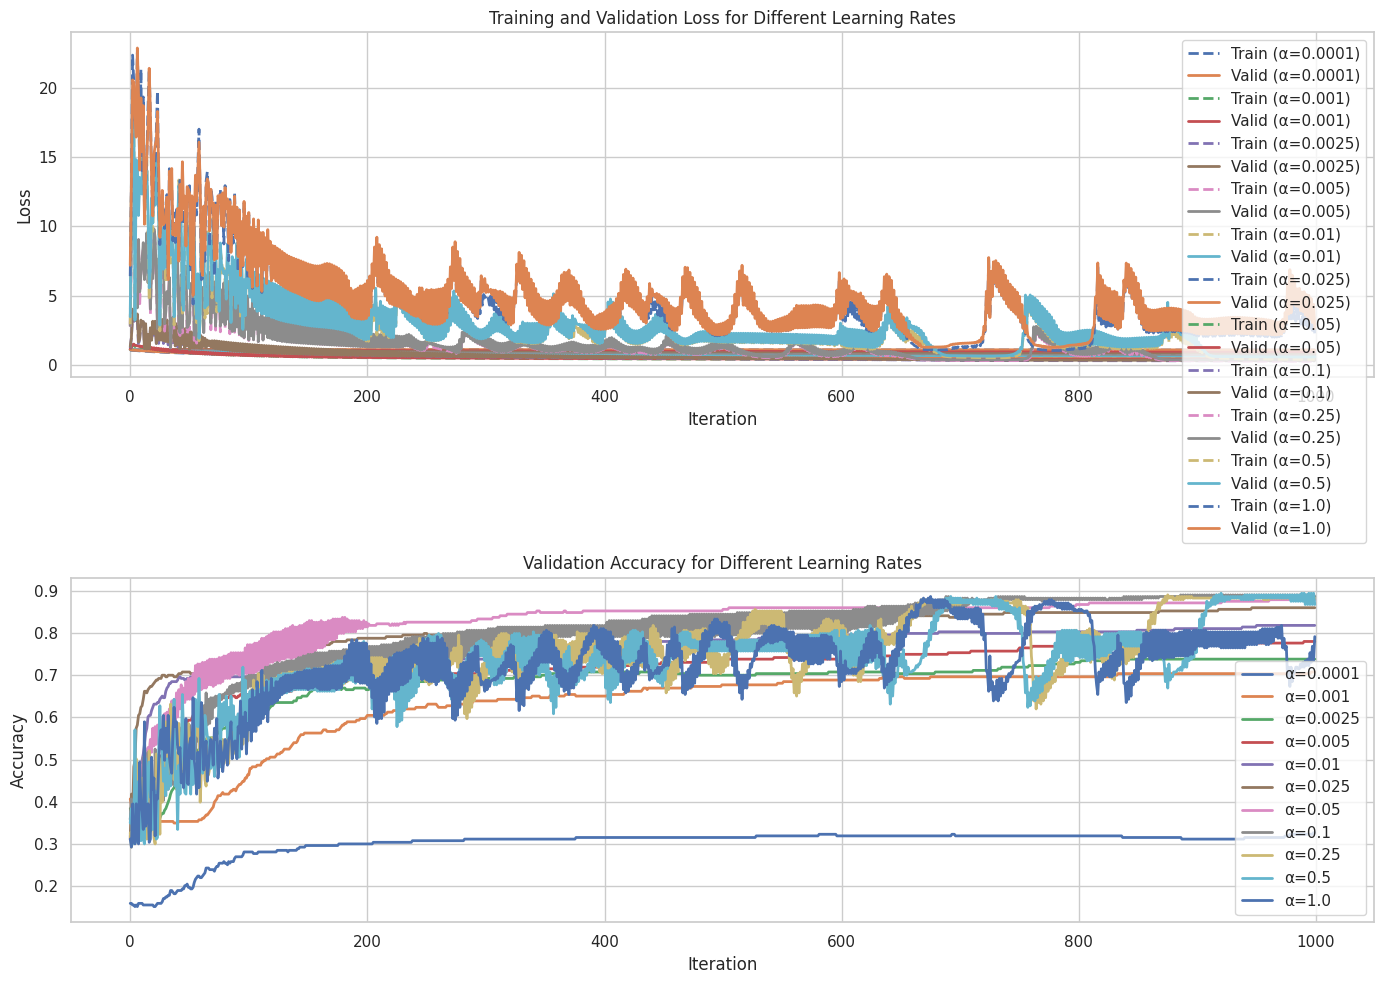


Alpha Evaluation Summary:
Alpha      Final Val Accuracy
0.0001     0.3270         
0.0010     0.7072         
0.0025     0.7376         
0.0050     0.7795         
0.0100     0.8175         
0.0250     0.8593         
0.0500     0.8783         
0.1000     0.8859         
0.2500     0.8821         
0.5000     0.8669         
1.0000     0.7909         

Best alpha: 0.1 with validation accuracy: 0.8859

Classification Report (Test Set):
              precision    recall  f1-score   support

       Pizza       0.87      0.94      0.90        94
    Shawarma       0.90      0.94      0.92       118
       Sushi       0.93      0.83      0.88       117

    accuracy                           0.90       329
   macro avg       0.90      0.90      0.90       329
weighted avg       0.90      0.90      0.90       329


Test Accuracy: 0.8997 (89.97%)


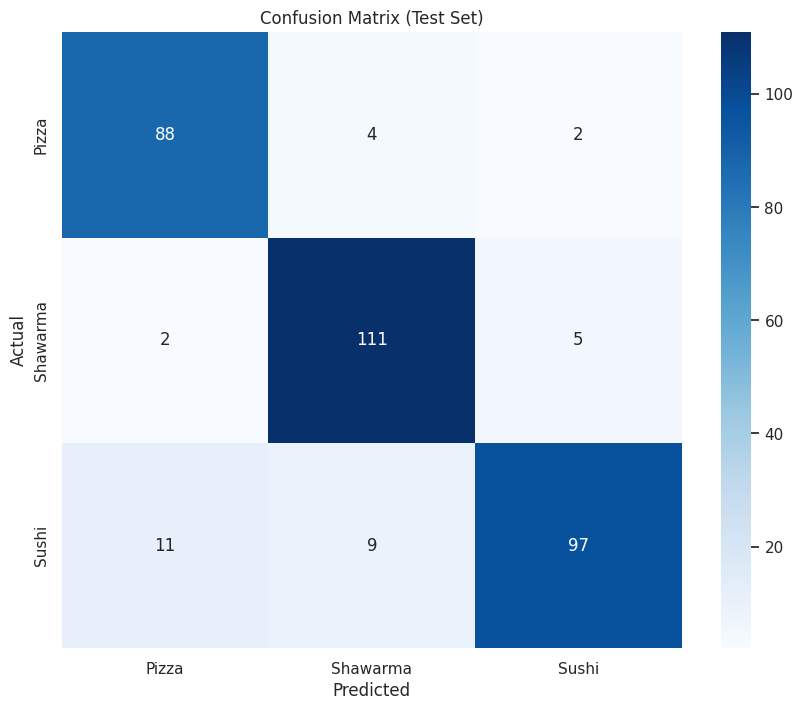

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

print("Dimension of our feature space (D):", X_combined.shape[1])

X_tv, X_test, t_tv, t_test = train_test_split(X_combined, np.array(df_food["Label"]), test_size=0.2, random_state=1)
X_train, X_valid, t_train, t_valid = train_test_split(X_tv, t_tv, test_size=0.2, random_state=1)

def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # for numerical stability
    return e_z / np.sum(e_z, axis=1, keepdims=True)

def loss_softmax(W, X, t_onehot):
    m = X.shape[0]
    scores = X @ W
    probs = softmax(scores)
    return -np.sum(t_onehot * np.log(probs + 1e-15)) / m

def grad_softmax(W, X, t_onehot):
    m = X.shape[0]
    scores = X @ W
    probs = softmax(scores)
    return X.T @ (probs - t_onehot) / m

def train_softmax(X_train, t_train_str, X_valid, t_valid_str, alpha=0.1, niter=1000):
    """Train softmax regression with visualization capability"""
    # Convert labels to indices
    unique_labels = np.unique(t_train_str)
    label_to_idx = {label: i for i, label in enumerate(unique_labels)}
    idx_to_label = {i: label for i, label in enumerate(unique_labels)}
    t_train = np.array([label_to_idx[label] for label in t_train_str])
    t_valid = np.array([label_to_idx[label] for label in t_valid_str])

    n_classes = len(unique_labels)
    t_train_onehot = np.eye(n_classes)[t_train]
    t_valid_onehot = np.eye(n_classes)[t_valid]

    # Add bias term
    bias_train = csr_matrix(np.ones((X_train.shape[0], 1)))
    bias_valid = csr_matrix(np.ones((X_valid.shape[0], 1)))
    X_train_bias = hstack([bias_train, X_train])
    X_valid_bias = hstack([bias_valid, X_valid])

    # Initialize weights
    W = np.random.randn(X_train_bias.shape[1], n_classes) * 0.01

    train_loss_history = []
    valid_loss_history = []
    valid_accuracy_history = []

    for it in range(niter):
        dW = grad_softmax(W, X_train_bias, t_train_onehot)
        W = W - alpha * dW

        # Track losses
        train_loss = loss_softmax(W, X_train_bias, t_train_onehot)
        valid_loss = loss_softmax(W, X_valid_bias, t_valid_onehot)
        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

        # Track validation accuracy
        scores = X_valid_bias @ W
        y_pred = np.argmax(softmax(scores), axis=1)
        valid_acc = np.mean(y_pred == t_valid)
        valid_accuracy_history.append(valid_acc)

        if it % 100 == 0:
            print(f"Iteration {it}: Train Loss = {train_loss:.4f}, Valid Loss = {valid_loss:.4f}, Valid Acc = {valid_acc:.4f}")

    return W, label_to_idx, idx_to_label, train_loss_history, valid_loss_history, valid_accuracy_history


def evaluate_softmax_with_plots(X_train, t_train, X_valid, t_valid, alphas=[0.0001, 0.001, 0.01, 0.1, 0.5], niter=1000):
    """Evaluate different learning rates with visualization"""
    results = {}
    best_acc = 0
    best_alpha = None
    best_model = None

    plt.figure(figsize=(14, 10))

    # Plot training curves
    plt.subplot(2, 1, 1)
    for alpha in alphas:
        print(f"\nTraining model with learning rate (alpha) = {alpha}")
        W, label_to_idx, idx_to_label, train_loss, valid_loss, valid_acc = train_softmax(
            X_train, t_train, X_valid, t_valid, alpha=alpha, niter=niter
        )

        # Store results
        final_acc = valid_acc[-1]
        results[alpha] = {
            'model': W,
            'label_mappings': (label_to_idx, idx_to_label),
            'train_loss': train_loss,
            'valid_loss': valid_loss,
            'valid_accuracy': valid_acc,
            'final_accuracy': final_acc
        }

        # Update best model
        if final_acc > best_acc:
            best_acc = final_acc
            best_alpha = alpha
            best_model = (W, label_to_idx, idx_to_label)

        # Plot training and validation loss
        plt.plot(train_loss, '--', label=f'Train (α={alpha})', linewidth=2)
        plt.plot(valid_loss, '-', label=f'Valid (α={alpha})', linewidth=2)

    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss for Different Learning Rates')
    plt.legend()
    plt.grid(True)

    # Plot
    plt.subplot(2, 1, 2)
    for alpha in alphas:
        plt.plot(results[alpha]['valid_accuracy'], label=f'α={alpha}', linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy for Different Learning Rates')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Print
    print("\nAlpha Evaluation Summary:")
    print("{:<10} {:<15}".format('Alpha', 'Final Val Accuracy'))
    for alpha in sorted(results.keys()):
        print("{:<10.4f} {:<15.4f}".format(alpha, results[alpha]['final_accuracy']))

    print(f"\nBest alpha: {best_alpha} with validation accuracy: {best_acc:.4f}")

    return best_alpha, best_model, results

# use data splitting
print("Dimension of our feature space (D):", X_combined.shape[1])

# Split the data
X_tv, X_test, t_tv, t_test = train_test_split(X_combined, np.array(df_food["Label"]), test_size=0.2, random_state=1)
X_train, X_valid, t_train, t_valid = train_test_split(X_tv, t_tv, test_size=0.2, random_state=1)

# Evaluate with visualization
best_alpha, best_model, all_results = evaluate_softmax_with_plots(
    X_train, t_train, X_valid, t_valid,
    alphas=[0.0001, 0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1.0],
    niter=1000
)

# Evaluate on test set
W_best, label_to_idx, idx_to_label = best_model
bias_test = csr_matrix(np.ones((X_test.shape[0], 1)))
X_test_bias = hstack([bias_test, X_test])
test_scores = X_test_bias @ W_best
y_test_pred = np.argmax(softmax(test_scores), axis=1)
t_test_indices = np.array([label_to_idx[label] for label in t_test])
test_acc = np.mean(y_test_pred == t_test_indices)

# Generate classification report and confusion matrix
print("\nClassification Report (Test Set):")
print(classification_report(t_test, [idx_to_label[idx] for idx in y_test_pred]))

print(f"\nTest Accuracy: {test_acc:.4f} ({(test_acc*100):.2f}%)")

# Confusion Matrix
cm = confusion_matrix(t_test, [idx_to_label[idx] for idx in y_test_pred], labels=list(label_to_idx.keys()))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_to_idx.keys(),
            yticklabels=label_to_idx.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()


In [2]:


# FINAL SCRIPT TO GENERATE MODEL
import re
import time
import numpy as np
import pandas as pd
import random
import csv

STOPWORDS = {
    "and", "or", "the", "of", "a", "an", "in", "to", "for", "on", "with", "at",
    "by", "from", "up", "about", "as", "into", "like", "through", "after", "over", "between",
    "out", "against", "during", "without", "before", "under", "around", "among", "water"
}

meal_settings = ['Week day lunch', 'Week day dinner', 'Weekend lunch', 'Weekend dinner', 'At a party', 'Late night snack']
relationships = ['Parents', 'Siblings', 'Friends', 'Strangers', 'Teachers']
spice_map = {
    'None': 0,
    'A little (mild)': 1,
    'A moderate amount (medium)': 2,
    'A lot (hot)': 3,
    'I will have some of this food item with my hot sauce': 4
}

def clean_text(text):
    t = str(text).lower()
    t = re.sub(r'[^\w\s]', '', t)
    return " ".join([w for w in t.split() if not w.isdigit() and w not in STOPWORDS])

def count_ingredients(text):
    nums = [int(x) for x in re.findall(r'\d+', str(text))]
    return max(nums) if nums else str(text).count(",") + 1

def extract_price(text):
    nums = [float(x) for x in re.findall(r'\d*\.?\d+', str(text)) if x]
    return float(min(nums, key=float)) if nums else 3.0

df = pd.read_csv("https://github.com/T3CHW1ZRD/ML_PROJECT_PREDICT_FOOD/raw/refs/heads/main/cleaned_data_combined.csv")

df["ingredient_count"] = df["Q2: How many ingredients would you expect this food item to contain?"].apply(count_ingredients)
for s in meal_settings:
    df[s] = df["Q3: In what setting would you expect this food to be served? Please check all that apply"].str.contains(s, case=False, na=False).astype(int)
for r in relationships:
    df[r] = df["Q7: When you think about this food item, who does it remind you of?"].str.contains(r, case=False, na=False).astype(int)

df["food_price"] = df["Q4: How much would you expect to pay for one serving of this food item?"].apply(extract_price)
df["spiciness"] = df["Q8: How much hot sauce would you add to this food item?"].map(spice_map).fillna(0).astype(int)

numeric_features = [
    "Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",
    "ingredient_count"
] + meal_settings + ["food_price"] + relationships + ["spiciness"]

X_num = df[numeric_features].fillna(0).astype(float).to_numpy()

# text = ingredient words + movie title + drink
text_ingr = df["Q2: How many ingredients would you expect this food item to contain?"].astype(str).apply(clean_text)
text_movie = df["Q5: What movie do you think of when thinking of this food item?"].astype(str).apply(clean_text)
text_drink = df["Q6: What drink would you pair with this food item?"].astype(str).apply(clean_text)
text = text_ingr + " " + text_movie + " " + text_drink

vocab = {}
for line in text:
    for word in line.split():
        if word not in vocab:
            vocab[word] = len(vocab)

X_text = np.zeros((len(df), len(vocab)))
for i, line in enumerate(text):
    for word in line.split():
        if word in vocab:
            X_text[i, vocab[word]] += 1

X = np.hstack([X_num, X_text])
y = df["Label"].astype(str).to_numpy()

# Split
indices = list(range(len(X)))
random.shuffle(indices)
X = X[indices]
y = y[indices]

n = len(X)
n_train = int(0.64 * n)
n_val = int(0.16 * n)
X_train, X_val, X_test = X[:n_train], X[n_train:n_train+n_val], X[n_train+n_val:]
y_train, y_val, y_test = y[:n_train], y[n_train:n_train+n_val], y[n_train+n_val:]

classes = sorted(list(set(y)))
label_to_idx = {c: i for i, c in enumerate(classes)}
idx_to_label = {i: c for i, c in enumerate(classes)}

def onehot(y):
    arr = np.zeros((len(y), len(classes)))
    for i, val in enumerate(y):
        arr[i][label_to_idx[val]] = 1
    return arr

Y_train, Y_val, Y_test = onehot(y_train), onehot(y_val), onehot(y_test)

def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)
    e = np.exp(z)
    return e / np.sum(e, axis=1, keepdims=True)

def cross_entropy(W, X, Y):
    probs = softmax(X @ W)
    return -np.sum(Y * np.log(probs + 1e-15)) / len(X)

def gradient(W, X, Y):
    return X.T @ (softmax(X @ W) - Y) / len(X)

def add_bias(X): return np.hstack([np.ones((X.shape[0], 1)), X])

X_train_b, X_val_b, X_test_b = add_bias(X_train), add_bias(X_val), add_bias(X_test)
W = np.random.randn(X_train_b.shape[1], len(classes)) * 0.01

for i in range(1000):
    W -= 0.1 * gradient(W, X_train_b, Y_train)
    if i % 100 == 0:
        val_acc = np.mean(np.argmax(softmax(X_val_b @ W), axis=1) == np.argmax(Y_val, axis=1))
        print(f"Iter {i}: Val Acc = {val_acc:.4f}")

test_preds = np.argmax(softmax(X_test_b @ W), axis=1)
test_true = np.argmax(Y_test, axis=1)
test_acc = np.mean(test_preds == test_true)
print(f"\nTest Accuracy: {test_acc:.4f}")

np.save("weights.npy", W)

with open("vocab.csv", "w", encoding="utf-8") as f:
    writer = csv.writer(f)
    for word, idx in vocab.items():
        writer.writerow([word, idx])


HTTPError: HTTP Error 504: Gateway Timeout

In [ ]:
#!/usr/bin/env python3
import re
import time
import numpy as np
import pandas as pd
import random
import csv


STOPWORDS = {
    "all", "also", "any", "anything", "anywhere", "are", "back",
    "be", "because", "being", "but", "can", "cant", "could", "down", "drink",
    "eg", "etc", "expect", "first", "five", "food", "four", "get", "go", "had",
    "has", "have", "her", "here", "him", "his", "how", "however", "ie",
    "if", "into", "its", "just", "least", "made",
    "many", "maybe", "me", "might", "most", "mostly", "must",
    "my", "namely", "need", "no", "none", "off", "often", "on", "once", "or", "other", "others",
    "our", "out", "over", "own", "pair", "part", "people", "perhaps", "probably",
    "quite", "rather", "really", "said", "same", "say", "see", "seem", "seemed",
    "seeming", "seems", "several", "she", "should", "some", "something", "still",
    "such", "take", "than", "their", "them", "then", "there", "therefore", "these",
    "they", "through", "too", "under", "up", "very", "was", "water", "way",
    "we", "well", "were", "which", "while", "whom", "whose", "why",
    "will", "with", "without", "would", "you"
}

meal_settings = ['Week day lunch', 'Week day dinner', 'Weekend lunch', 'Weekend dinner', 'At a party', 'Late night snack']
relationships = ['Parents', 'Siblings', 'Friends', 'Strangers', 'Teachers']
spice_map = {
    'None': 0,
    'A little (mild)': 1,
    'A moderate amount (medium)': 2,
    'A lot (hot)': 3,
    'I will have some of this food item with my hot sauce': 4
}

def clean_text(text):
    t = str(text).lower()
    t = re.sub(r'[^\w\s]', '', t)
    return " ".join([w for w in t.split() if not w.isdigit() and w not in STOPWORDS])

def count_ingredients(text):
    nums = [int(x) for x in re.findall(r'\d+', str(text))]
    return max(nums) if nums else str(text).count(",") + 1

def extract_price(text):
    nums = [float(x) for x in re.findall(r'\d*\.?\d+', str(text)) if x]
    return float(min(nums, key=float)) if nums else 3.0

df = pd.read_csv("https://github.com/T3CHW1ZRD/ML_PROJECT_PREDICT_FOOD/raw/refs/heads/main/cleaned_data_combined.csv")

df["ingredient_count"] = df["Q2: How many ingredients would you expect this food item to contain?"].apply(count_ingredients)
for s in meal_settings:
    df[s] = df["Q3: In what setting would you expect this food to be served? Please check all that apply"].str.contains(s, case=False, na=False).astype(int)
for r in relationships:
    df[r] = df["Q7: When you think about this food item, who does it remind you of?"].str.contains(r, case=False, na=False).astype(int)

df["food_price"] = df["Q4: How much would you expect to pay for one serving of this food item?"].apply(extract_price)
df["spiciness"] = df["Q8: How much hot sauce would you add to this food item?"].map(spice_map).fillna(0).astype(int)

numeric_features = [
    "Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)",
    "ingredient_count"
] + meal_settings + ["food_price"] + relationships + ["spiciness"]

X_num = df[numeric_features].fillna(0).astype(float).to_numpy()

# text = ingredient words + movie title + drink
text_ingr = df["Q2: How many ingredients would you expect this food item to contain?"].astype(str).apply(clean_text)
text_movie = df["Q5: What movie do you think of when thinking of this food item?"].astype(str).apply(clean_text)
text_drink = df["Q6: What drink would you pair with this food item?"].astype(str).apply(clean_text)
text = text_ingr + " " + text_movie + " " + text_drink

word_counts = {}
for line in text:
    for word in line.split():
        word_counts[word] = word_counts.get(word, 0) + 1

# Only add words that appear more than 3 times to vocab. 3 Was chosen since one respondent filled out the survey for 3 categories
filtered_words = [word for word, count in word_counts.items() if count > 3]
vocab = {word: idx for idx, word in enumerate(filtered_words)}



X_text = np.zeros((len(df), len(vocab)))
for i, line in enumerate(text):
    for word in line.split():
        if word in vocab:
            X_text[i, vocab[word]] += 1

X = np.hstack([X_num, X_text])
y = df["Label"].astype(str).to_numpy()

# Split
indices = list(range(len(X)))
random.shuffle(indices)
X = X[indices]
y = y[indices]

n = len(X)
n_train = int(0.64 * n)
n_val = int(0.16 * n)
X_train, X_val, X_test = X[:n_train], X[n_train:n_train+n_val], X[n_train+n_val:]
y_train, y_val, y_test = y[:n_train], y[n_train:n_train+n_val], y[n_train+n_val:]

classes = sorted(list(set(y)))
label_to_idx = {c: i for i, c in enumerate(classes)}
idx_to_label = {i: c for i, c in enumerate(classes)}

def onehot(y):
    arr = np.zeros((len(y), len(classes)))
    for i, val in enumerate(y):
        arr[i][label_to_idx[val]] = 1
    return arr

Y_train, Y_val, Y_test = onehot(y_train), onehot(y_val), onehot(y_test)

def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True)
    e = np.exp(z)
    return e / np.sum(e, axis=1, keepdims=True)

def cross_entropy(W, X, Y):
    probs = softmax(X @ W)
    return -np.sum(Y * np.log(probs + 1e-15)) / len(X)

def gradient(W, X, Y):
    return X.T @ (softmax(X @ W) - Y) / len(X)

def add_bias(X): return np.hstack([np.ones((X.shape[0], 1)), X])

def cross_entropy_reg(W, X, Y, reg_strength):
    probs = softmax(X @ W)
    data_loss = -np.sum(Y * np.log(probs + 1e-15)) / len(X)
    reg_loss = reg_strength * np.sum(W[1:,:]**2)  # Exclude bias
    return data_loss + reg_loss

def gradient_reg(W, X, Y, reg_strength):
    grad = X.T @ (softmax(X @ W) - Y) / len(X)
    grad[1:,:] += 2 * reg_strength * W[1:,:]  # Regularize everything except bias
    return grad

X_train_b, X_val_b, X_test_b = add_bias(X_train), add_bias(X_val), add_bias(X_test)

lambdas = [0, 0.00001, 0.00005, 0.0001, 0.00025, 0.0005, 0.00075, 0.001, 0.005, 0.01]
best_lambda = None
best_val_acc = 0
best_W = None

for lam in lambdas:
    trial_accuracies = []
    test_accuracies = []
    train_accuracies = []

    for trial in range(5):  # run 5 trials
        W = np.random.randn(X_train_b.shape[1], len(classes)) * 0.01
        # Training loop
        for i in range(1000):
            W -= 0.1 * gradient_reg(W, X_train_b, Y_train, lam)

        val_preds = np.argmax(softmax(X_val_b @ W), axis=1)
        val_acc = np.mean(val_preds == np.argmax(Y_val, axis=1))
        trial_accuracies.append(val_acc)

        test_preds = np.argmax(softmax(X_test_b @ W), axis=1)
        test_acc = np.mean(test_preds == np.argmax(Y_test, axis=1))
        test_accuracies.append(test_acc)
        train_acc = np.mean(np.argmax(softmax(X_train_b @ W), axis=1) == np.argmax(Y_train, axis=1))
        train_accuracies.append(train_acc)


    avg_val_acc = np.mean(trial_accuracies)
    print(f"λ = {lam}: Avg Val Accuracy over 5 trials -> {avg_val_acc:.4f}")
    print(f"Avg Train Accuracy: {np.mean(train_accuracies):.4f}")
    print(f"Avg Test Accuracy: {np.mean(test_accuracies):.4f}")
    print(f"Std Dev (Val): {np.std(trial_accuracies):.4f}")
    print(f"Std Dev (Train): {np.std(train_accuracies):.4f}")
    print(f"Std Dev (Test): {np.std(test_accuracies):.4f}")

    if avg_val_acc > best_val_acc:
        best_val_acc = avg_val_acc
        best_lambda = lam
        best_W = W.copy()

print(f"\nBest λ: {best_lambda} ->  Val Acc = {best_val_acc:.4f}")

test_preds = np.argmax(softmax(X_test_b @ best_W), axis=1)

test_true = np.argmax(Y_test, axis=1)
test_acc = np.mean(test_preds == test_true)
print(f"\nTest Accuracy: {test_acc:.4f}")

np.save("weights.npy", best_W)


with open("vocab.csv", "w", encoding="utf-8") as f:
    writer = csv.writer(f)
    for word, idx in vocab.items():
        writer.writerow([word, idx])
